# This notebook is to combine the properties and features and SARIMAX

In [80]:
import pandas as pd
properties_df = pd.read_csv('../datasets/all_properties_tidy_enriched.csv')

/tmp/ipykernel_16577/1811025953.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_df = pd.read_csv('../datasets/all_properties_tidy_enriched.csv')


In [81]:
properties_df.head(3)

Suburb       date  bedrooms property_type  \
0  Albert Park-Middle Park-West St Kilda  1/03/2000       1.0          flat   
1  Albert Park-Middle Park-West St Kilda  1/03/2000       2.0          flat   
2  Albert Park-Middle Park-West St Kilda  1/03/2000       2.0         house   

   Count  Median        Lat          Lng   SA2_CODE21   SA2_NAME21  \
0    352     165 -37.853484  144.9701609  206051128.0  Albert Park   
1    292     250 -37.853484  144.9701609  206051128.0  Albert Park   
2    172     300 -37.853484  144.9701609  206051128.0  Albert Park   

   LGA_CODE21    LGA_NAME21  
0     25900.0  Port Phillip  
1     25900.0  Port Phillip  
2     25900.0  Port Phillip

# Cleaning property data

In [82]:
missing_both = properties_df[properties_df["SA2_CODE21"].isna() | properties_df["LGA_CODE21"].isna()]
missing_both

Suburb       date  bedrooms property_type  Count  Median  Lat  \
45120  Group Total  1/03/2000       1.0          flat   7746     160  NaN   
45121  Group Total  1/03/2000       2.0          flat   9079     245  NaN   
45122  Group Total  1/03/2000       2.0         house   2677     260  NaN   
45123  Group Total  1/03/2000       3.0          flat   1448     370  NaN   
45124  Group Total  1/03/2000       3.0         house   1816     320  NaN   
...            ...        ...       ...           ...    ...     ...  ...   
91990  Wanagaratta  1/03/2025       2.0         house     23     390  NaN   
91991  Wanagaratta  1/03/2025       3.0          flat     22     450  NaN   
91992  Wanagaratta  1/03/2025       3.0         house    234     450  NaN   
91993  Wanagaratta  1/03/2025       4.0         house     70     580  NaN   
91994  Wanagaratta  1/03/2025       NaN           NaN    537     411  NaN   

       Lng  SA2_CODE21 SA2_NAME21  LGA_CODE21 LGA_NAME21  
45120  NaN         NaN        NaN         NaN        NaN  
45121  NaN         NaN        NaN         NaN        NaN  
45122  NaN         NaN        NaN         NaN        NaN  
45123  NaN         NaN        NaN         NaN        NaN  
45124  NaN         NaN        NaN         NaN        NaN  
...    ...         ...        ...         ...        ...  
91990  NaN         NaN        NaN         NaN        NaN  
91991  NaN         NaN        NaN         NaN        NaN  
91992  NaN         NaN        NaN         NaN        NaN  
91993  NaN         NaN        NaN         NaN        NaN  
91994  NaN         NaN        NaN         NaN        NaN  

[1401 rows x 12 columns]

In [83]:
#Convert to integers
properties_df["SA2_CODE21"] = properties_df["SA2_CODE21"].astype("Int64")
properties_df["LGA_CODE21"] = properties_df["LGA_CODE21"].astype("Int64")

In [84]:
#Delete all "group total" rows, clean Wanagaratta SA2 code

# 1. Drop rows where Suburb == "Group Total"
properties_df = properties_df[properties_df["Suburb"] != "Group Total"].copy()

# 2. Update the Wanagaratta row
mask = properties_df["Suburb"] == "Wanagaratta"
properties_df.loc[mask, "SA2_CODE21"] = 204021066
properties_df.loc[mask, "SA2_NAME21"] = "Wangaratta"
properties_df.loc[mask, "Lat"] = -36.3588908
properties_df.loc[mask, "Lng"] = 146.3096576

In [85]:
#Delete all LGA related
properties_df = properties_df.drop(columns=["LGA_CODE21", "LGA_NAME21"])

Taking only the total of the properties, nan bedrooms and property type

In [86]:
properties_df = properties_df[
    properties_df["bedrooms"].isna() & properties_df["property_type"].isna()
]
properties_df = properties_df.drop(columns=["bedrooms", "property_type","Count"])

In [87]:
#Change to date format
properties_df["date"] = pd.to_datetime(
    properties_df["date"],
    format="%d/%m/%Y"   # day/month/year
)

In [88]:
# Filter only properties within 2017–2025
start_date = pd.Timestamp("2017-01-01")
end_date   = pd.Timestamp("2025-12-31")

properties_df = properties_df[(properties_df["date"] >= start_date) & (properties_df["date"] <= end_date)]
properties_df

Suburb       date  Median        Lat  \
482     Albert Park-Middle Park-West St Kilda 2017-03-01     520 -37.853484   
489     Albert Park-Middle Park-West St Kilda 2017-06-01     532 -37.853484   
496     Albert Park-Middle Park-West St Kilda 2017-09-01     530 -37.853484   
503     Albert Park-Middle Park-West St Kilda 2017-12-01     530 -37.853484   
510     Albert Park-Middle Park-West St Kilda 2018-03-01     550 -37.853484   
...                                       ...        ...     ...        ...   
100146                      Yarraville-Seddon 2024-03-01     570 -37.812809   
100153                      Yarraville-Seddon 2024-06-01     590 -37.812809   
100160                      Yarraville-Seddon 2024-09-01     595 -37.812809   
100167                      Yarraville-Seddon 2024-12-01     600 -37.812809   
100174                      Yarraville-Seddon 2025-03-01     600 -37.812809   

                Lng  SA2_CODE21   SA2_NAME21  
482     144.9701609   206051128  Albert Park  
489     144.9701609   206051128  Albert Park  
496     144.9701609   206051128  Albert Park  
503     144.9701609   206051128  Albert Park  
510     144.9701609   206051128  Albert Park  
...             ...         ...          ...  
100146   144.884163   213031352   Yarraville  
100153   144.884163   213031352   Yarraville  
100160   144.884163   213031352   Yarraville  
100167   144.884163   213031352   Yarraville  
100174   144.884163   213031352   Yarraville  

[4818 rows x 7 columns]

In [89]:
#Use this to save to csv
properties_df.to_csv("properties_df.csv", index=False)

# Combining with external features

Start with population

In [90]:
#Import population
population_df = pd.read_csv('../Amanda-workspace/full_erp_only_population_data.csv')
population_df.head(3)

sa2_code  erp_2015  erp_2016  erp_2017  erp_2018  erp_2019  erp_2020  \
0  201011001   11039.0   11852.0   12649.0   13537.0   14434.0   15507.0   
1  201011002   12300.0   12301.0   12266.0   12244.0   12320.0   12196.0   
2  201011005    7191.0    7311.0    7409.0    7418.0    7458.0    7377.0   

   erp_2021  erp_2022  erp_2023  ...      erp_2027      erp_2028  \
0   16841.0   18002.0   18995.0  ...  21325.893697  21895.531232   
1   12071.0   11938.0   11811.0  ...  11719.320995  11740.348397   
2    7229.0    7247.0    7323.0  ...   7434.686493   7497.293213   

       erp_2029      erp_2030      erp_2031      erp_2032      erp_2033  \
0  22465.168766  23034.806301  23604.443836  24095.619230  24586.794624   
1  11761.375799  11782.403201  11803.430603  11839.942960  11876.455316   
2   7559.899932   7622.506652   7685.113372   7753.868146   7822.622920   

       erp_2034      erp_2035      erp_2036  
0  25077.970018  25569.145413  26060.320807  
1  11912.967673  11949.480030  11985.992387  
2   7891.377695   7960.132469   8028.887243  

[3 rows x 23 columns]

In [ ]:
import pandas as pd
import re

# Keeping only data from 2017 to 2025
years = range(2017, 2026)
keep_cols = ["sa2_code"] + [f"erp_{y}" for y in years if f"erp_{y}" in population_df.columns]
pop_wide = population_df[keep_cols].copy()

# one row per SA2
if pop_wide.duplicated("sa2_code").any():
    pop_wide = (pop_wide.groupby("sa2_code", as_index=False)
                .agg({c: "mean" for c in pop_wide.columns if c != "sa2_code"}))

# Making it to wide format
pop_long = pop_wide.melt(id_vars="sa2_code", var_name="year_lbl", value_name="ERP")
pop_long["year"] = pop_long["year_lbl"].str[-4:].astype(int)
pop_long = (pop_long.groupby(["sa2_code","year"], as_index=False)
                    .agg(ERP=("ERP","mean")))
pop_long["date"] = pd.to_datetime(pop_long["year"].astype(str) + "-01-01")

# Build ERP quarterly for 2015–2025
q_start = pd.Timestamp("2017-03-01")
q_end   = pd.Timestamp("2025-03-01")
quarterly_index = pd.date_range(start=q_start, end=q_end, freq="QS-MAR")

#Interpolate to quarterly
out = []
for code, g in pop_long.groupby("sa2_code"):
    g = (g[["date", "ERP"]]
         .sort_values("date")
         .set_index("date"))
    g = g[~g.index.duplicated(keep="last")]

    # Interpolate on union
    union_idx = g.index.union(quarterly_index)
    g_u = g.reindex(union_idx)
    g_u["ERP"] = g_u["ERP"].interpolate(method="time") #method="time" because it is linear with time - good for population

    # Keep quarterly rows and make columns tidy
    g_q = (g_u.reindex(quarterly_index)
               .rename(columns={"ERP": "ERP_quarterly"})
               .reset_index()                   
               .rename(columns={"index": "date"}))

    # Assign SA2 after reset_index so it doesn’t align by the old DateTimeIndex
    g_q["SA2_CODE21"] = code
    g_q["SA2_CODE21"] = g_q["SA2_CODE21"].astype("Int64")

    out.append(g_q)

pop_quarterly = pd.concat(out, ignore_index=True)
merged_df = properties_df.merge(pop_quarterly, how="left", on=["SA2_CODE21","date"])

In [92]:
merged_df

Suburb       date  Median        Lat  \
0     Albert Park-Middle Park-West St Kilda 2017-03-01     520 -37.853484   
1     Albert Park-Middle Park-West St Kilda 2017-06-01     532 -37.853484   
2     Albert Park-Middle Park-West St Kilda 2017-09-01     530 -37.853484   
3     Albert Park-Middle Park-West St Kilda 2017-12-01     530 -37.853484   
4     Albert Park-Middle Park-West St Kilda 2018-03-01     550 -37.853484   
...                                     ...        ...     ...        ...   
4813                      Yarraville-Seddon 2024-03-01     570 -37.812809   
4814                      Yarraville-Seddon 2024-06-01     590 -37.812809   
4815                      Yarraville-Seddon 2024-09-01     595 -37.812809   
4816                      Yarraville-Seddon 2024-12-01     600 -37.812809   
4817                      Yarraville-Seddon 2025-03-01     600 -37.812809   

              Lng  SA2_CODE21   SA2_NAME21  ERP_quarterly  
0     144.9701609   206051128  Albert Park   16536.854795  
1     144.9701609   206051128  Albert Park   16594.323288  
2     144.9701609   206051128  Albert Park   16651.791781  
3     144.9701609   206051128  Albert Park   16708.635616  
4     144.9701609   206051128  Albert Park   16785.060274  
...           ...         ...          ...            ...  
4813   144.884163   213031352   Yarraville   16280.121038  
4814   144.884163   213031352   Yarraville   16337.039963  
4815   144.884163   213031352   Yarraville   16393.958888  
4816   144.884163   213031352   Yarraville   16450.259129  
4817   144.884163   213031352   Yarraville   16469.438332  

[4818 rows x 8 columns]

Continue with income

In [93]:
#Import income df
income_df = pd.read_csv("../Amanda-workspace/income_predictions_2017_final.csv")
income_df = income_df.drop(income_df.index[0]).reset_index(drop=True) #First row is victoria we dont need it
income_df = income_df.rename(columns={"SA2": "sa2_code"}) #Rename so that when merging it matches easily

In [94]:
income_df

sa2_code             SA2 NAME  2017-18.sum  2018-19.sum  2019-20.sum  \
0    201011001            Alfredton  483036463.0  526674675.0  587104678.0   
1    201011002             Ballarat  583676689.0  614019577.0  622719767.0   
2    201011005            Buninyong  267515723.0  279770315.0  288252226.0   
3    201011006            Delacombe  230736055.0  265359118.0  303858080.0   
4    201011007        Smythes Creek  145342967.0  159605715.0  162558698.0   
..         ...                  ...          ...          ...          ...   
517  217031476                Otway  108079271.0  115082194.0  121471267.0   
518  217041477         Moyne - East  207102941.0  235911309.0  248715753.0   
519  217041478         Moyne - West  311159848.0  336313641.0  359222336.0   
520  217041479  Warrnambool - North  797046929.0  759894035.0  804199635.0   
521  217041480  Warrnambool - South  438868297.0  483011789.0  492477052.0   

     2020-21.sum  2021-22.sum  2017.med  2018.med  2019.med  ...  \
0    671910899.0  766120245.0     49982     50151     51620  ...   
1    658757843.0  683888799.0     48152     48937     51187  ...   
2    302723074.0  325191920.0     50469     48461     49846  ...   
3    347767491.0  421457036.0     46355     45598     47940  ...   
4    174786090.0  183108810.0     48415     48000     50938  ...   
..           ...          ...       ...       ...       ...  ...   
517  135387035.0  141211176.0     32085     30663     32420  ...   
518  259197028.0  285466499.0     38224     40764     43158  ...   
519  384277688.0  430826553.0     41581     41093     43243  ...   
520  854591829.0  915937309.0     42537     43939     45632  ...   
521  532395346.0  553493680.0     41540     43308     44841  ...   

     2021-22.mean  med_CAGR  Predicted_Income_2023  Predicted_Income_2024  \
0           69685  3.132328           58944.600000           60626.628571   
1           82715  2.924842           56348.600000           57777.057143   
2           68664  1.836983           55824.000000           57031.571429   
3           59595  2.866193           54359.733333           55884.704762   
4           64520  2.740581           57691.866667           59380.638095   
..            ...       ...                    ...                    ...   
517         54543  5.020252           41767.466667           43770.123810   
518         61049  5.457629           51755.733333           54008.704762   
519         64874  4.403630           52606.933333           54729.104762   
520         60799  4.017371           53695.066667           55613.466667   
521         62408  4.781340           54013.600000           56187.485714   

     Predicted_Income_2025  Predicted_Income_2026  Predicted_Income_2027  \
0             62308.657143           63990.685714           65672.714286   
1             59205.514286           60633.971429           62062.428571   
2             58239.142857           59446.714286           60654.285714   
3             57409.676190           58934.647619           60459.619048   
4             61069.409524           62758.180952           64446.952381   
..                     ...                    ...                    ...   
517           45772.780952           47775.438095           49778.095238   
518           56261.676190           58514.647619           60767.619048   
519           56851.276190           58973.447619           61095.619048   
520           57531.866667           59450.266667           61368.666667   
521           58361.371429           60535.257143           62709.142857   

     Predicted_Income_2028  Predicted_Income_2029  Predicted_Income_2030  
0             67354.742857           69036.771429           70718.800000  
1             63490.885714           64919.342857           66347.800000  
2             61861.857143           63069.428571           64277.000000  
3             61984.590476           63509.561905           65034.533333  
4             66135.723810           67

Interpolate quarterly for both ERP and income

In [95]:
import pandas as pd
import re

# Collect the columns 2017–2022 medians
median_cols = [c for c in income_df.columns if re.fullmatch(r"\d{4}\.med", c)]
median_cols = [c for c in median_cols if 2017 <= int(c[:4]) <= 2022]
median_cols = sorted(median_cols) 

# Predicted 2023–2024
pred_cols = [c for c in income_df.columns if re.fullmatch(r"Predicted_Income_\d{4}", c)]
pred_cols = [c for c in pred_cols if 2023 <= int(c.split("_")[-1]) <= 2024]
pred_cols = sorted(pred_cols)  

keep_cols = ["sa2_code"] + median_cols + pred_cols
income_keep = income_df[keep_cols].drop_duplicates(subset=["sa2_code"])

# Rename to a unified scheme
rename_map = {c: f"income_{c[:4]}" for c in median_cols}  
rename_map.update({c: f"income_{c.split('_')[-1]}" for c in pred_cols})  
income_keep = income_keep.rename(columns=rename_map)

# Change to Wide format
value_cols = [c for c in income_keep.columns if c.startswith("income_")]
inc_long = income_keep.melt(id_vars="sa2_code", value_vars=value_cols,
                            var_name="year_lbl", value_name="income_annual")
inc_long["year"] = inc_long["year_lbl"].str.extract(r"(\d{4})").astype(int)
inc_long = inc_long.drop(columns="year_lbl")

# Set only to 2017-2024
inc_long = inc_long[inc_long["year"].between(2017, 2024)]

# If there is any duplicate
inc_long = (inc_long
            .groupby(["sa2_code","year"], as_index=False)
            .agg(income_annual=("income_annual","mean")))

# Create annual datetime anchor 
inc_long["date"] = pd.to_datetime(inc_long["year"].astype(str) + "-01-01")

# Interpolate quarterly
target_dates = pd.to_datetime(pd.Index(sorted(merged_df["date"].unique()))).tz_localize(None)

inc_q_list = []
for code, g in inc_long.groupby("sa2_code"):
    g = (g[["date","income_annual"]]
         .sort_values("date")
         .set_index("date"))
    g = g[~g.index.duplicated(keep="last")]

    # Interpolate on the union of annual points + target dates
    union_idx = g.index.union(target_dates)
    g_u = g.reindex(union_idx)
    # linear in actual time 
    g_u["income"] = g_u["income_annual"].interpolate(method="time")
    g_q = g_u.reindex(target_dates)[["income"]]

    g_q = g_q.reset_index().rename(columns={"index":"date"})
    g_q["SA2_CODE21"] = pd.Series([code]*len(g_q), dtype="Int64")
    inc_q_list.append(g_q)

income_quarterly = pd.concat(inc_q_list, ignore_index=True)

# Merged with merged df
income_quarterly["date"] = pd.to_datetime(income_quarterly["date"]).dt.normalize()
merged_df = merged_df.merge(income_quarterly, how="left", on=["SA2_CODE21","date"])
merged_df = merged_df.rename(columns={"income": "Income_quarterly_med"})


# Sarimax model

In [96]:
merged_df

Suburb       date  Median        Lat  \
0     Albert Park-Middle Park-West St Kilda 2017-03-01     520 -37.853484   
1     Albert Park-Middle Park-West St Kilda 2017-06-01     532 -37.853484   
2     Albert Park-Middle Park-West St Kilda 2017-09-01     530 -37.853484   
3     Albert Park-Middle Park-West St Kilda 2017-12-01     530 -37.853484   
4     Albert Park-Middle Park-West St Kilda 2018-03-01     550 -37.853484   
...                                     ...        ...     ...        ...   
4813                      Yarraville-Seddon 2024-03-01     570 -37.812809   
4814                      Yarraville-Seddon 2024-06-01     590 -37.812809   
4815                      Yarraville-Seddon 2024-09-01     595 -37.812809   
4816                      Yarraville-Seddon 2024-12-01     600 -37.812809   
4817                      Yarraville-Seddon 2025-03-01     600 -37.812809   

              Lng  SA2_CODE21   SA2_NAME21  ERP_quarterly  \
0     144.9701609   206051128  Albert Park   16536.854795   
1     144.9701609   206051128  Albert Park   16594.323288   
2     144.9701609   206051128  Albert Park   16651.791781   
3     144.9701609   206051128  Albert Park   16708.635616   
4     144.9701609   206051128  Albert Park   16785.060274   
...           ...         ...          ...            ...   
4813   144.884163   213031352   Yarraville   16280.121038   
4814   144.884163   213031352   Yarraville   16337.039963   
4815   144.884163   213031352   Yarraville   16393.958888   
4816   144.884163   213031352   Yarraville   16450.259129   
4817   144.884163   213031352   Yarraville   16469.438332   

      Income_quarterly_med  
0             62618.808219  
1             62804.068493  
2             62989.328767  
3             63172.575342  
4             63400.523288  
...                    ...  
4813          84590.600000  
4814          84590.600000  
4815          84590.600000  
4816          84590.600000  
4817          84590.600000  

[4818 rows x 9 columns]

In [97]:
#Our prediction DF
prediction_df = pd.read_csv("../Amanda-workspace/prediction_df.csv")

Train and evaluate

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compare_plot_suburb_test(
    merged_df,
    SA2_CODE21,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    order=(1,1,0),
    figsize=(10,5), 
    ci_alpha=0.2
):
    """
    Fit SARIMAX(endog=Median, exog=exog_cols) on TRAIN (< split_date),
    forecast TEST (>= split_date), return comparison DF and plot
    test actual vs test forecast with 95% CI.

    Returns: comparison DataFrame with columns:
        ['SA2_CODE21','date','Actual','Predicted','Error','AbsError','PctError']
    """

    # Take only SA2_CODE21 adjust to quarterly freq 
    g = merged_df.loc[merged_df["SA2_CODE21"] == SA2_CODE21,
                      ["date","Median"] + list(exog_cols)].copy()
    if g.empty:
        print(f"No rows for SA2_CODE21: {SA2_CODE21}")
        return pd.DataFrame()

    g["date"] = pd.to_datetime(g["date"])
    g = (
        g.drop_duplicates(subset=["date"])
         .set_index("date")
         .asfreq("3MS")
         .sort_index()
    )

    # endog/exog
    missing = [c for c in exog_cols if c not in g.columns]
    if missing:
        print(f"Missing exog columns for {SA2_CODE21}: {missing}")
        return pd.DataFrame()

    y = g["Median"].ffill().bfill()
    X = g[list(exog_cols)].ffill().bfill()

    # Spilt train and test
    split_date = pd.Timestamp(split_date)
    y_train, y_test = y.loc[y.index < split_date],  y.loc[y.index >= split_date]
    X_train, X_test = X.loc[X.index < split_date],  X.loc[X.index >= split_date]

    if len(y_test) == 0:
        print(f"No test rows for {SA2_CODE21} on/after {split_date.date()}.")
        return pd.DataFrame()

    # Train to model
    mdl = sm.tsa.SARIMAX(
        endog=y_train, exog=X_train,
        order=order, seasonal_order=(0,0,0,0),
        trend="c", enforce_stationarity=False, enforce_invertibility=False
    )
    fit = mdl.fit(method="lbfgs", disp=False, maxiter=1000)

    # TRAIN metrics 
    y_pred_train = fit.fittedvalues
    mae_train  = mean_absolute_error(y_train, y_pred_train)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_train   = r2_score(y_train, y_pred_train) if len(y_train) > 1 else np.nan

    # TEST forecast 
    fc = fit.get_forecast(steps=len(y_test), exog=X_test)
    y_pred = pd.Series(fc.predicted_mean.values, index=y_test.index)
    ci = fc.conf_int(alpha=0.05)  # 95% CI
    ci.index = y_test.index

    # TEST metrics 
    mae_test  = mean_absolute_error(y_test, y_pred)
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    r2_test   = r2_score(y_test, y_pred) if len(y_test) > 1 else np.nan

    # Comparison table 
    cmp = pd.DataFrame({
        "SA2_CODE21": SA2_CODE21,
        "date": y_test.index,
        "Actual": y_test.values,
        "Predicted": y_pred.values
    })
    cmp["Error"]    = cmp["Predicted"] - cmp["Actual"]
    cmp["AbsError"] = cmp["Error"].abs()
    cmp["PctError"] = np.where(cmp["Actual"] != 0, cmp["Error"] / cmp["Actual"], np.nan)
 
    # Plot test actual vs forecast
    plt.figure(figsize=figsize)
    plt.plot(y_test.index, y_test.values, label="Test (actual)", lw=1.8)
    plt.plot(y_pred.index, y_pred.values, label="Forecast", lw=2, linestyle="--")
    plt.fill_between(y_pred.index, ci.iloc[:,0], ci.iloc[:,1], alpha=ci_alpha, label="95% CI")
    plt.title(f"{SA2_CODE21} — SARIMAX{order} | Test actual vs forecast")
    plt.xlabel("Quarter")
    plt.ylabel("Median rent")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Return both the table and metrics
    return cmp, {
        "Train_MAE": mae_train,
        "Train_RMSE": rmse_train,
        "Train_R2": r2_train,
        "Test_MAE": mae_test,
        "Test_RMSE": rmse_test,
        "Test_R2": r2_test
    }

/home/eeamanda/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


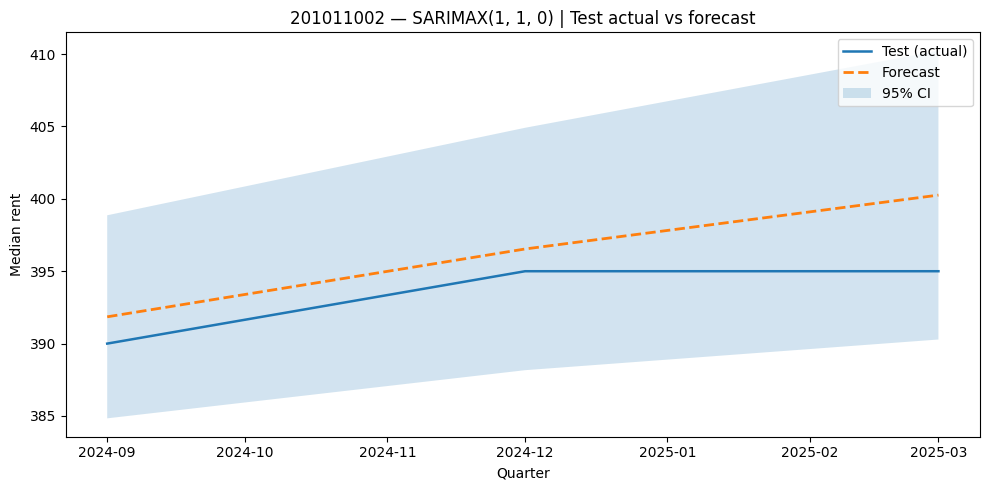

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


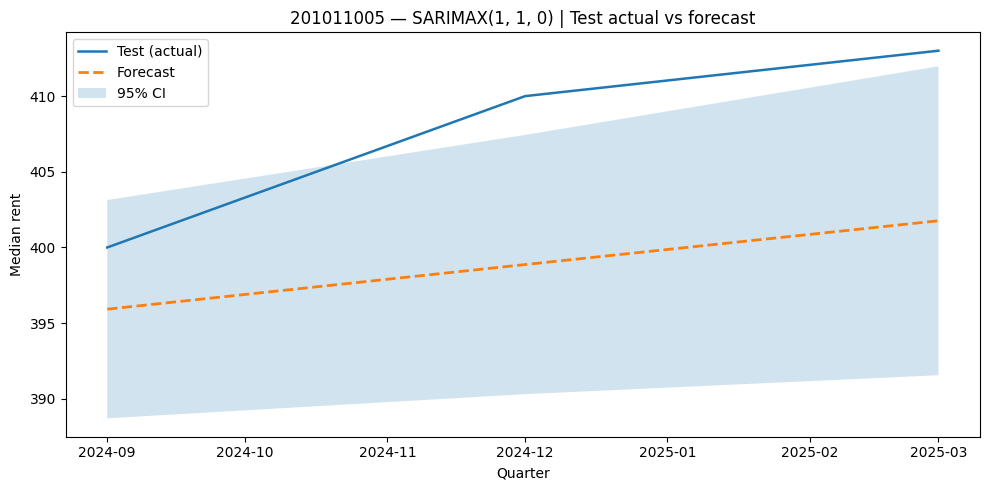

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


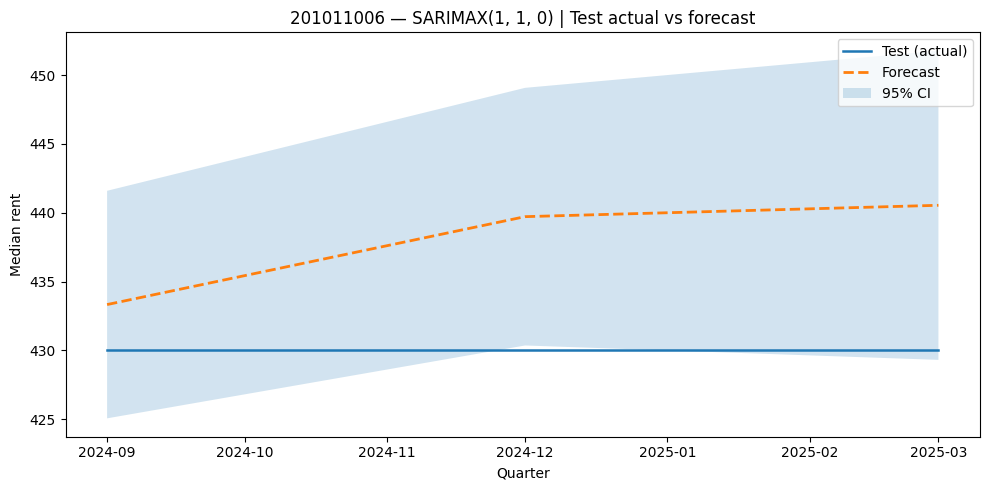

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


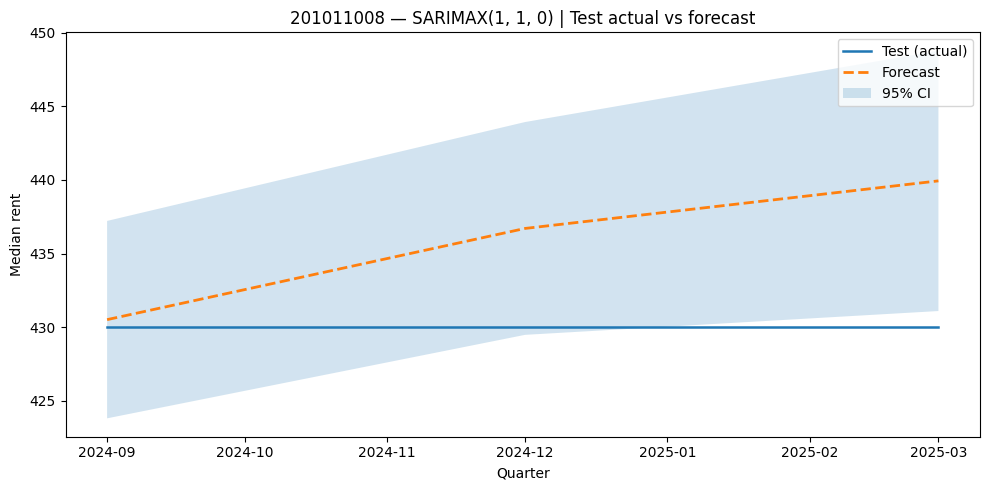

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


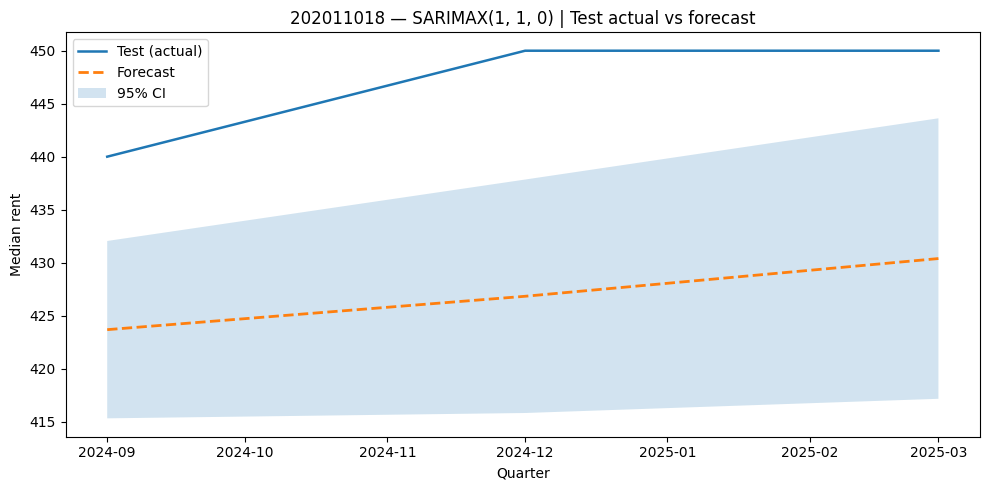

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


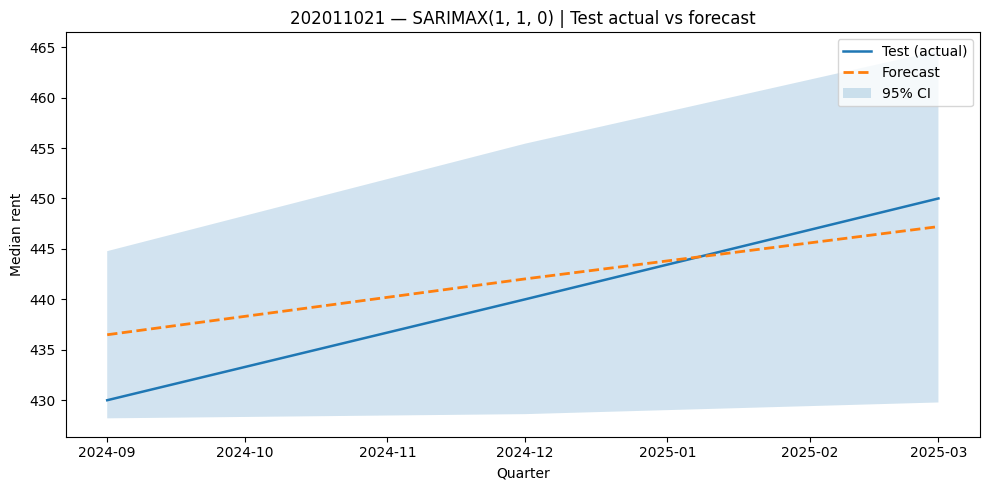

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


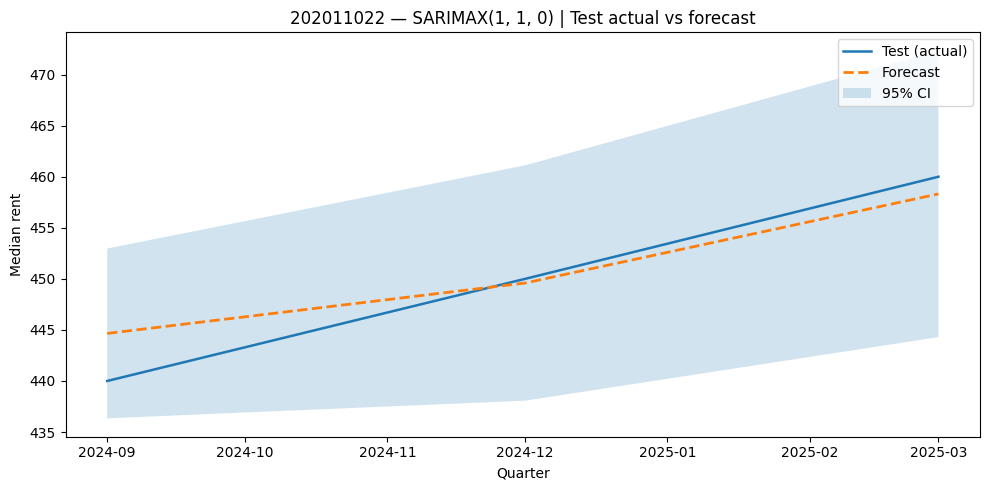

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


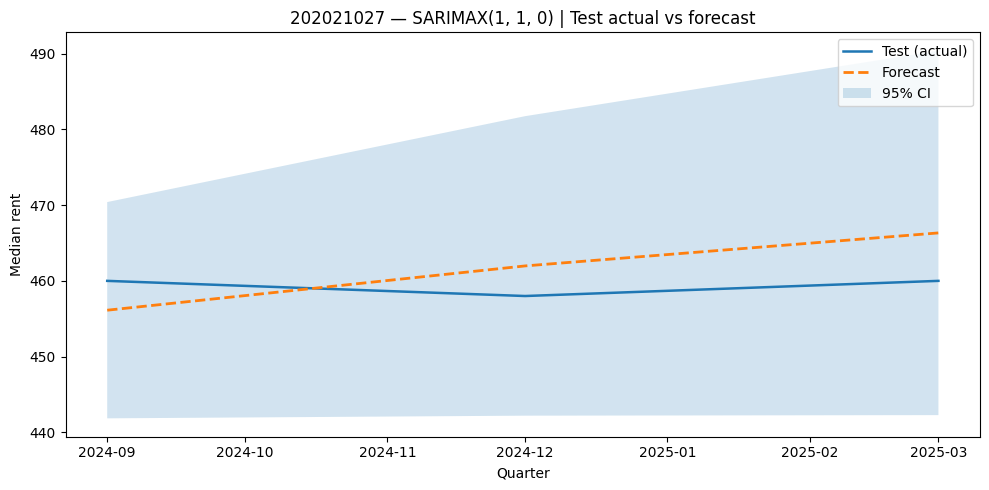

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


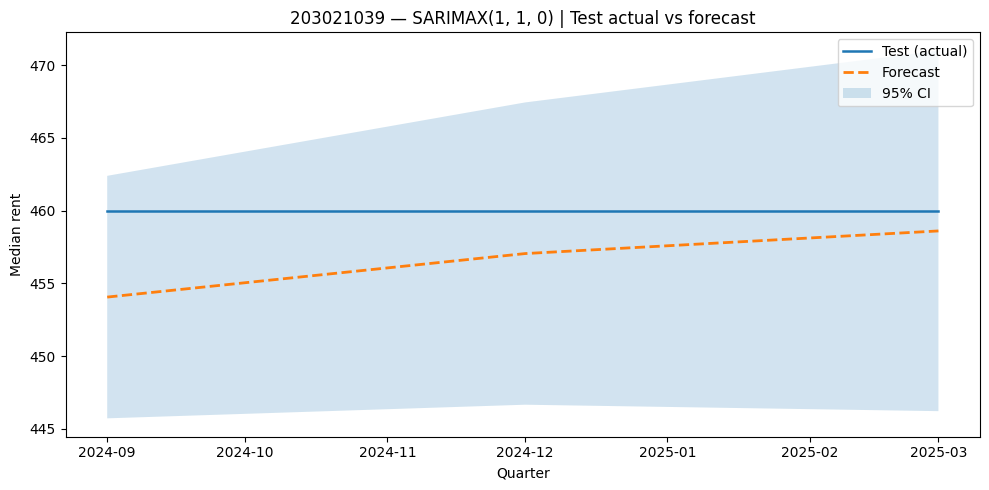

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


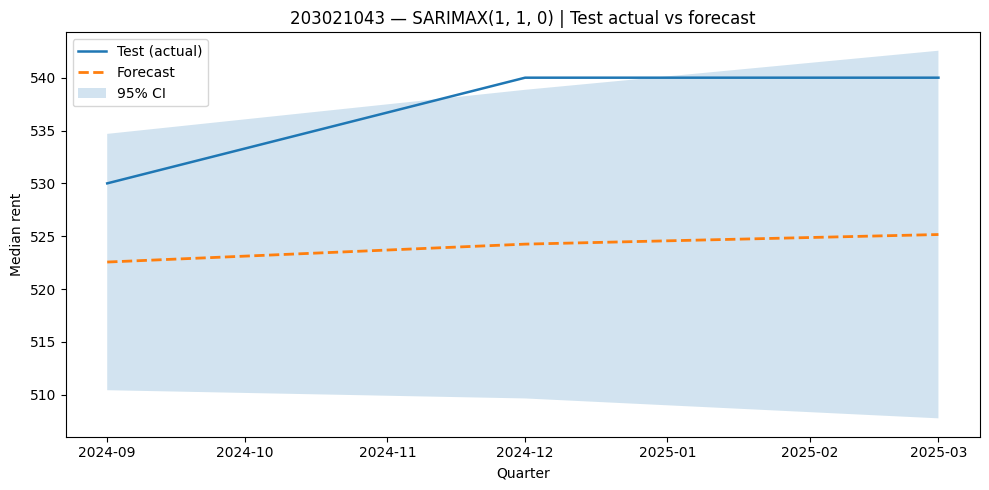

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


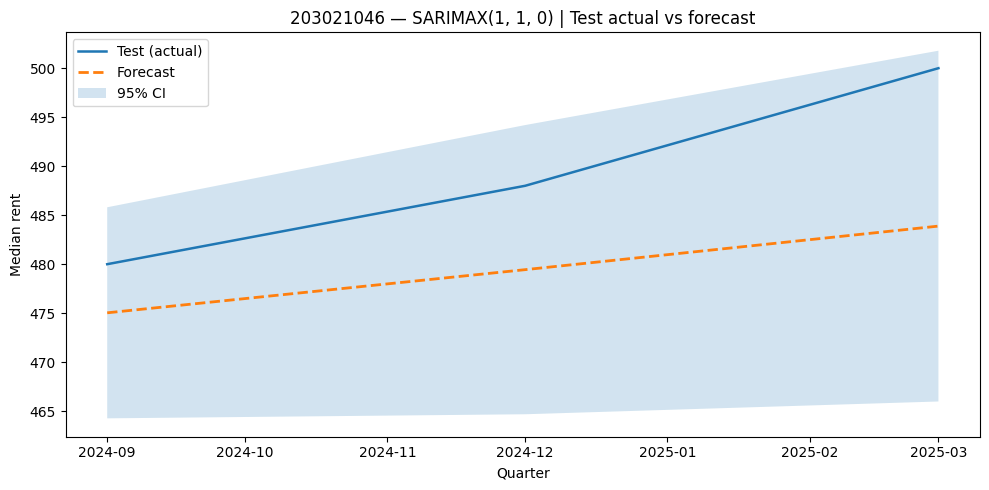

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


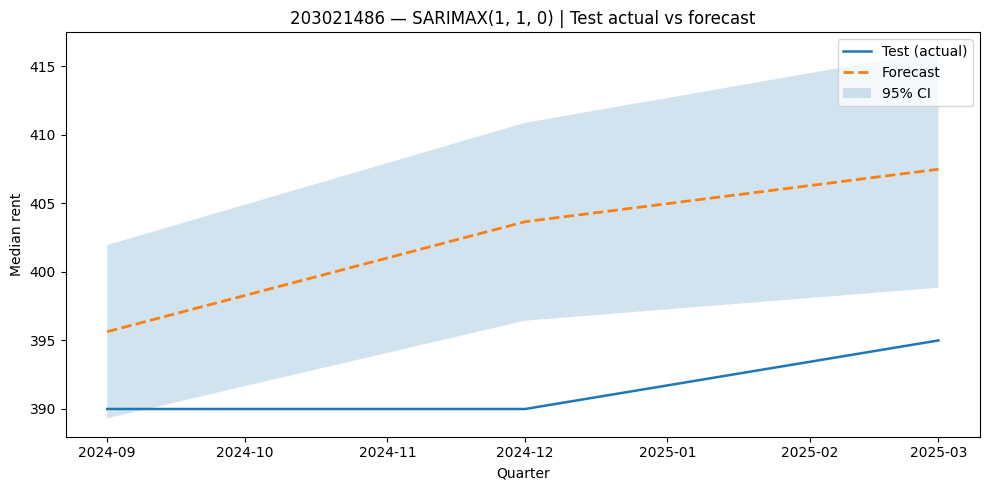

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


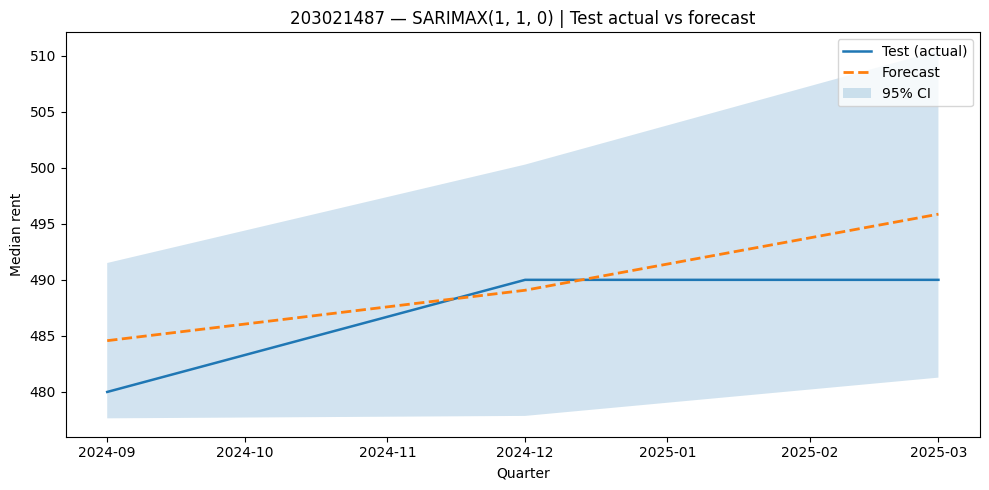

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


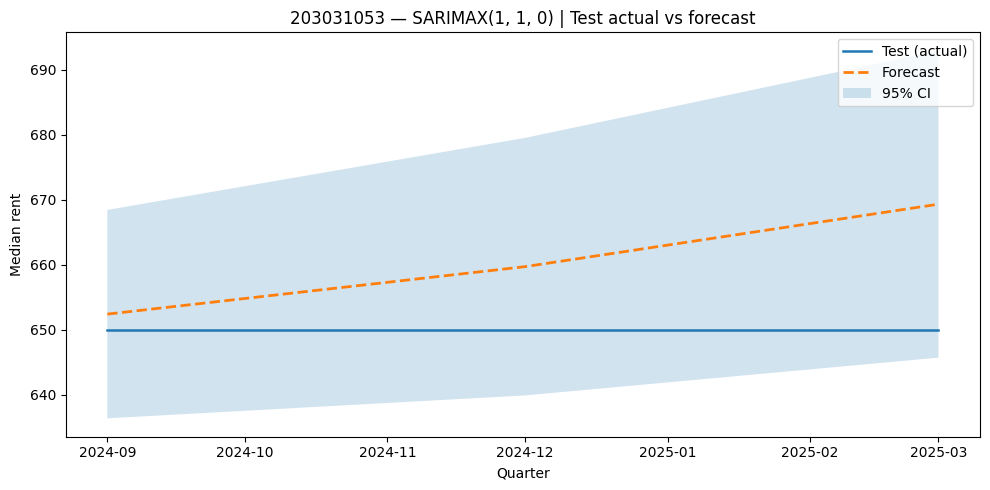

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


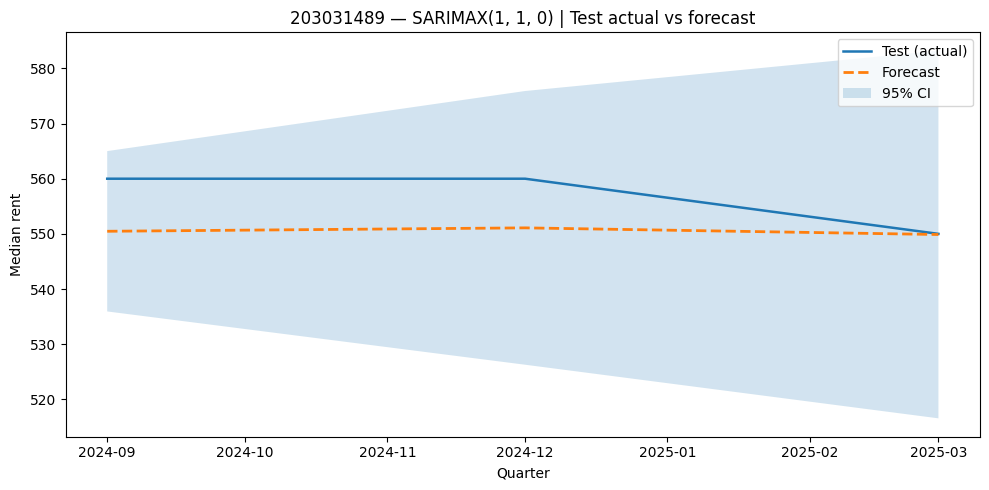

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


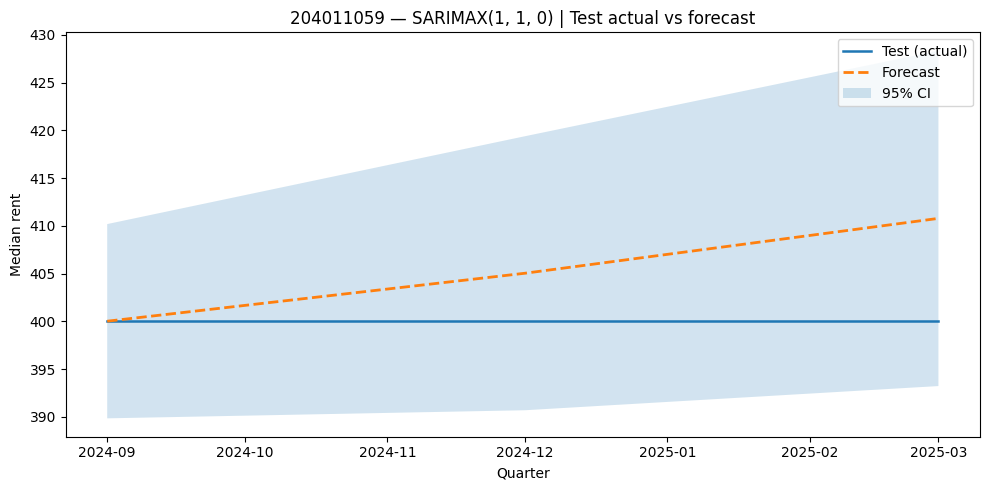

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


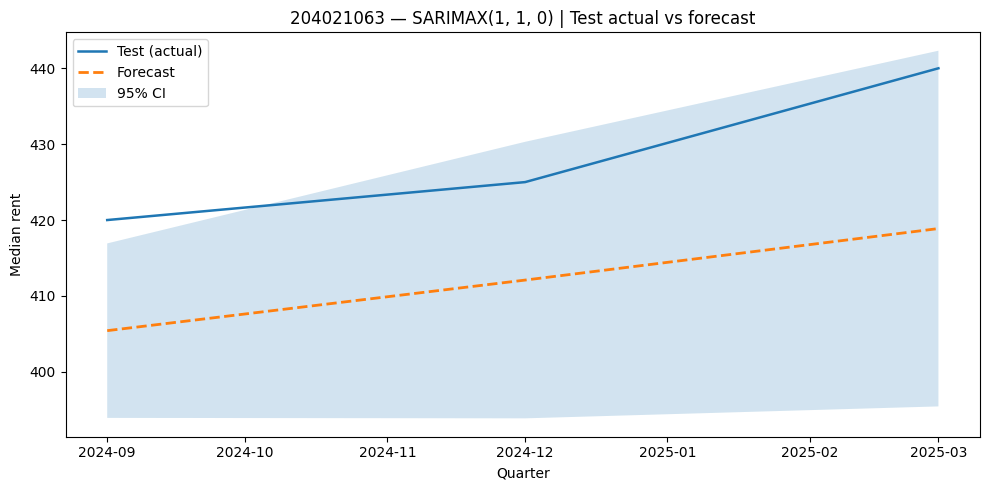

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


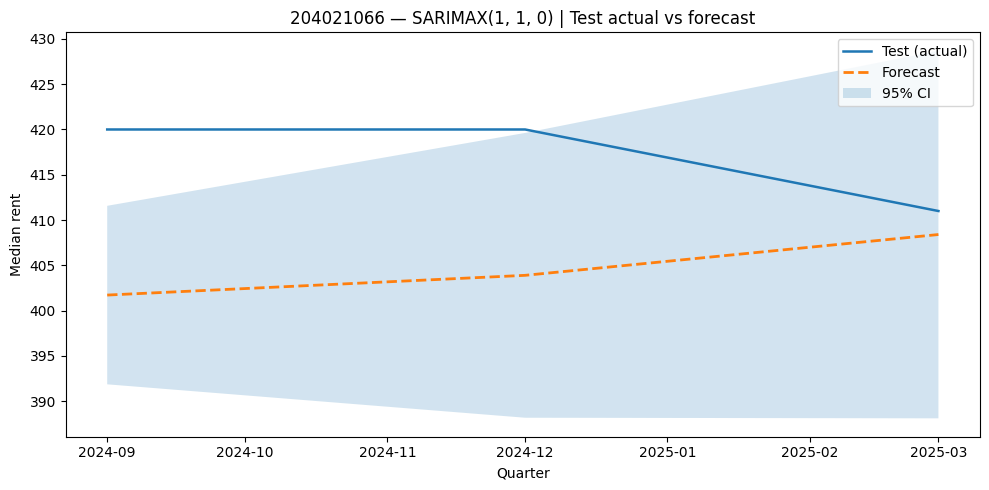

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


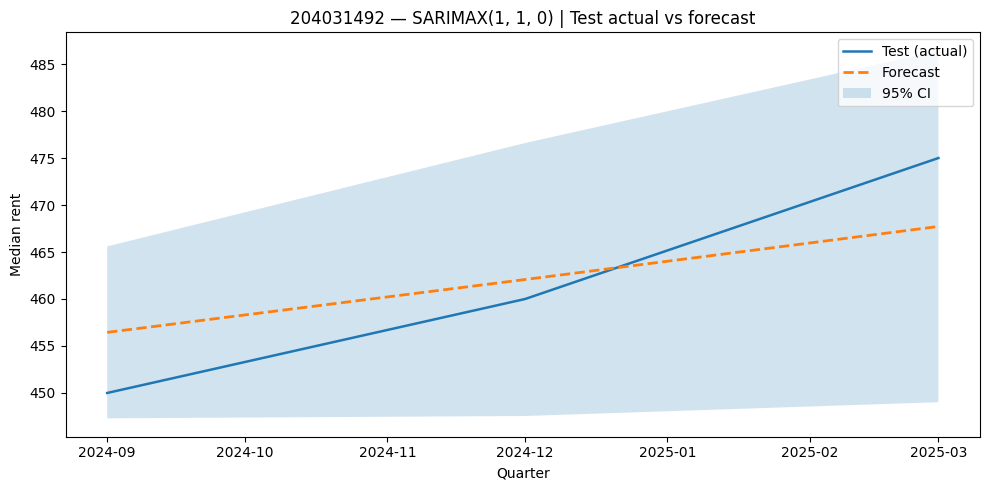

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


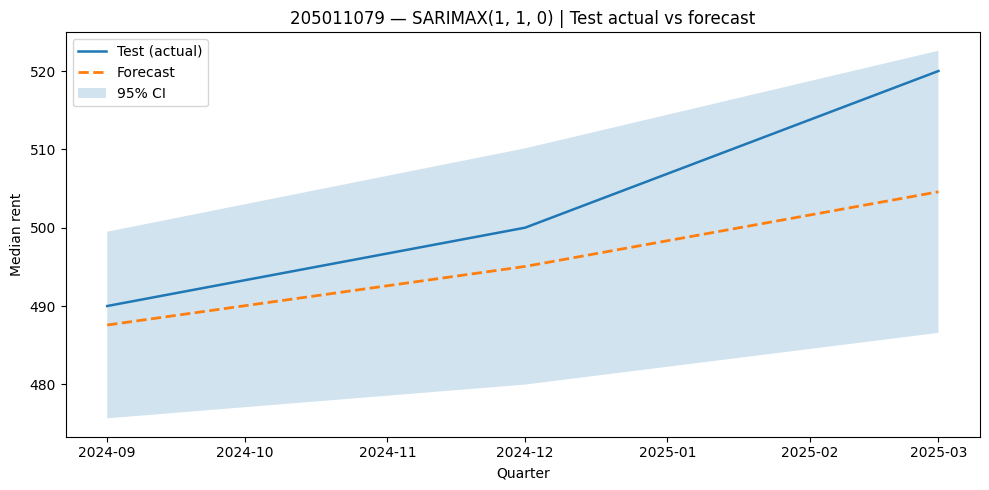

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


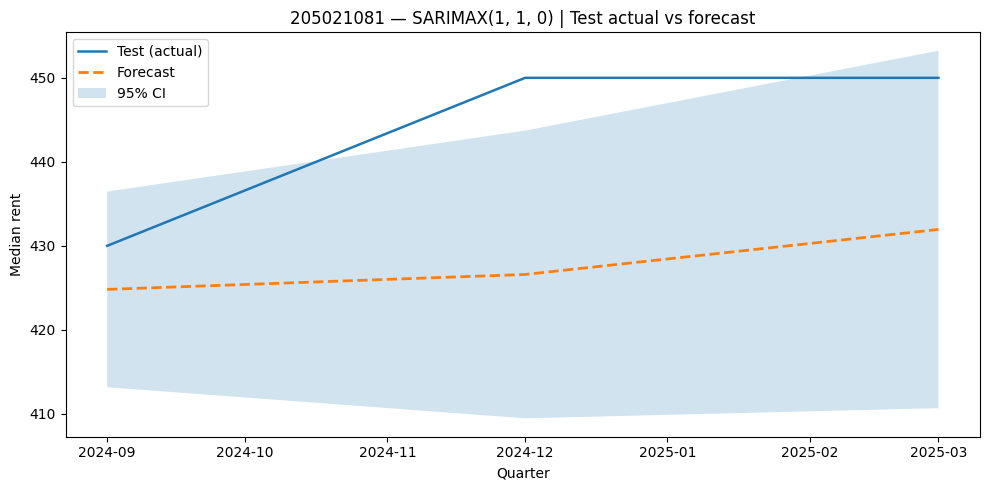

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


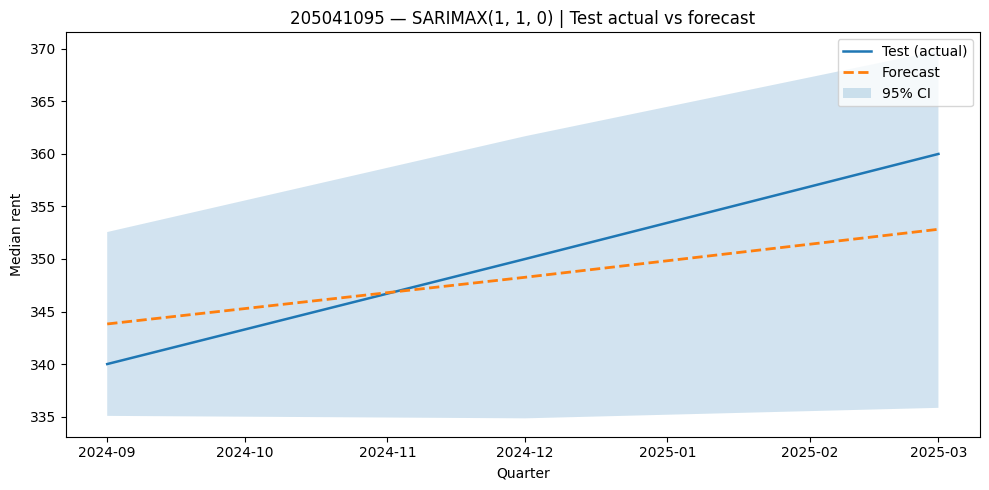

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


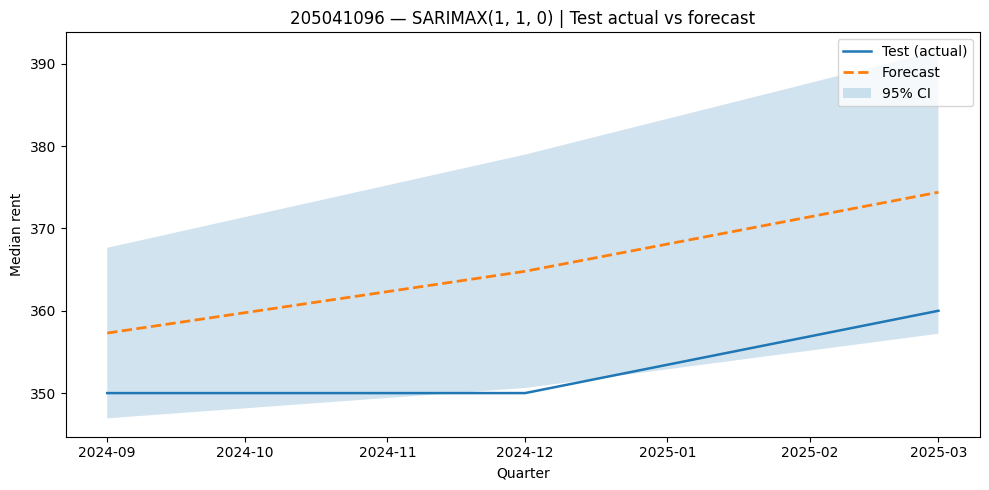

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


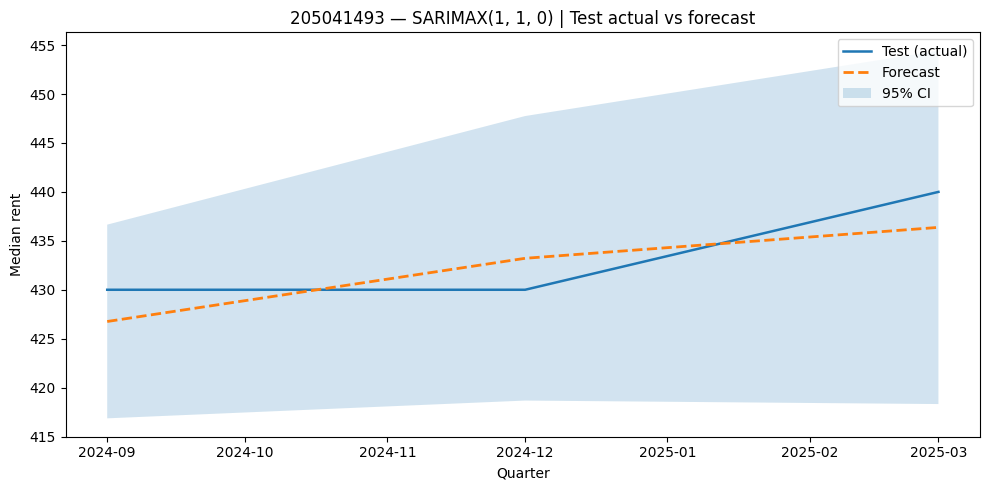

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


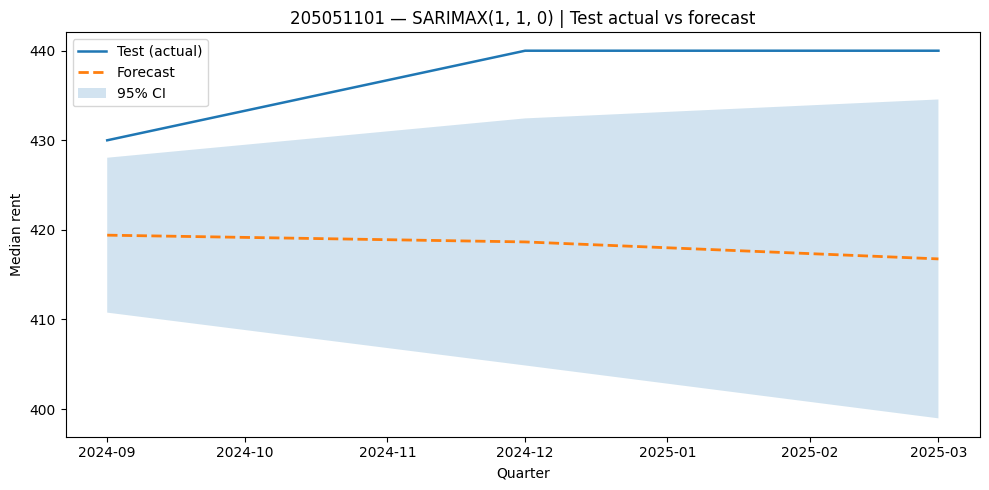

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


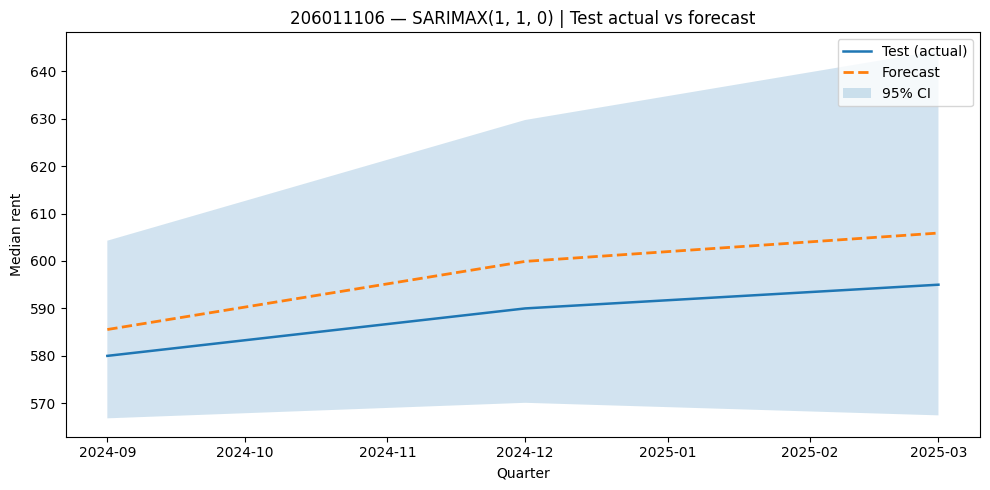

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


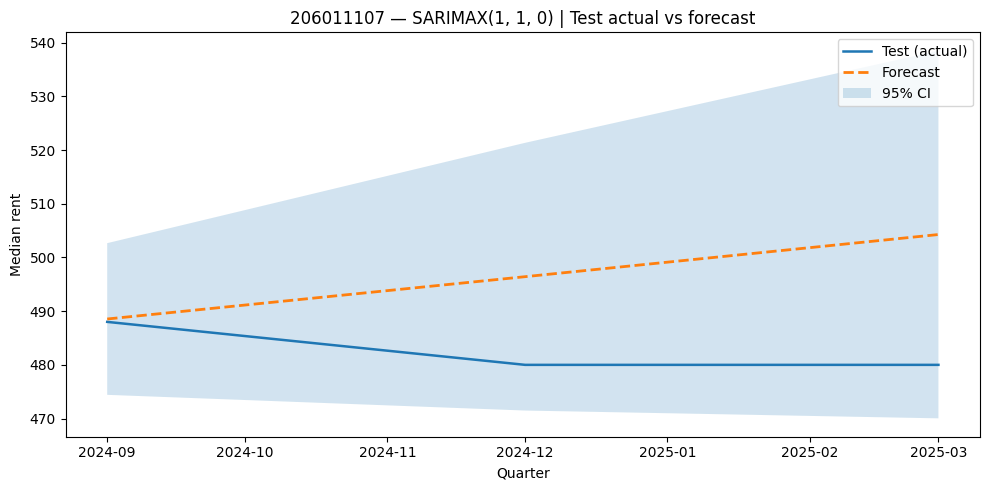

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


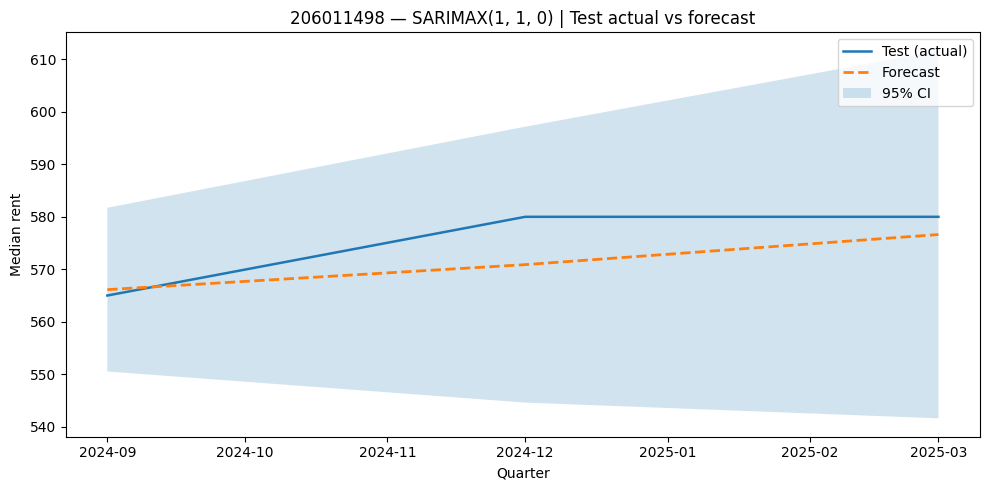

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


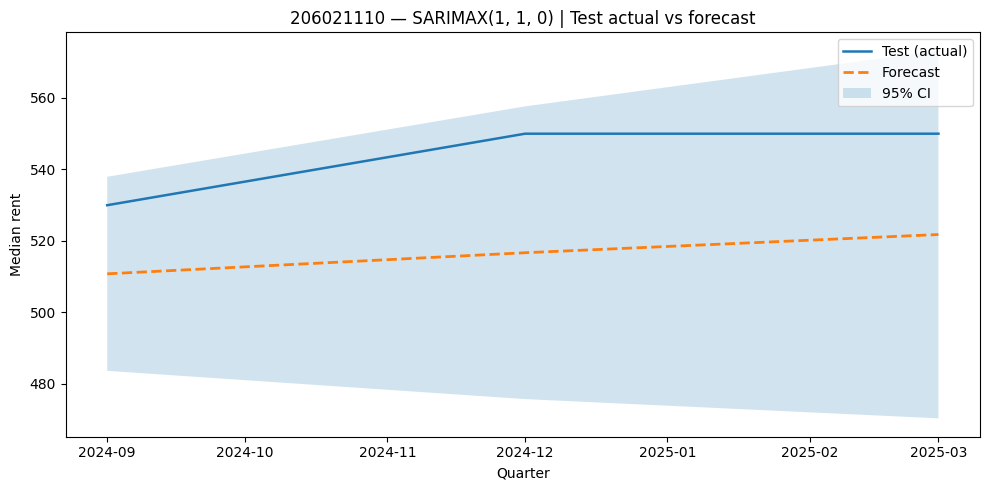

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


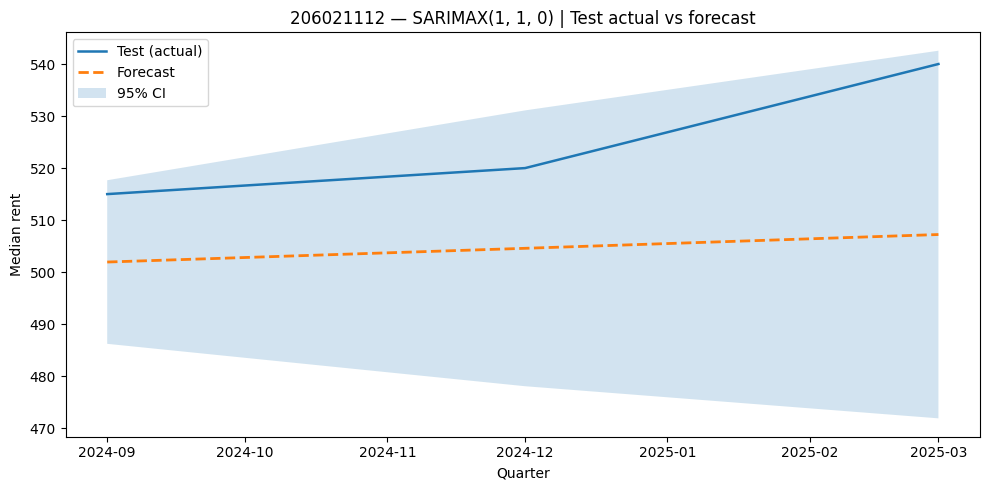

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


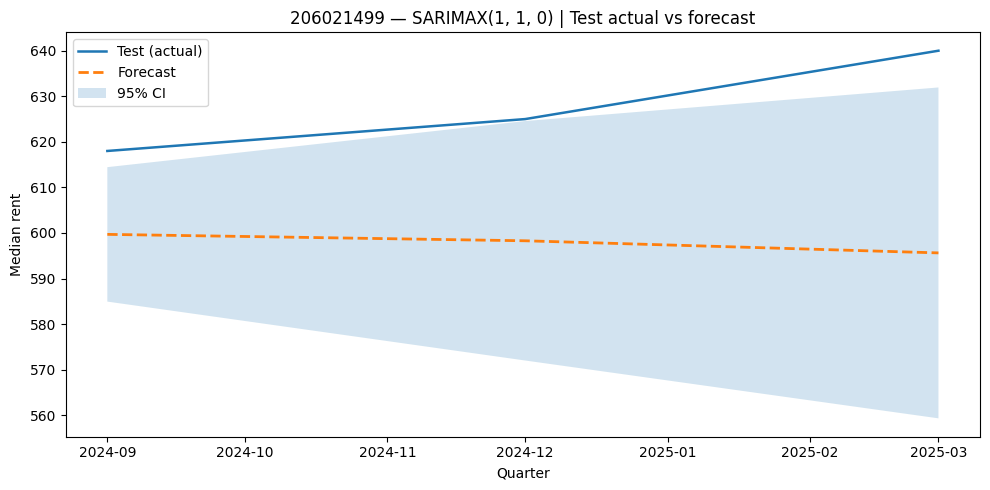

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


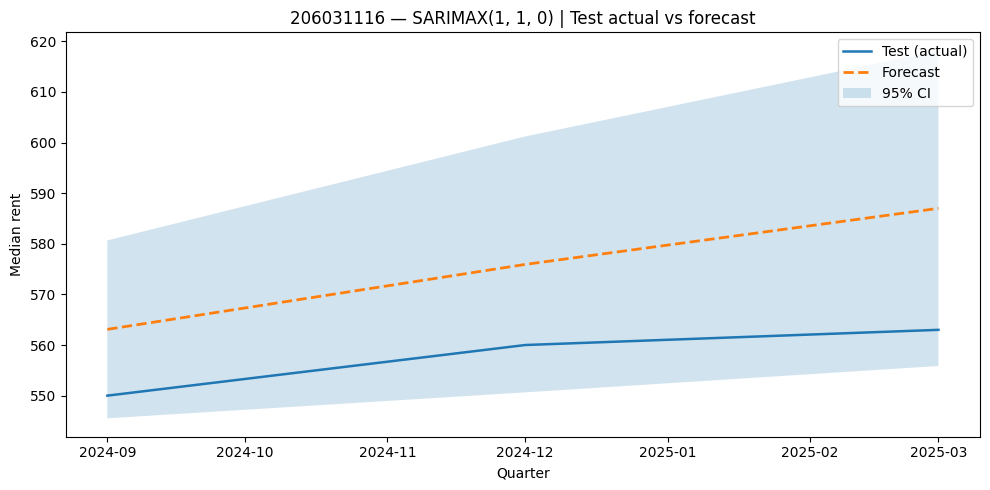

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


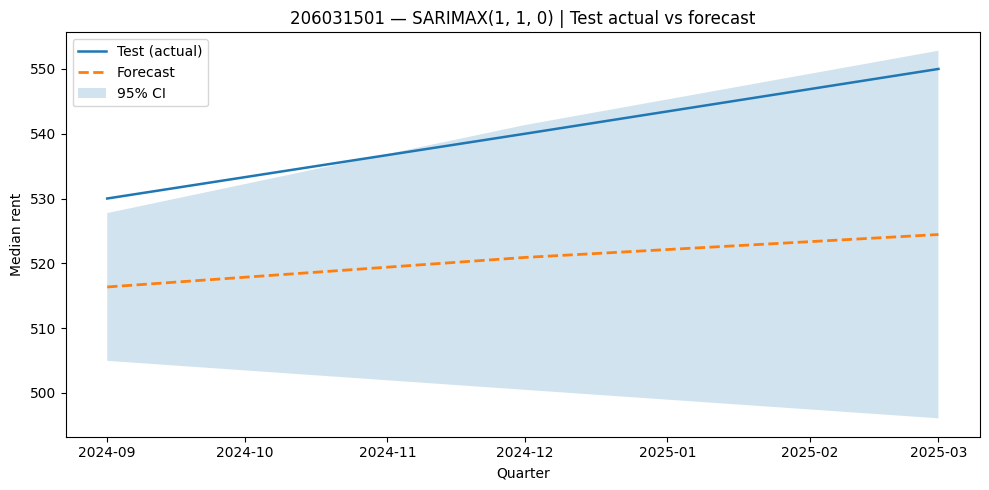

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


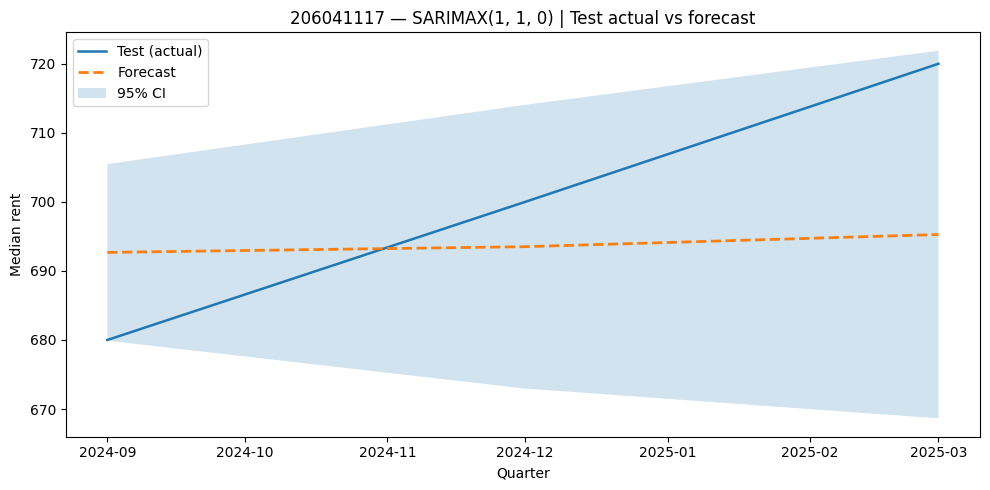

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


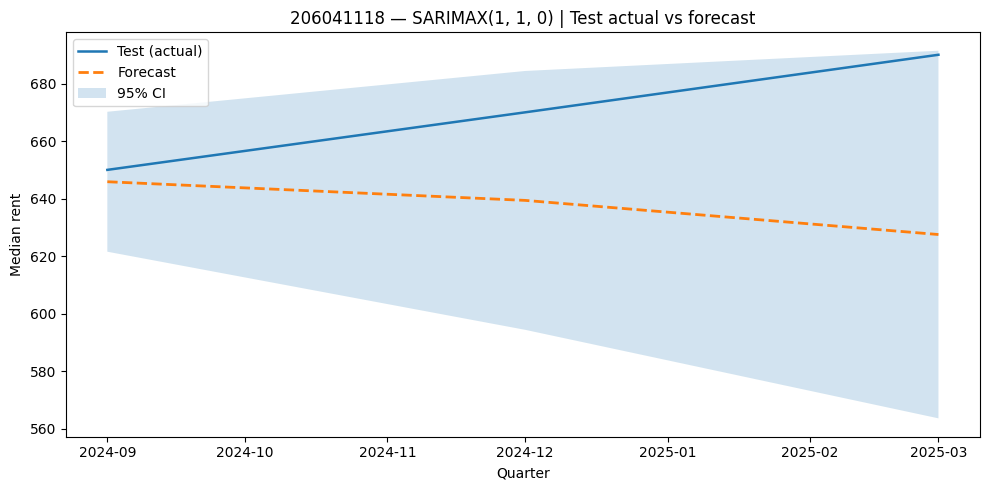

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


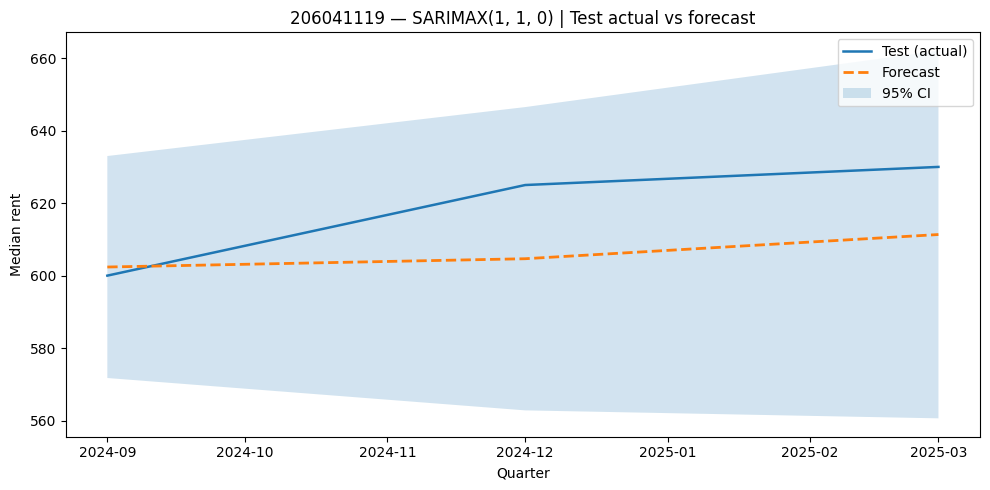

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


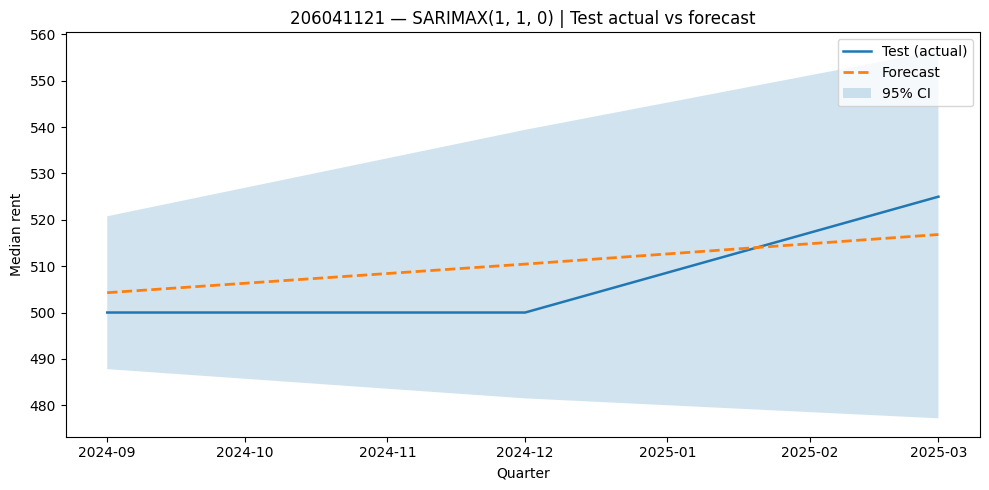

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


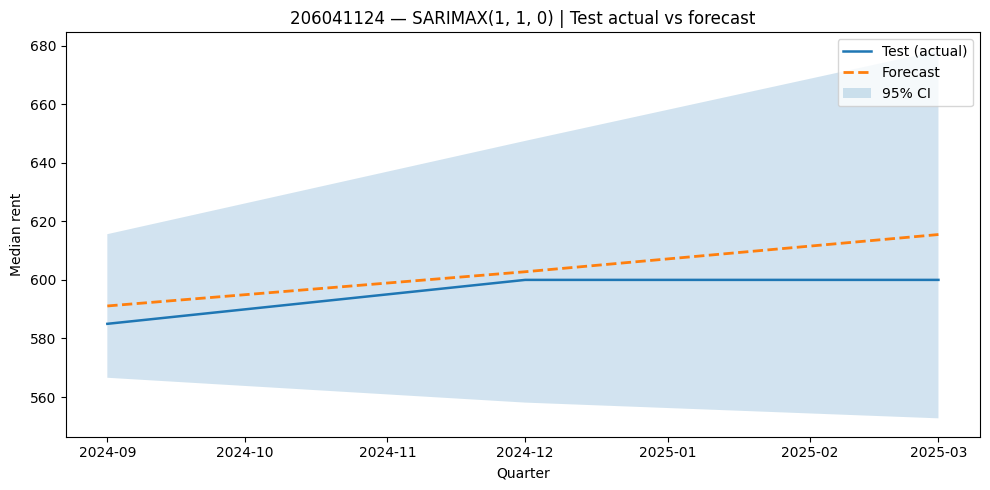

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


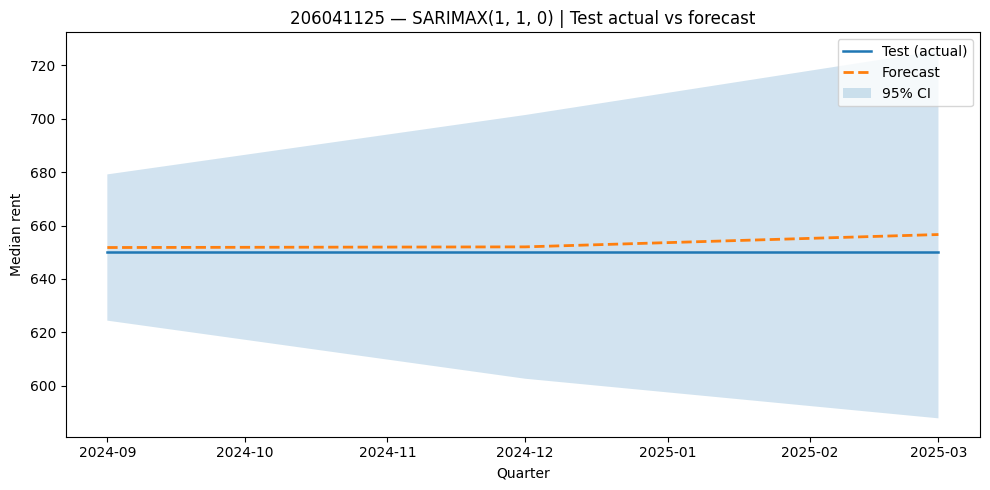

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


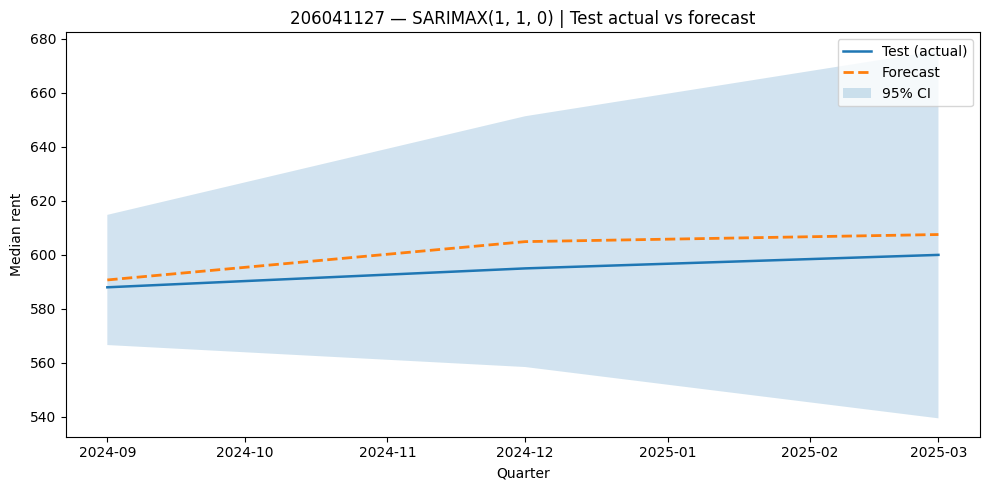

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


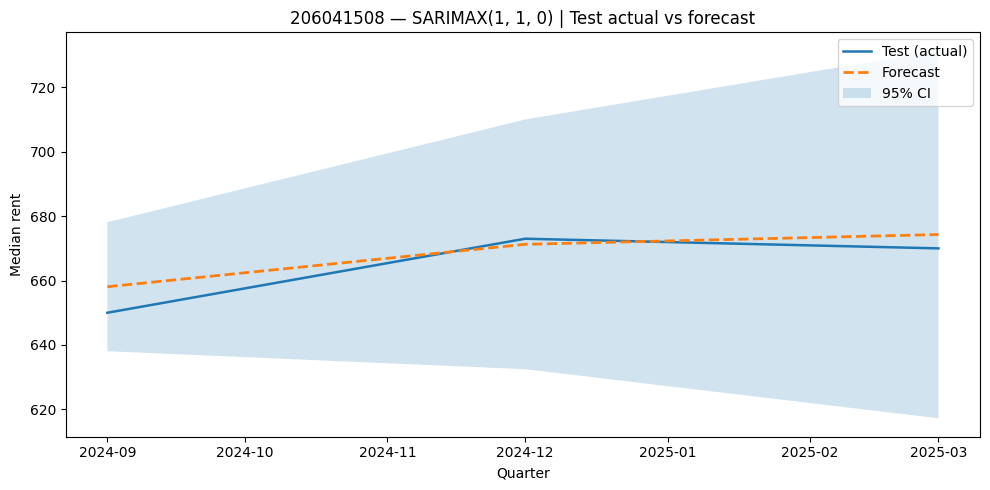

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


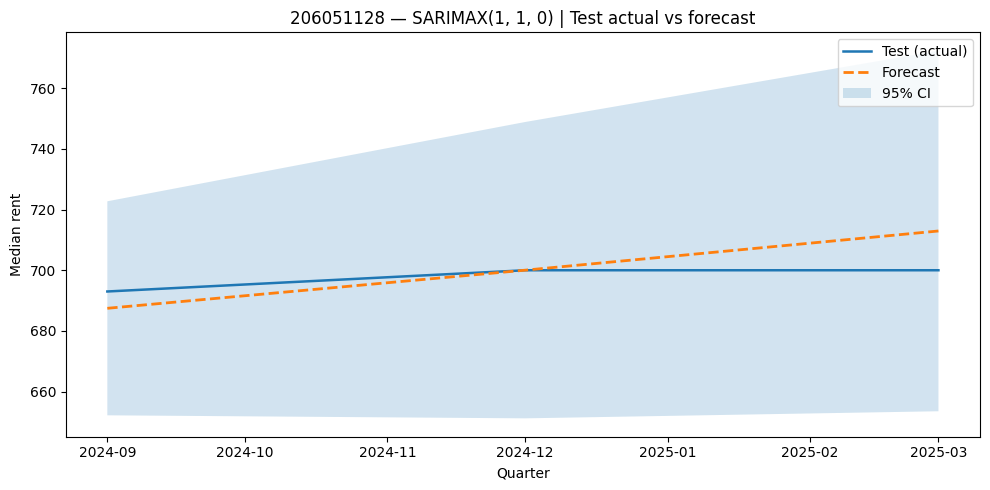

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


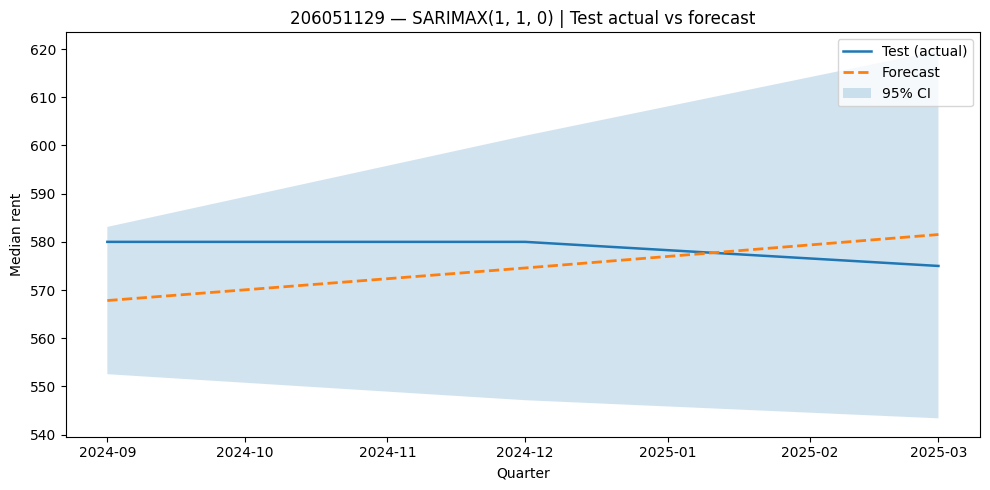

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


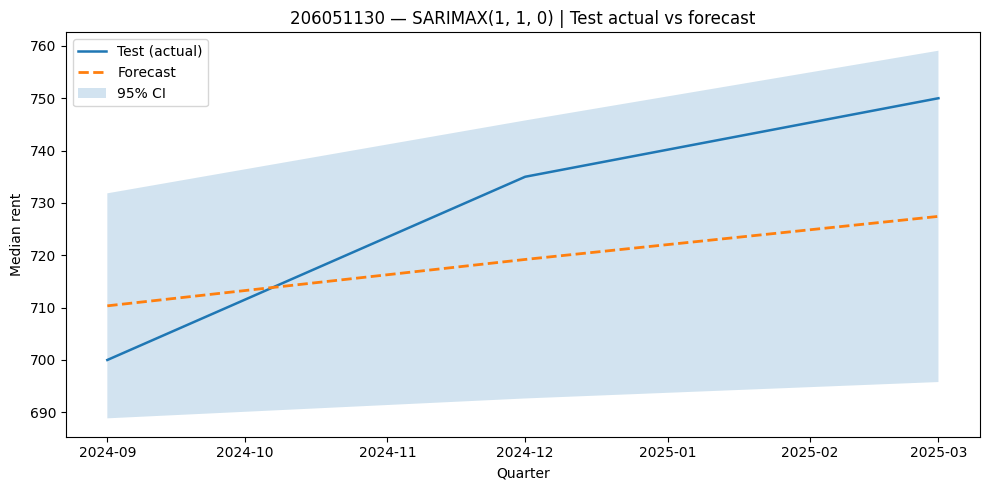

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


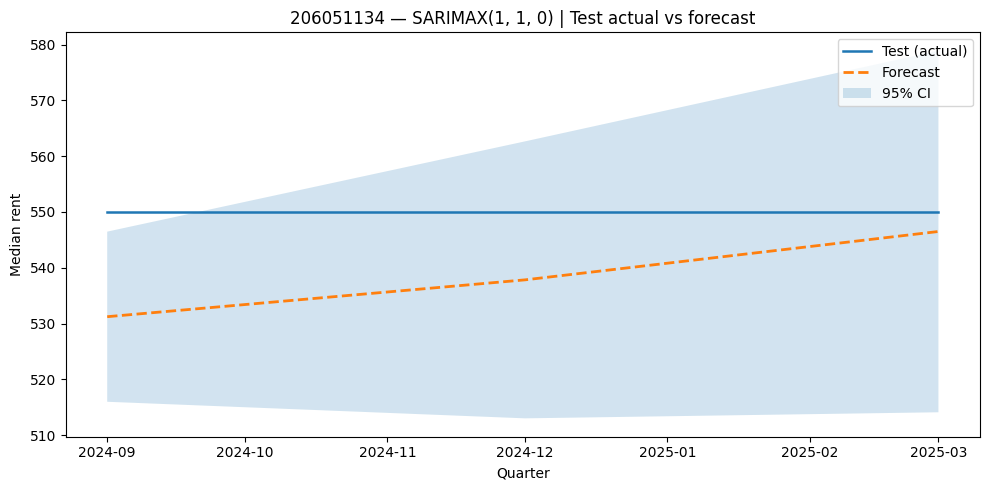

/home/eeamanda/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


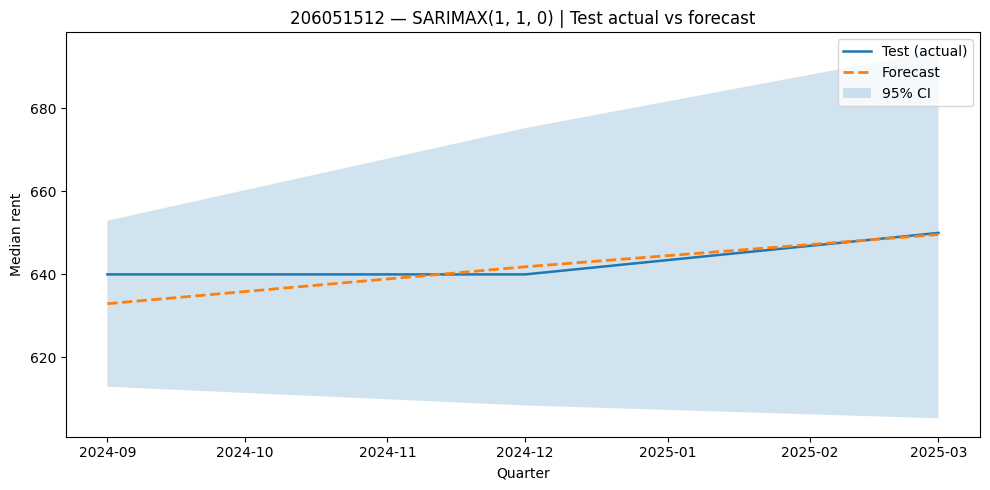

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


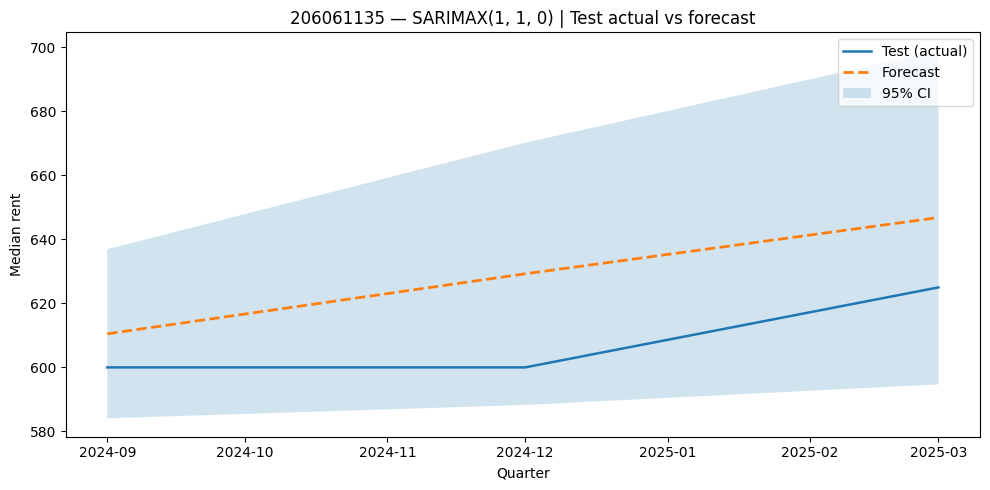

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


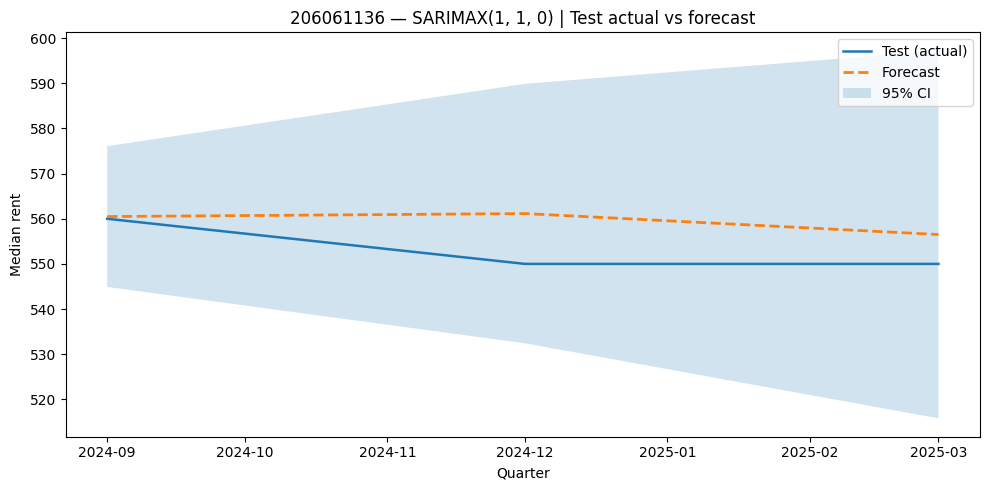

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


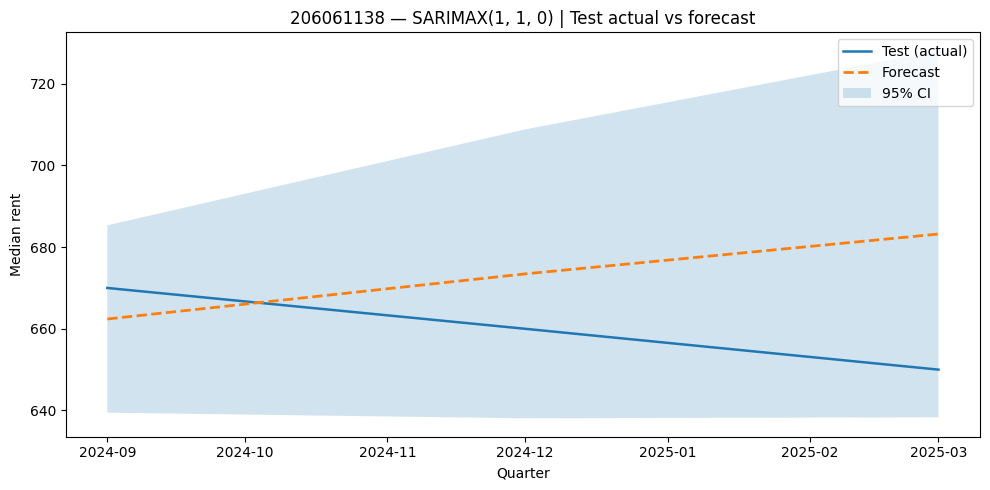

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


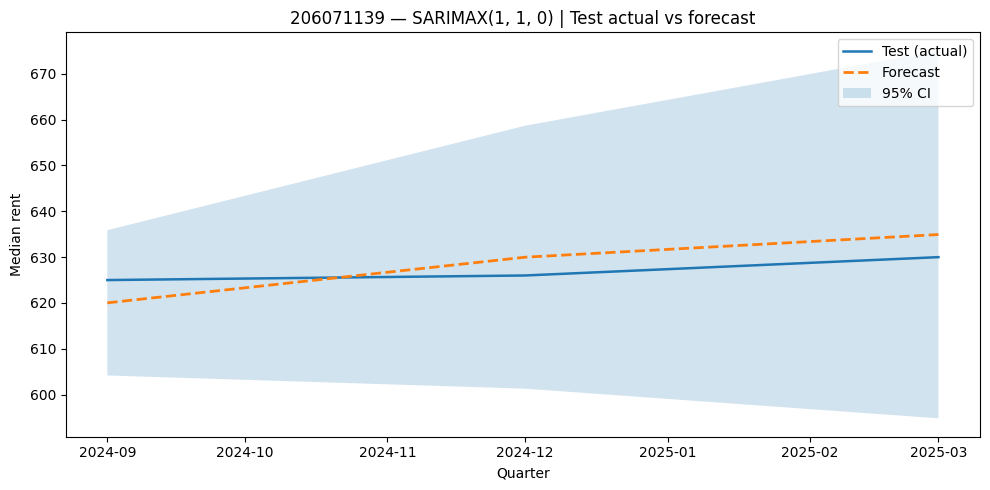

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


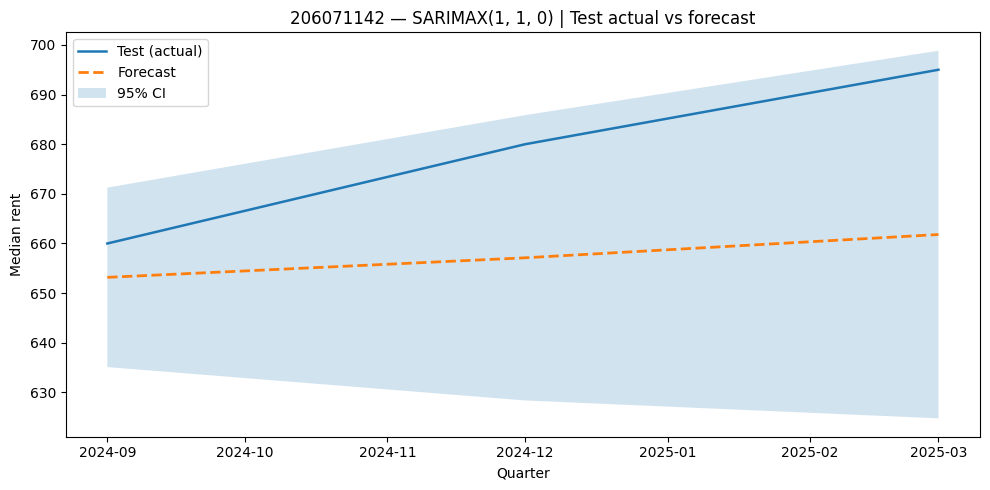

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


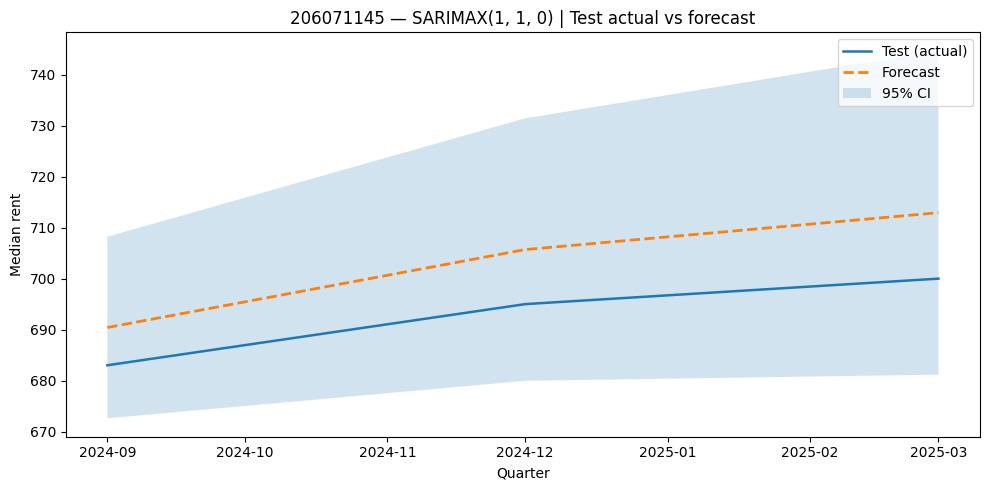

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


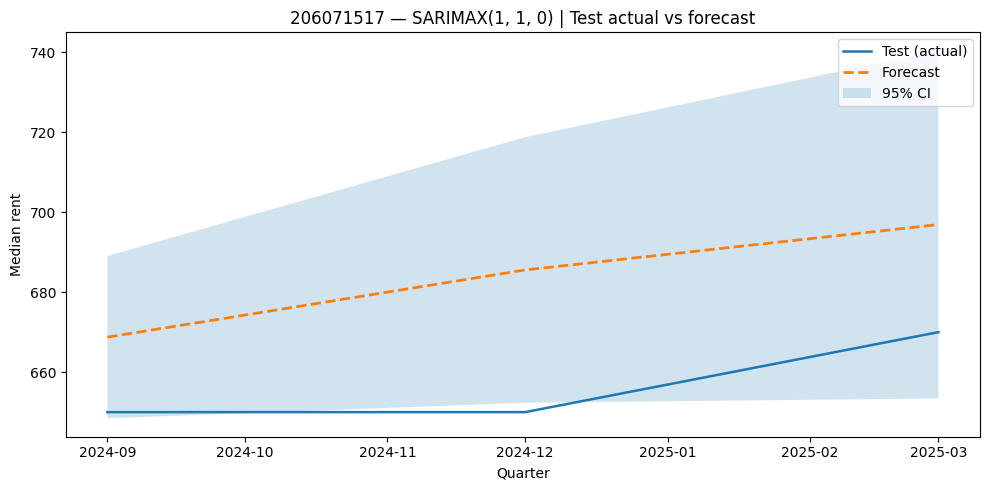

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


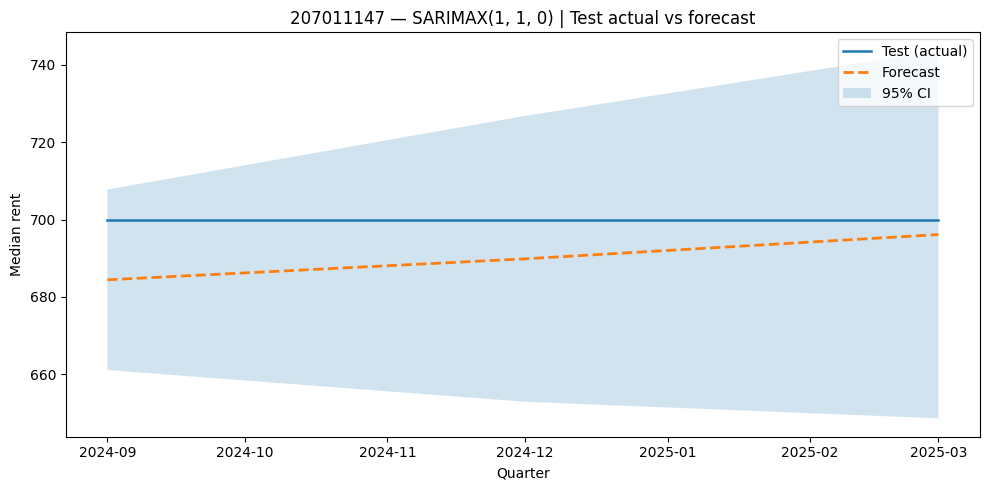

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


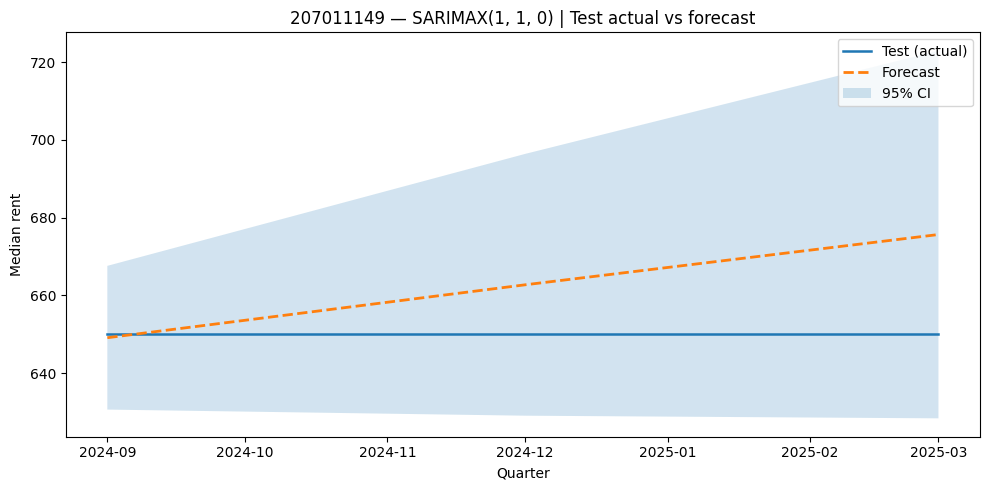

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


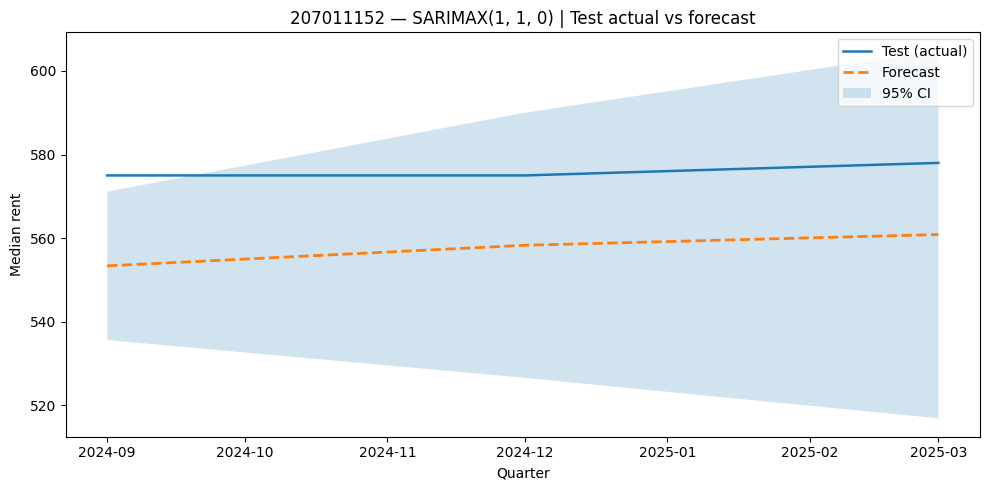

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


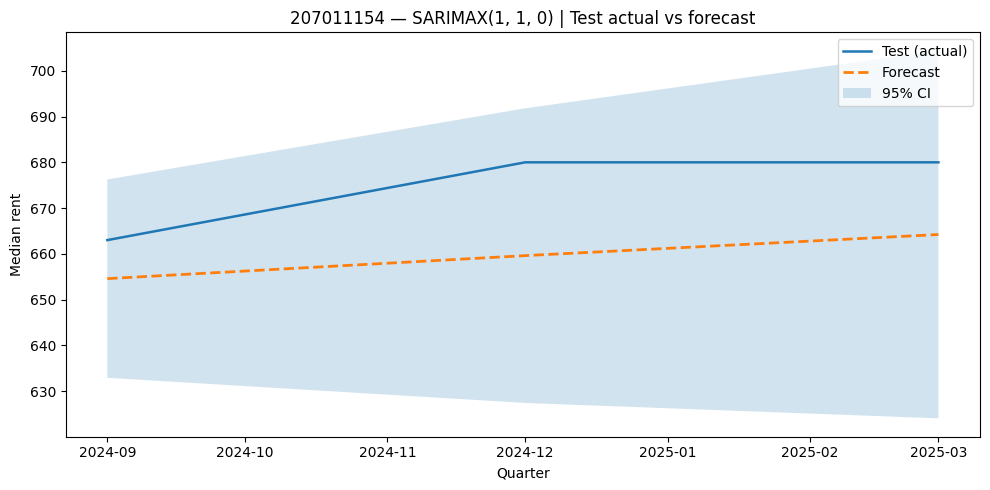

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


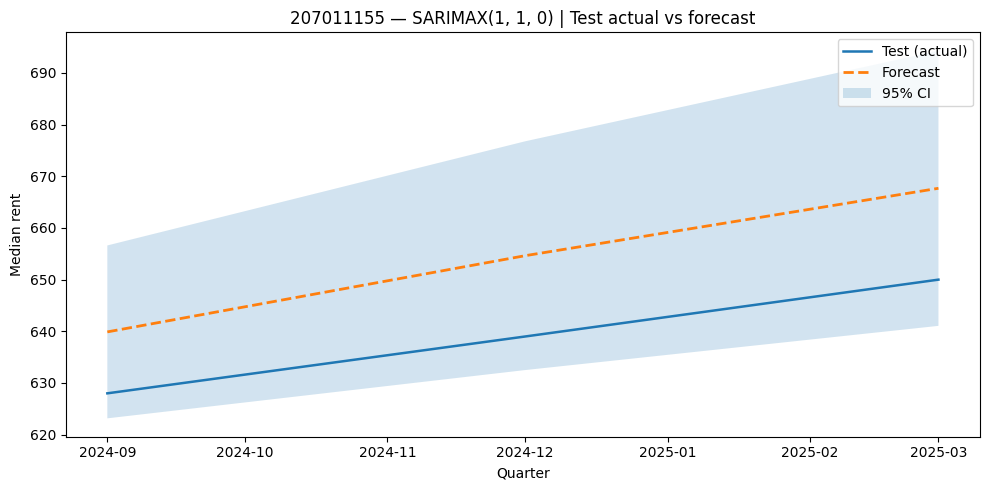

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


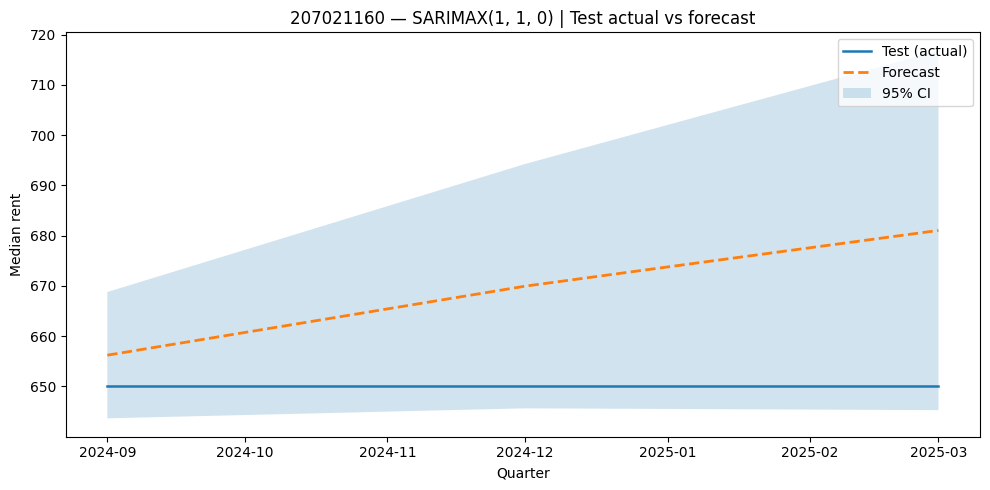

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


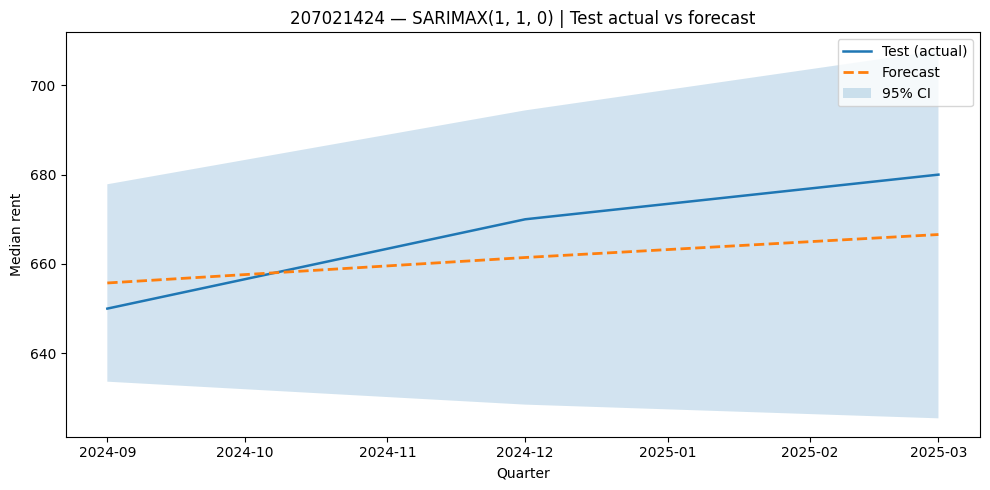

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


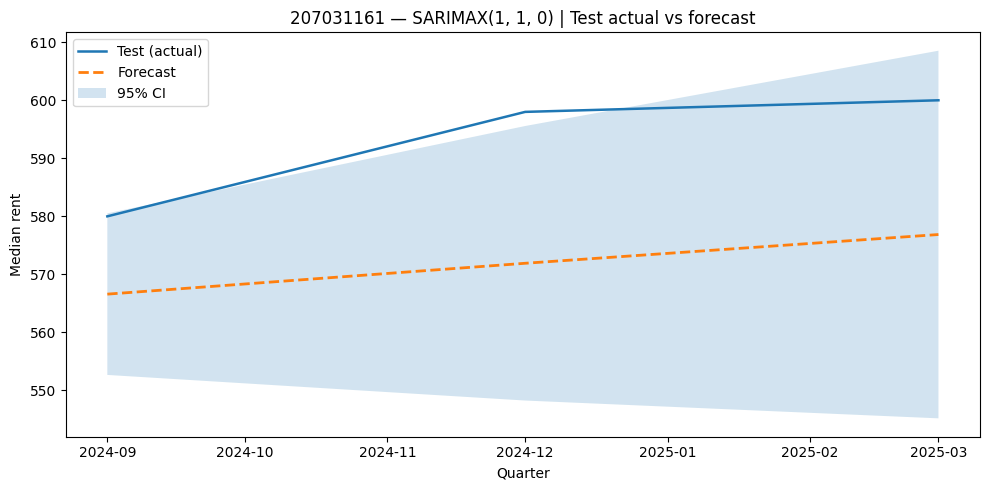

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


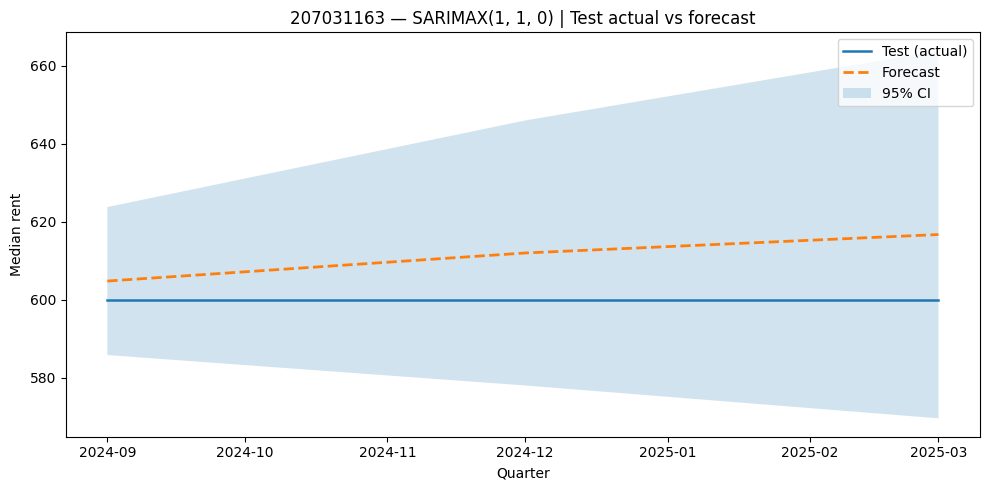

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


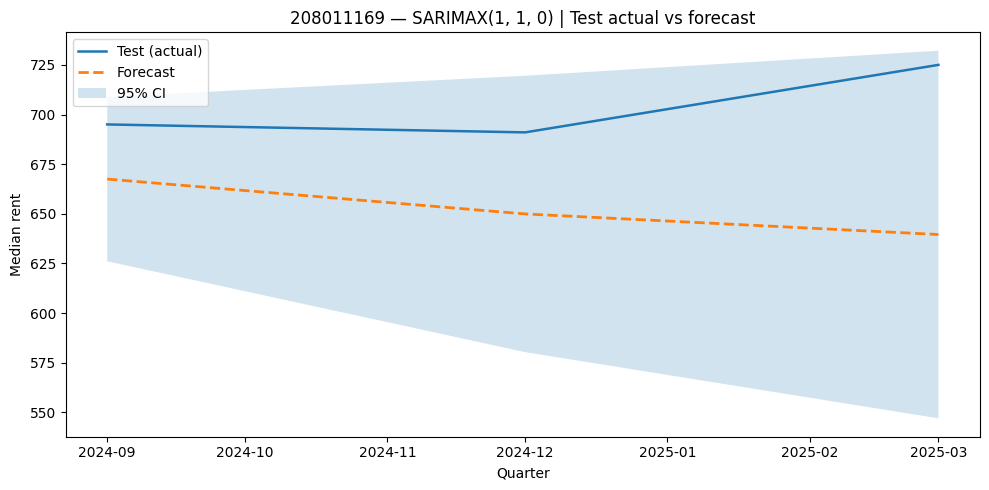

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


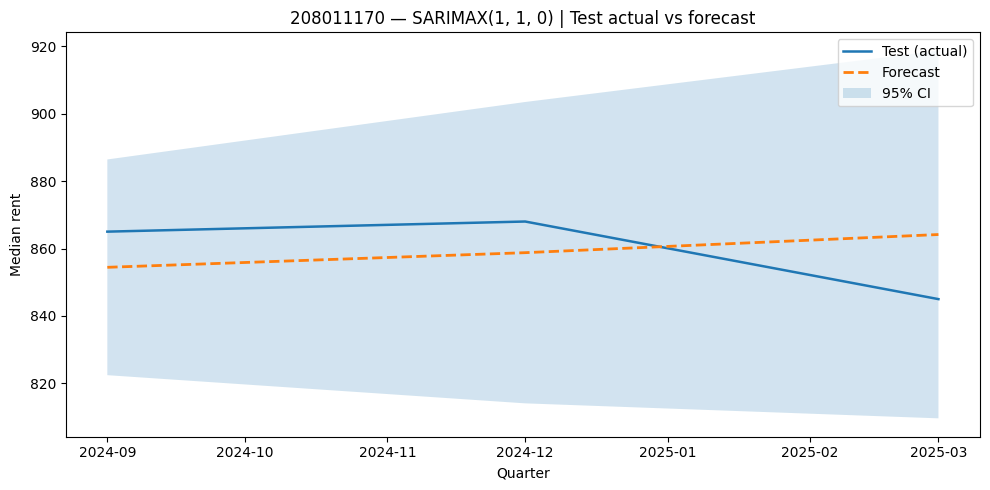

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


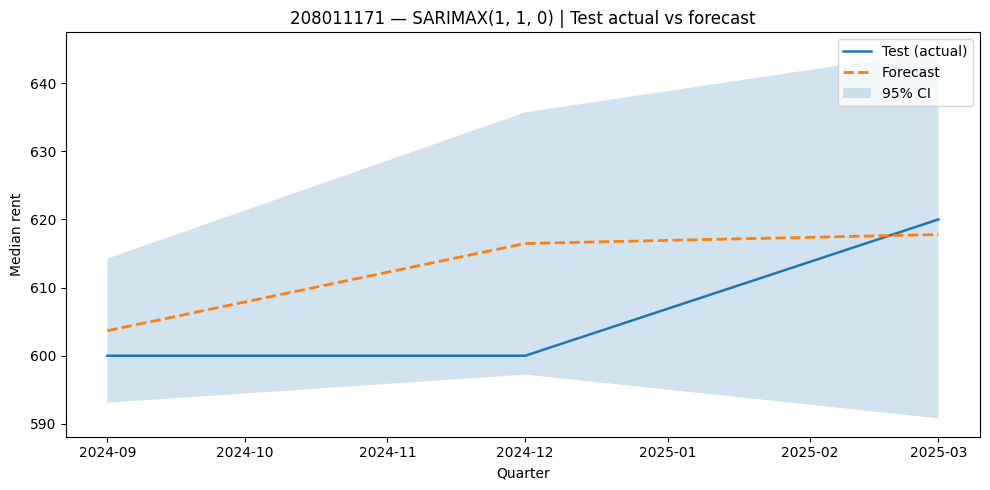

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


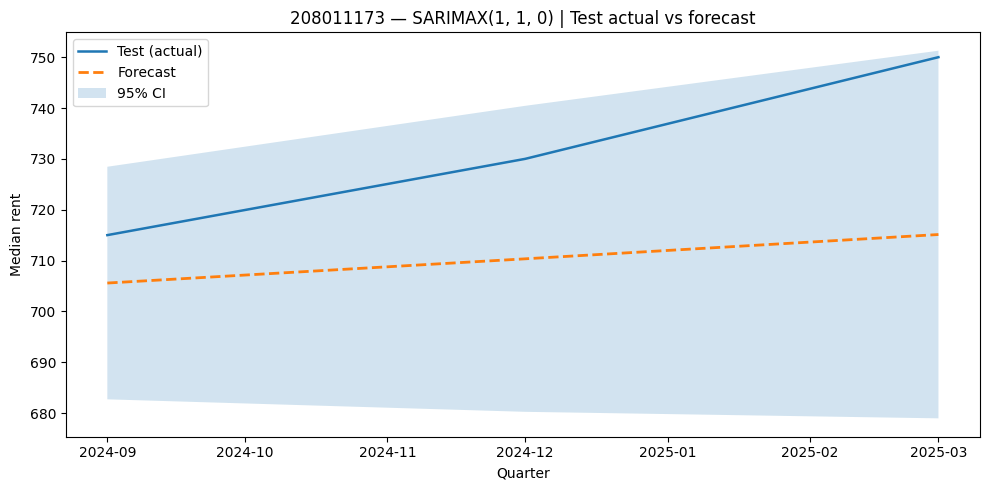

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


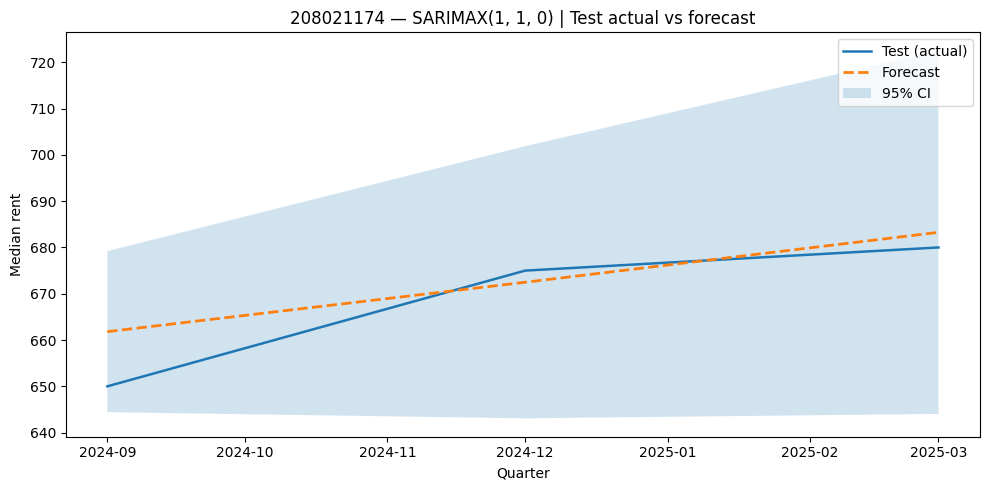

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


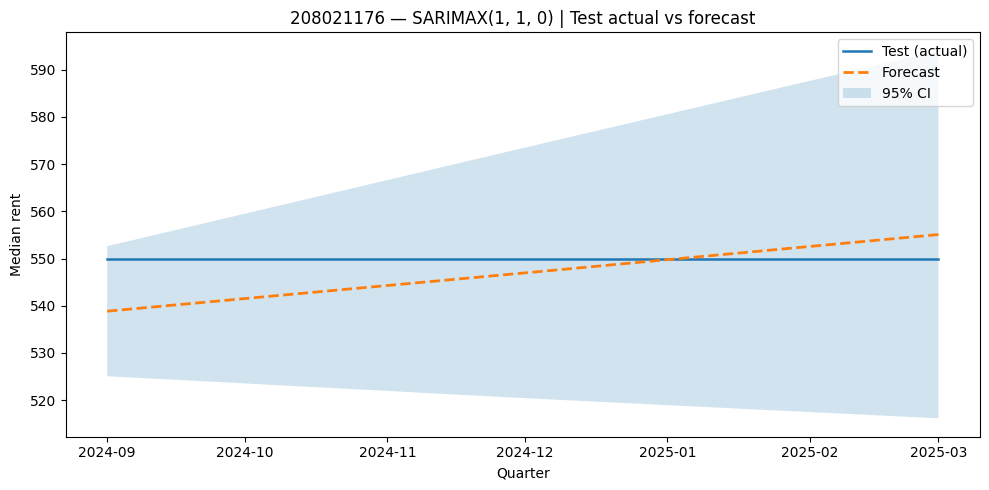

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


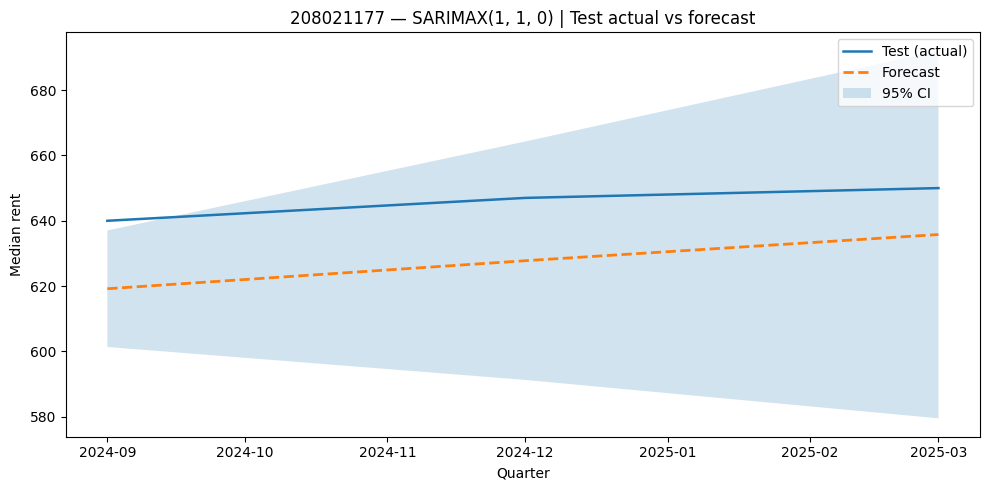

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


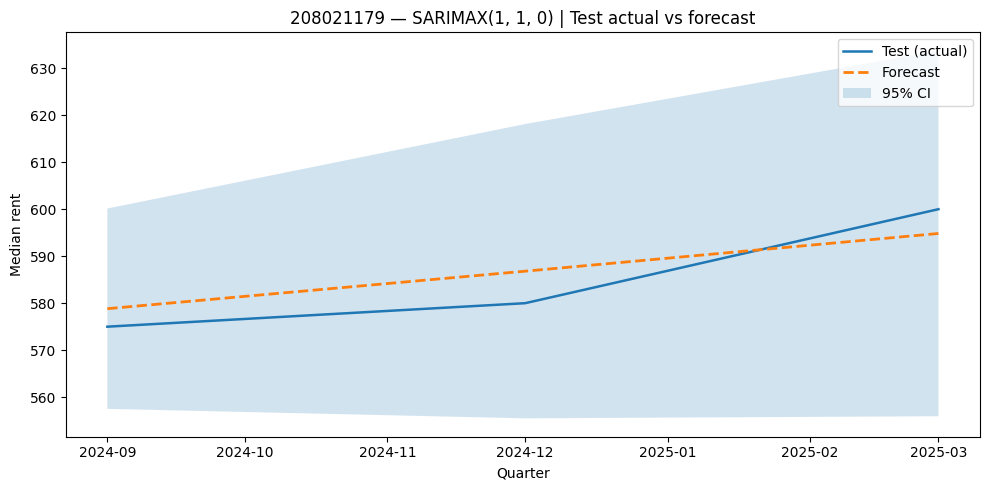

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


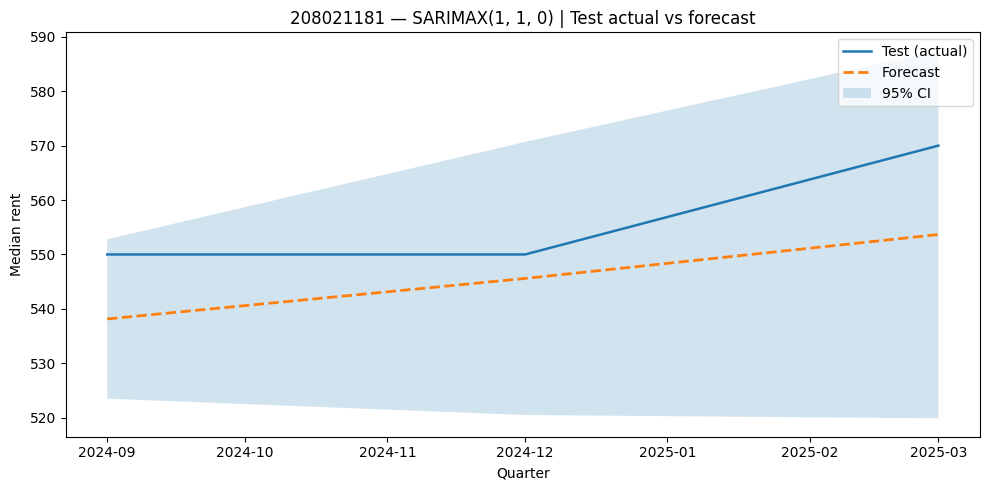

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


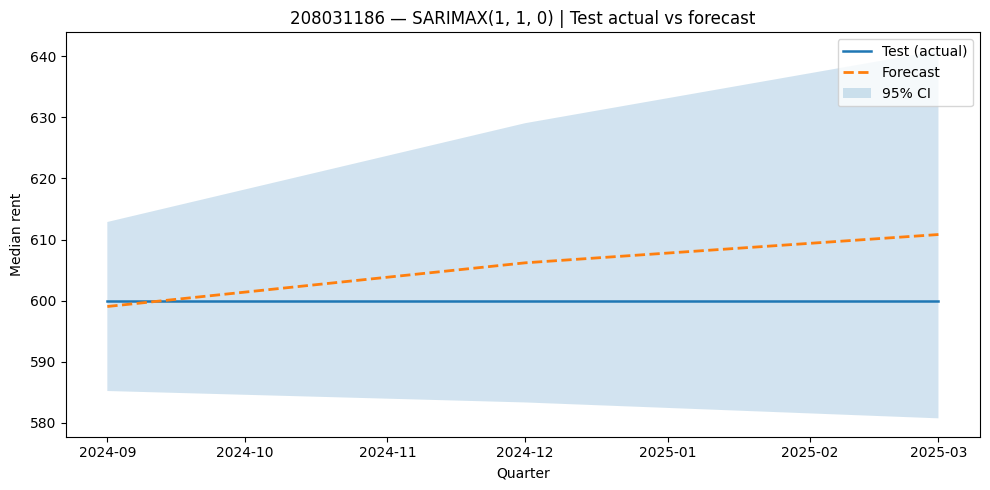

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


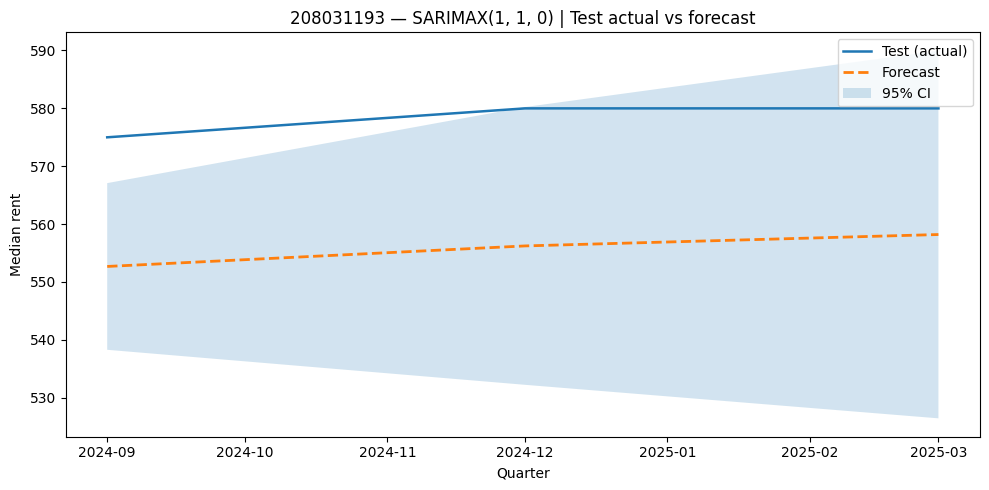

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


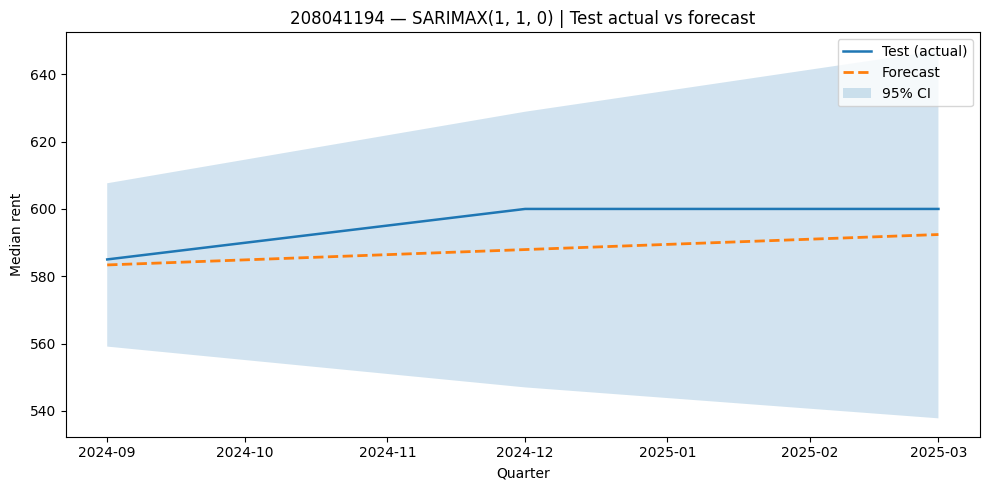

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


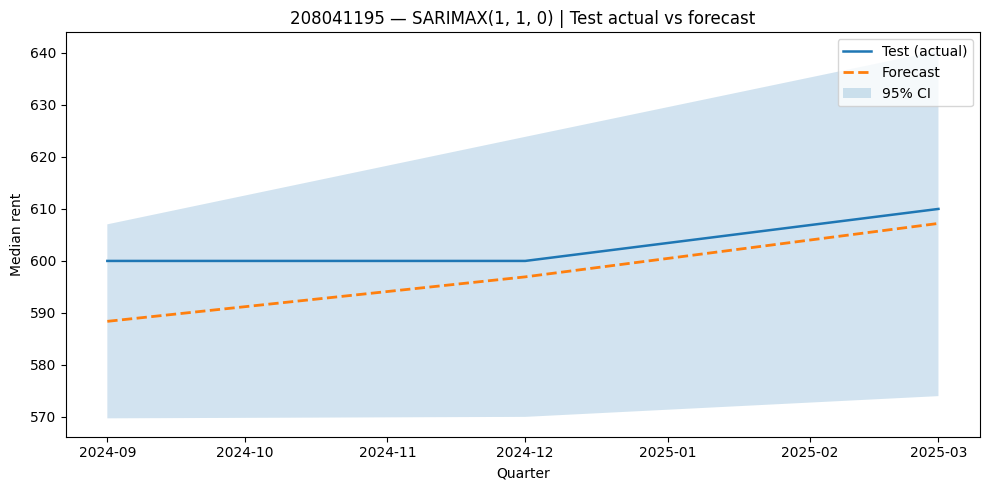

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


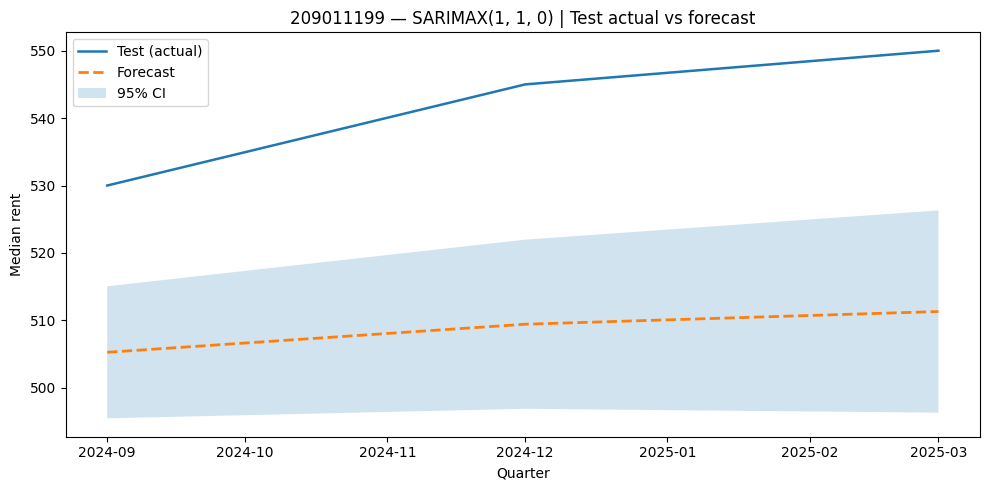

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


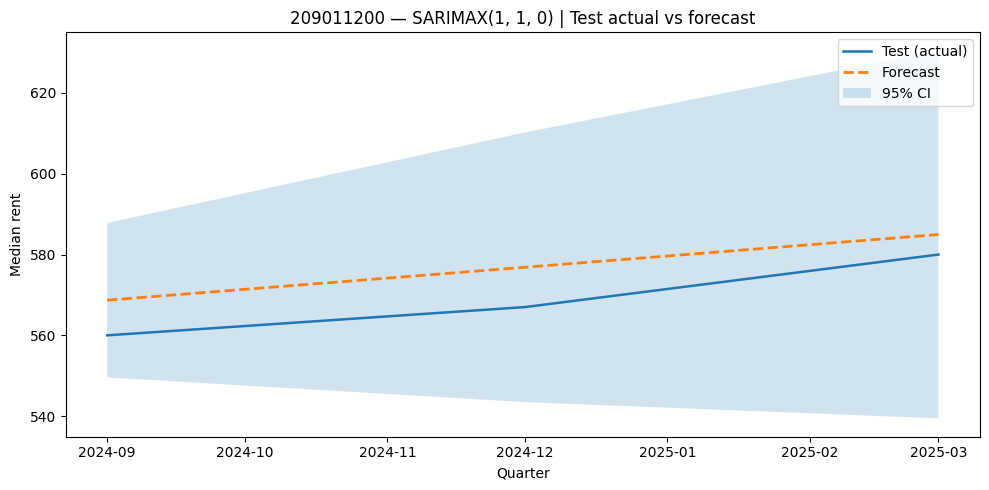

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


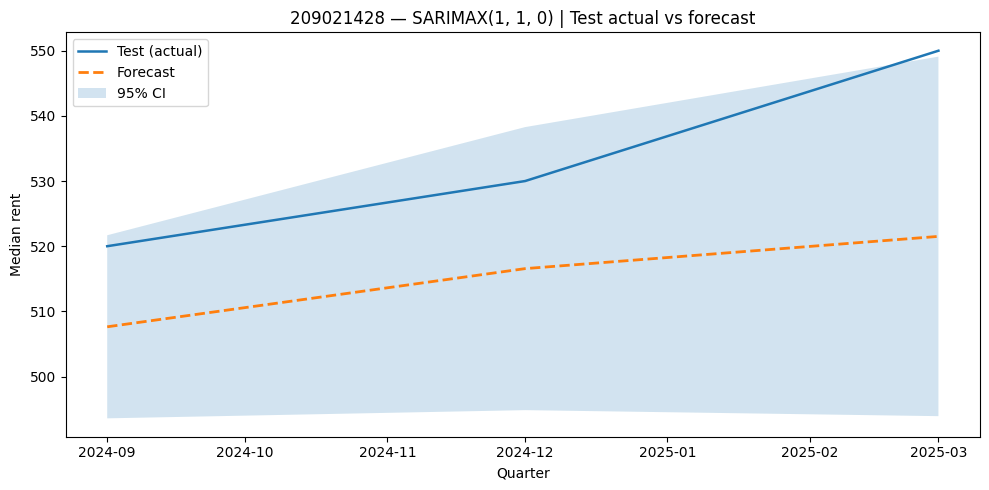

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


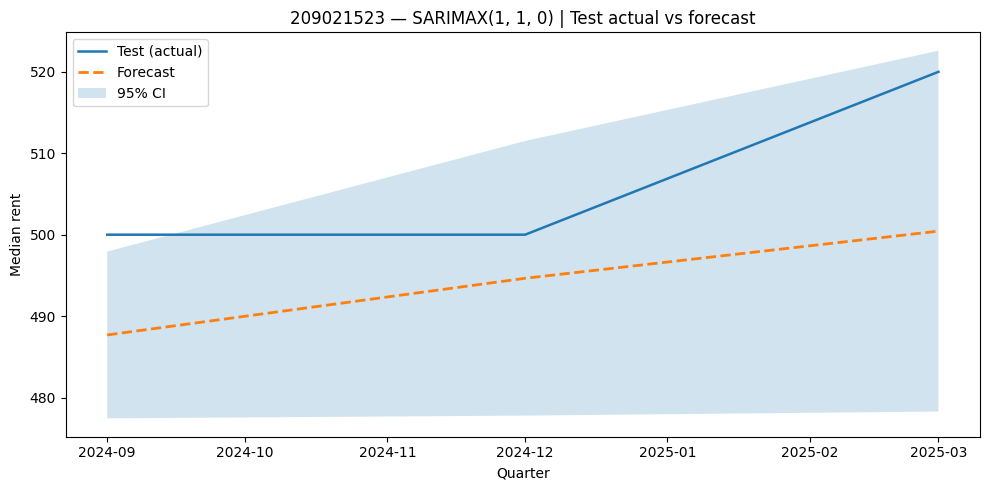

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


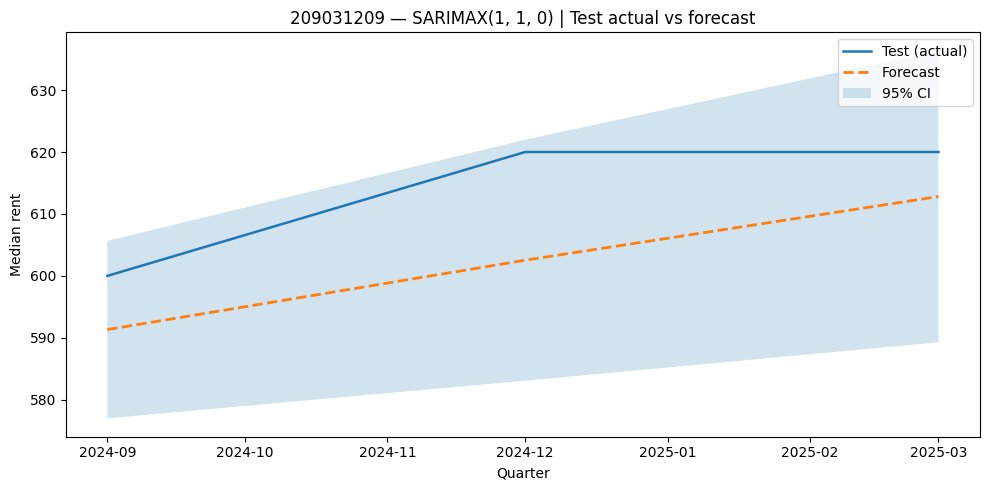

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


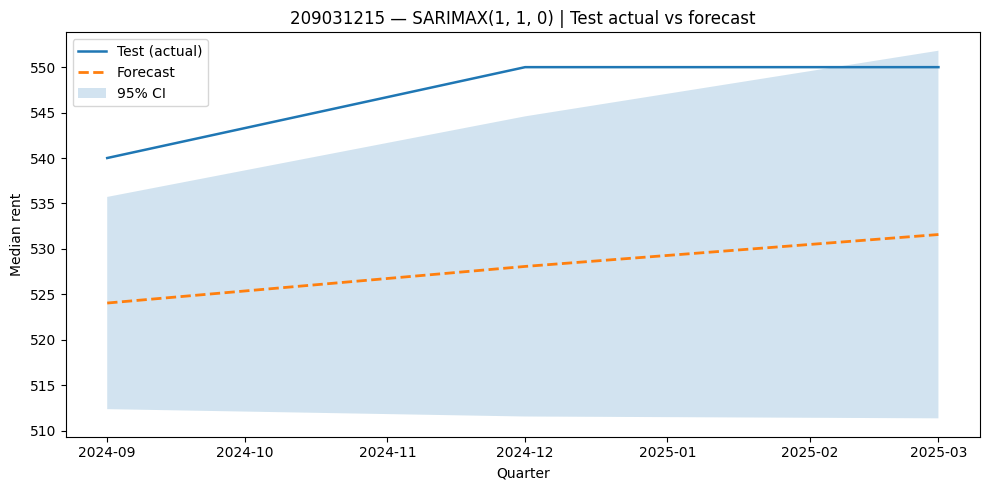

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


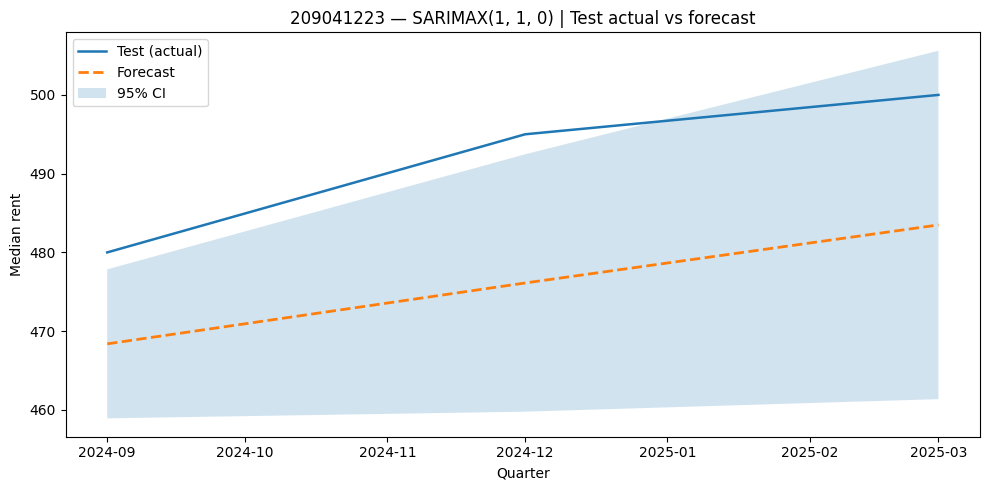

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


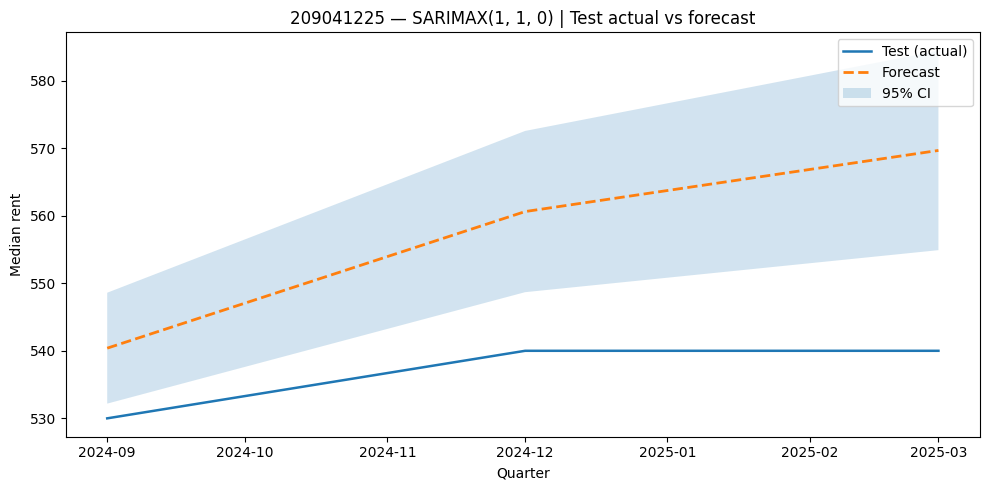

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


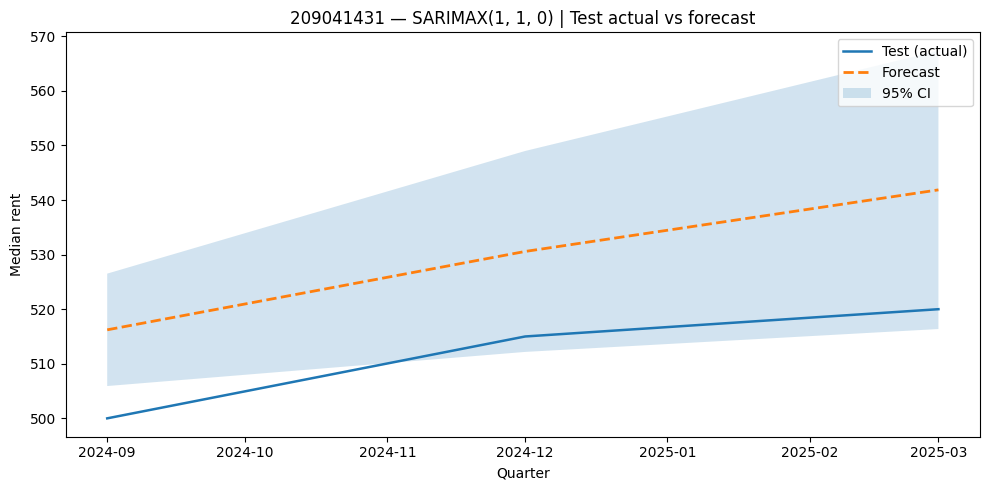

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


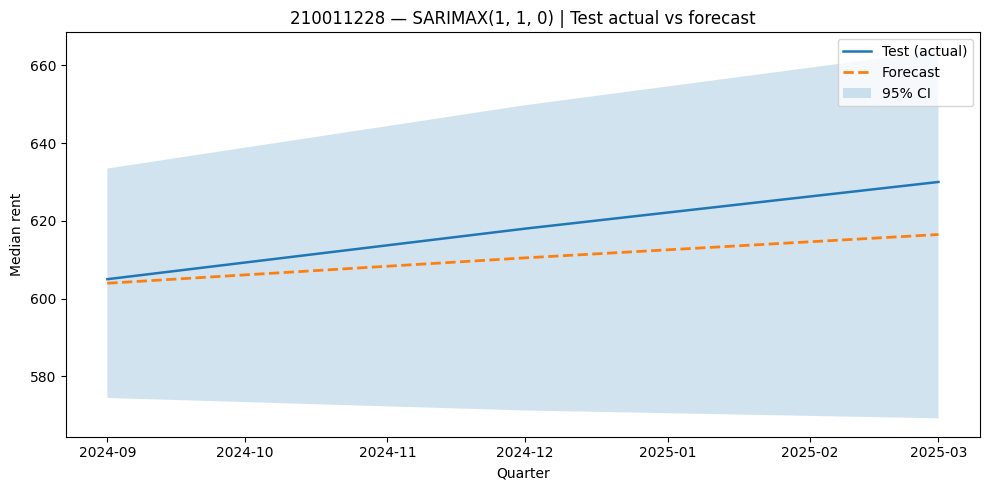

/home/eeamanda/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


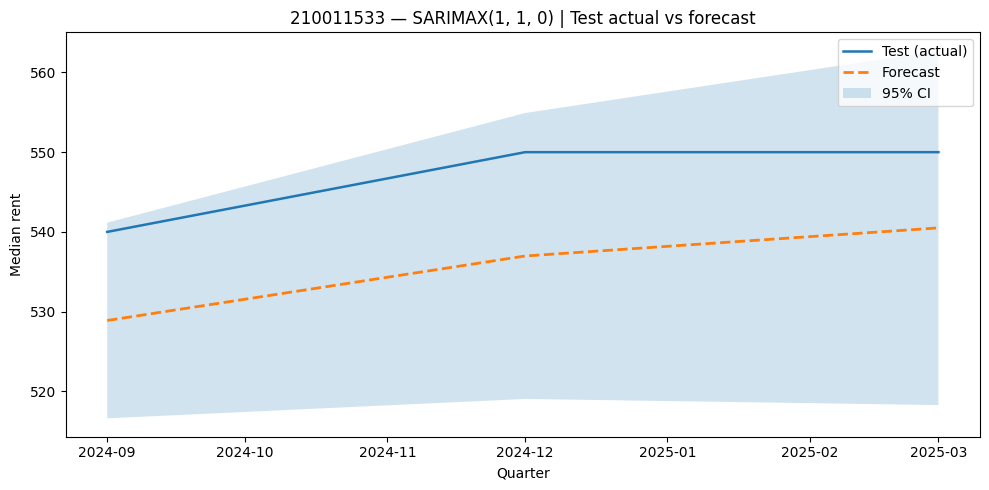

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


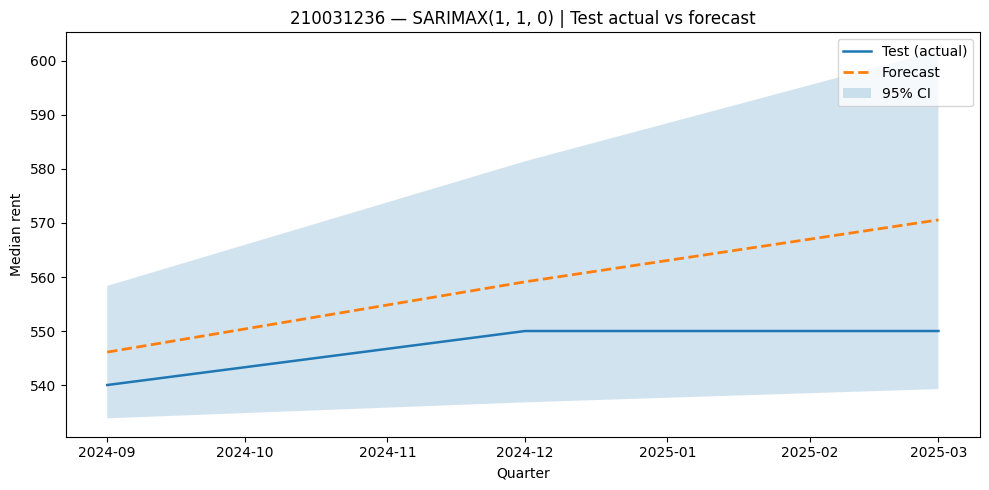

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


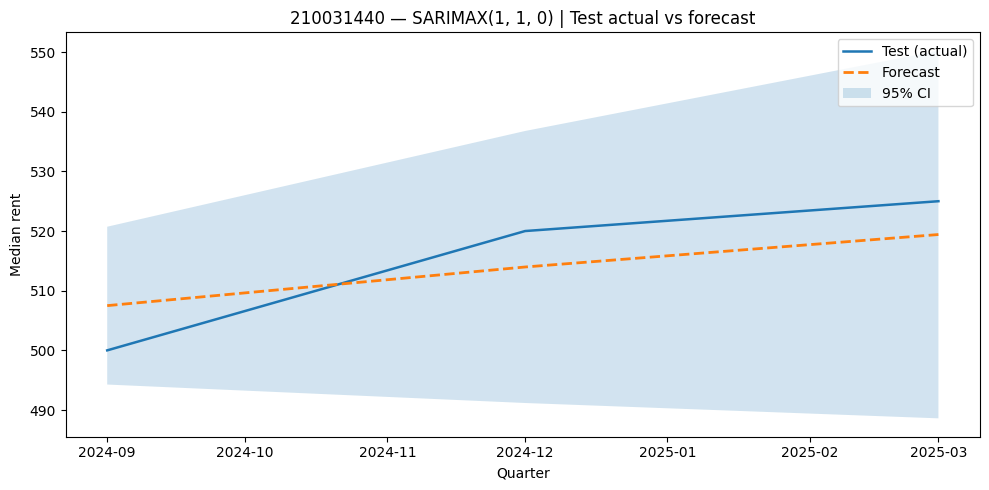

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


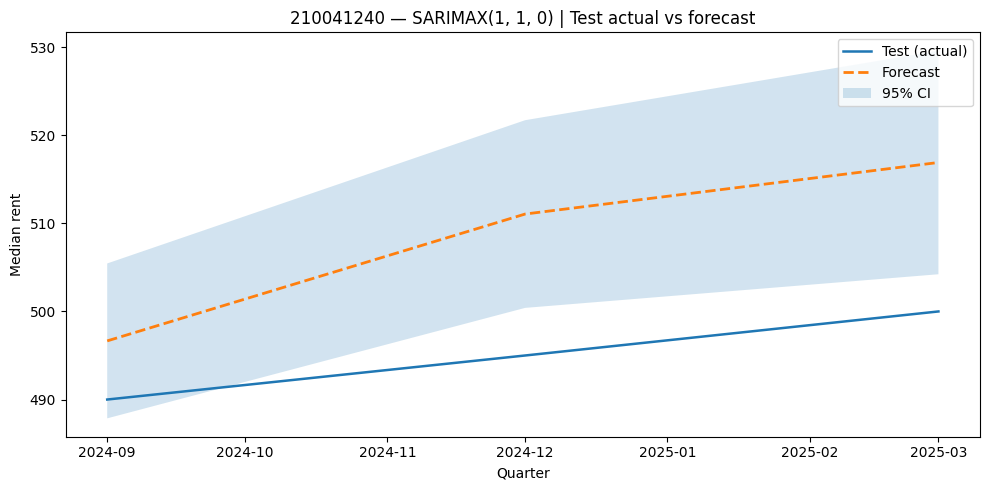

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


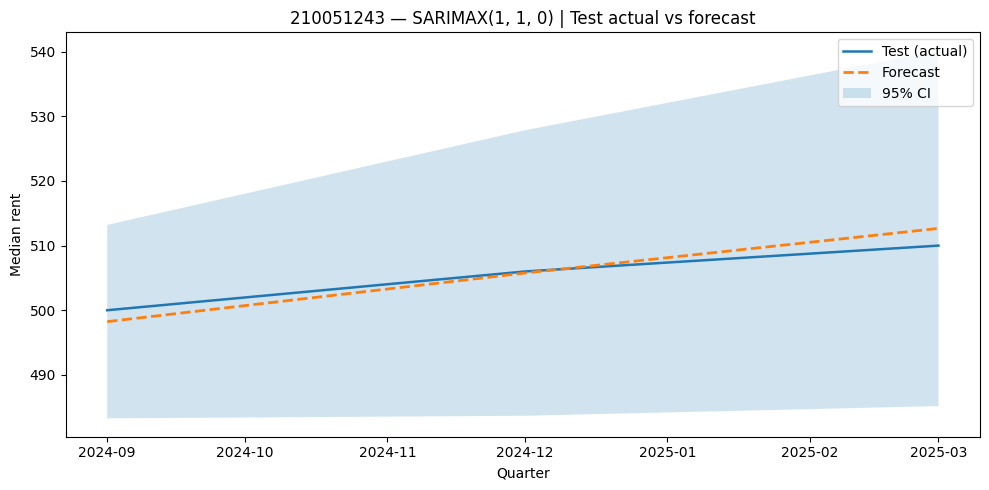

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


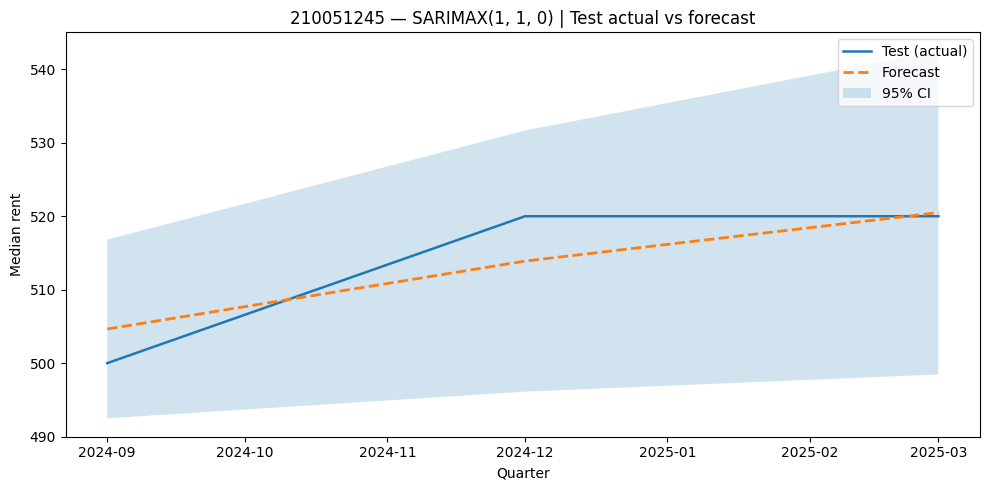

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


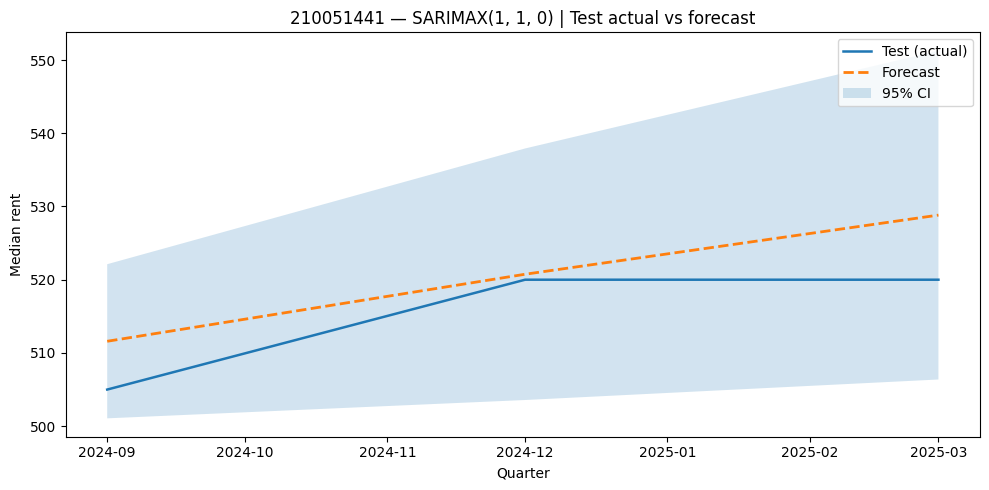

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


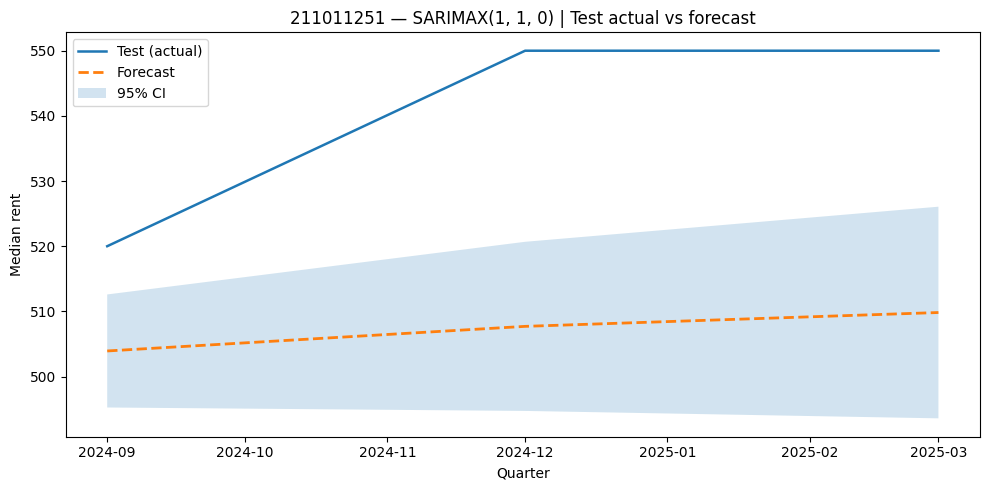

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


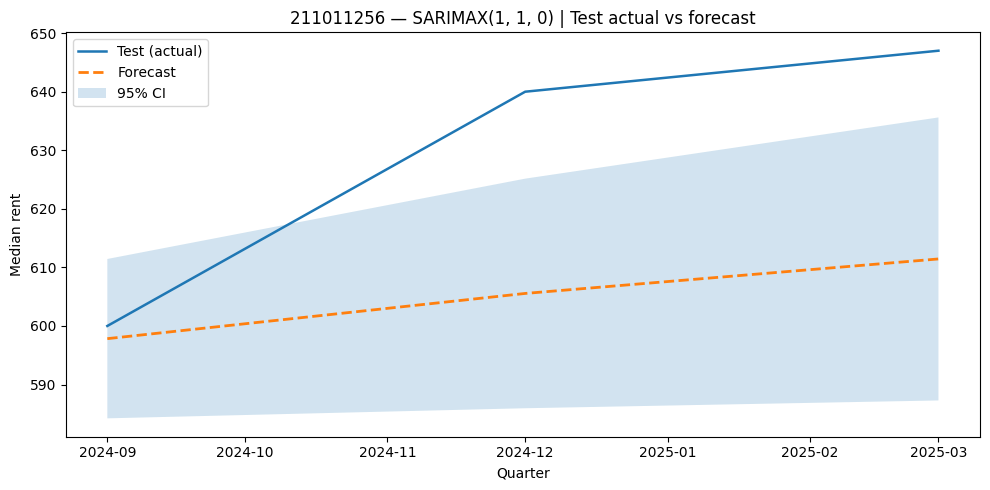

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


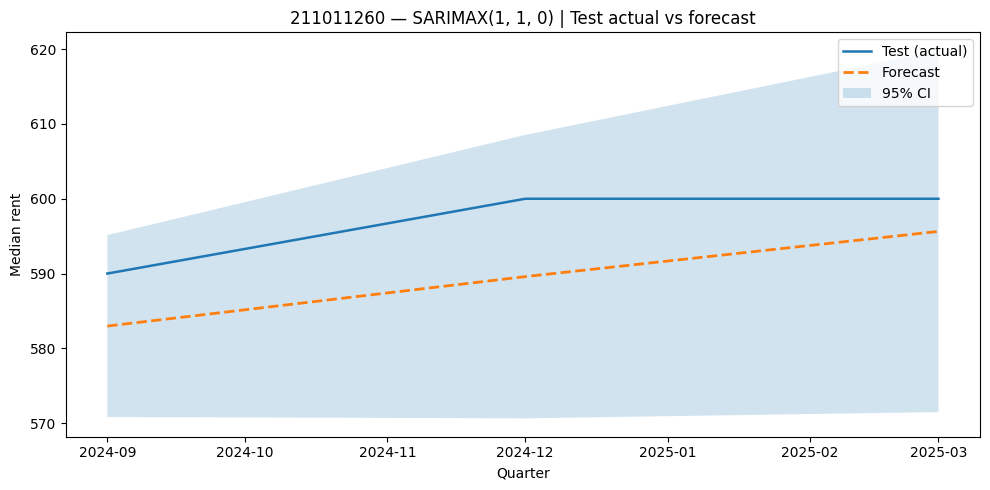

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


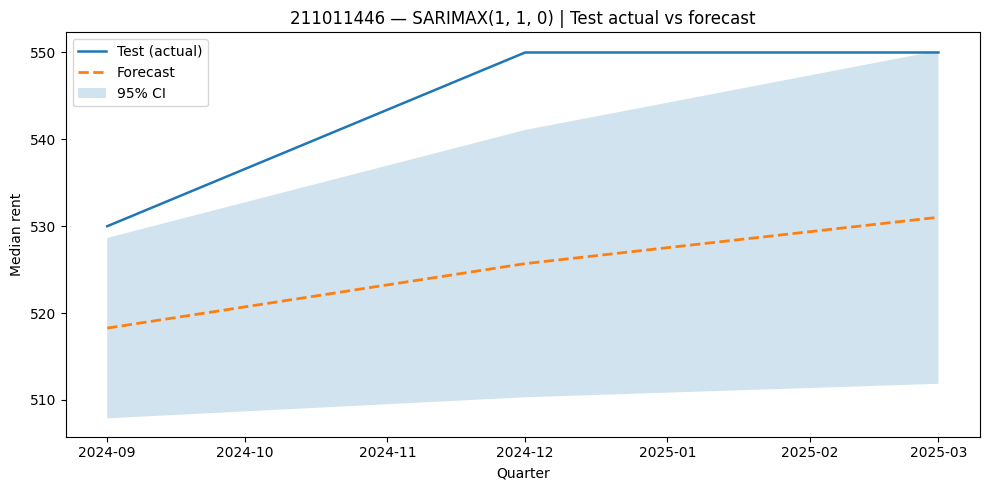

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


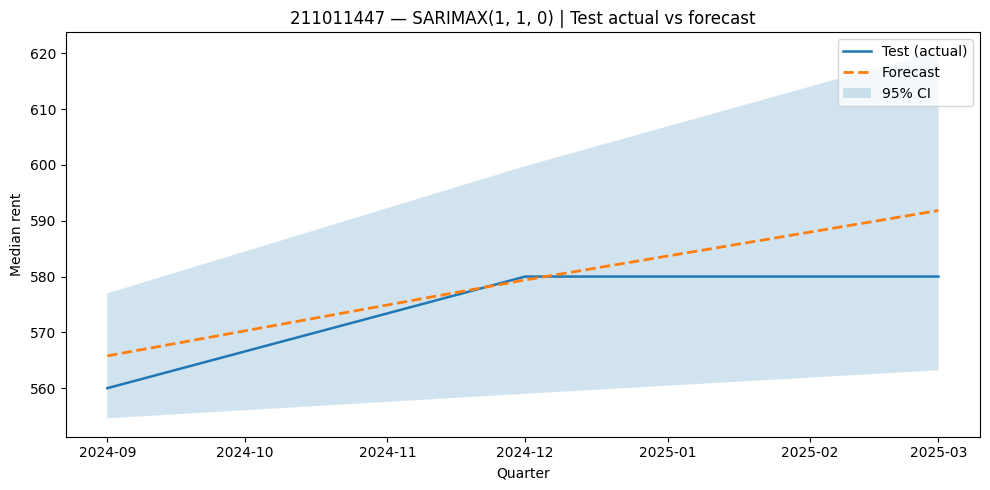

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


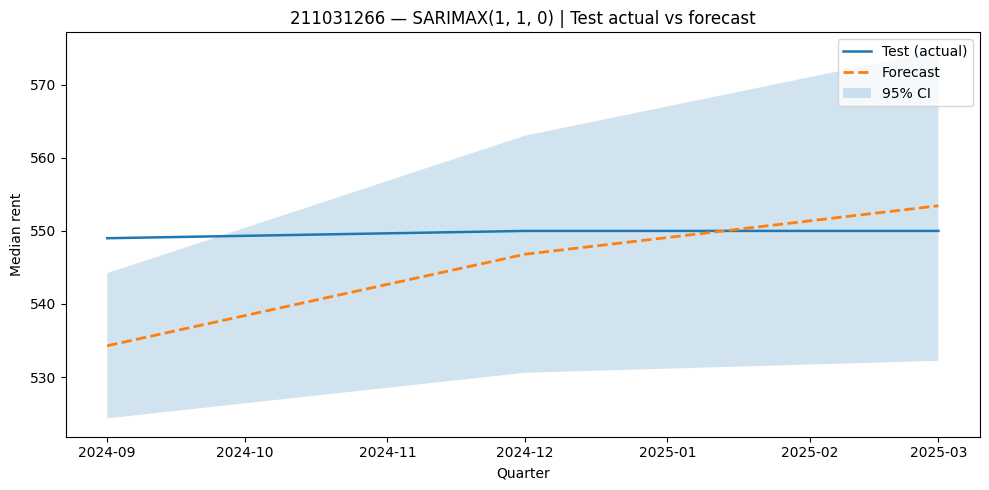

/home/eeamanda/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


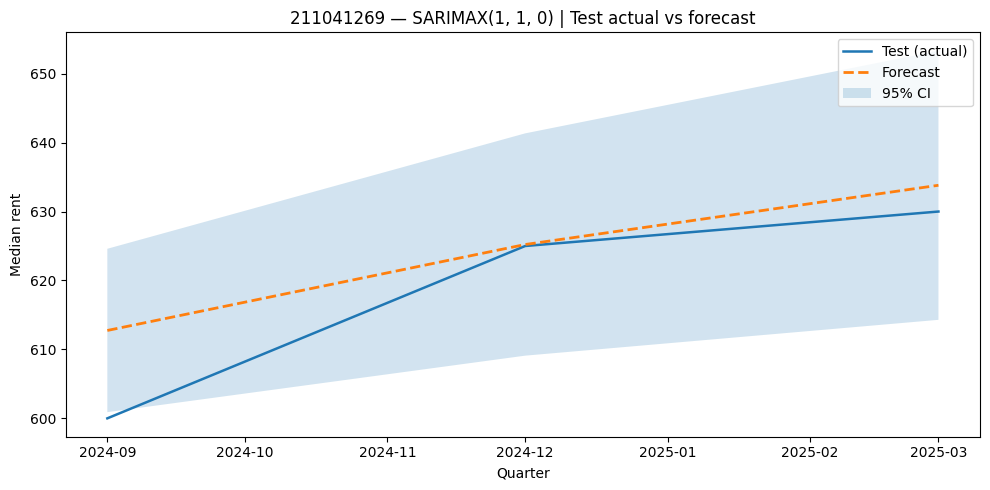

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


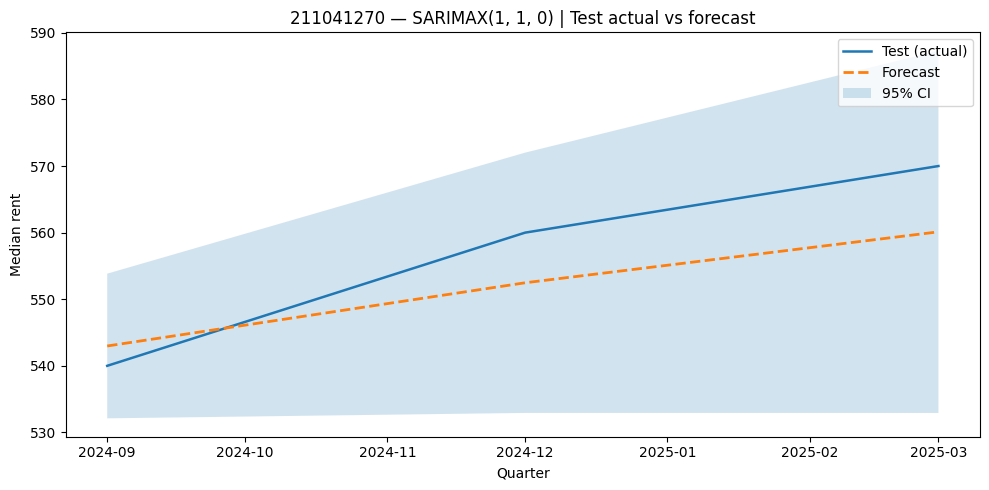

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


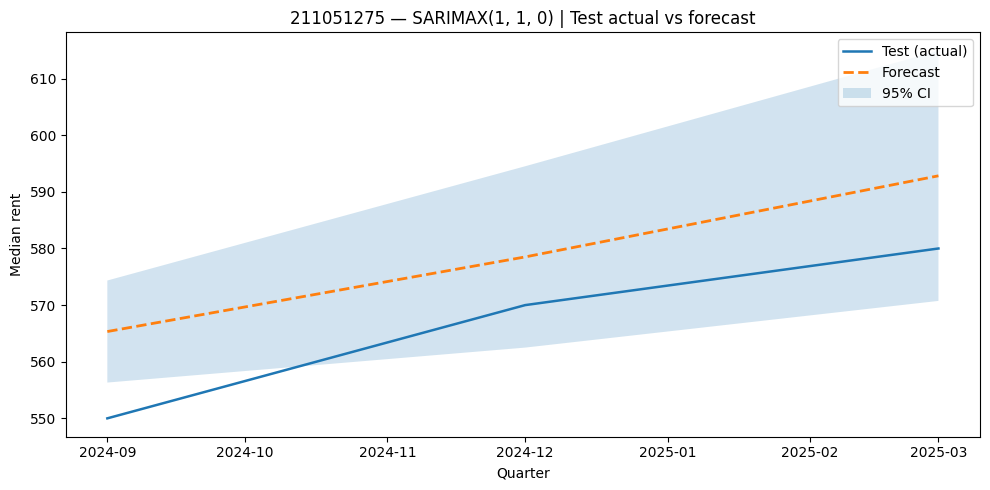

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


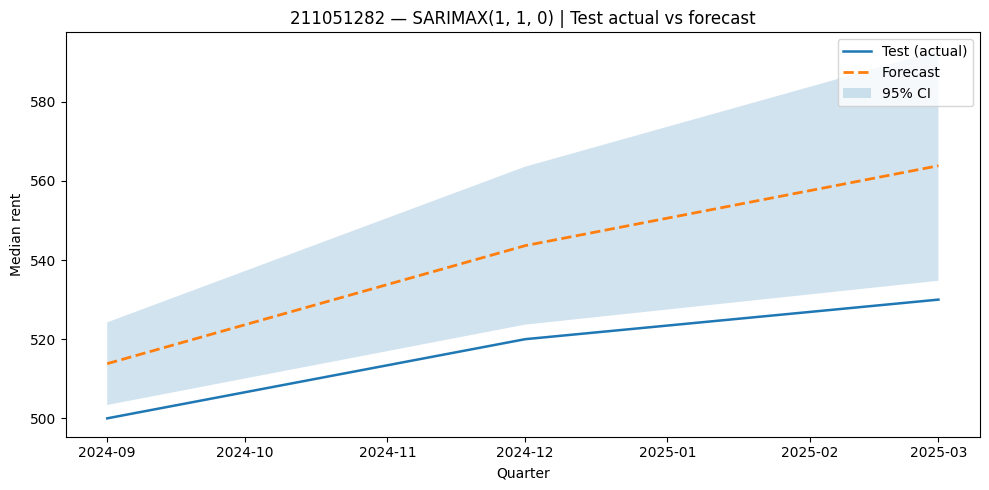

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


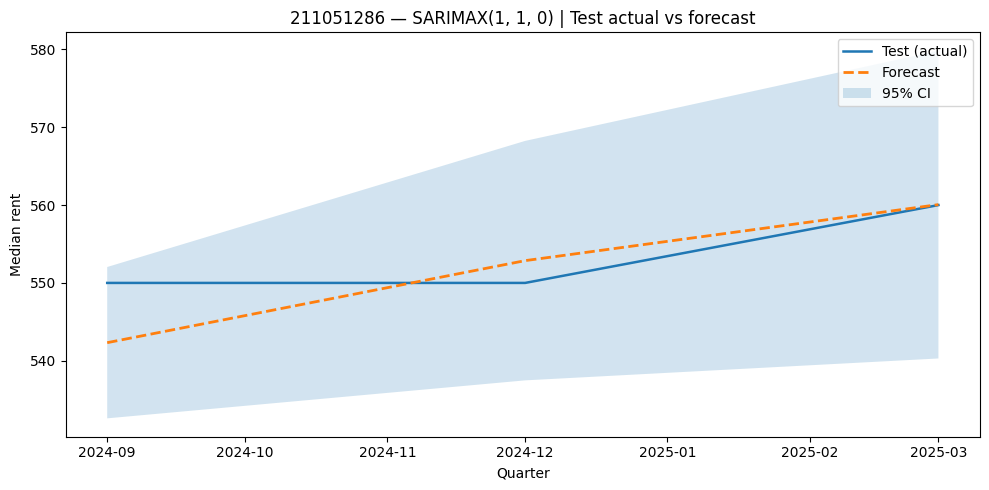

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


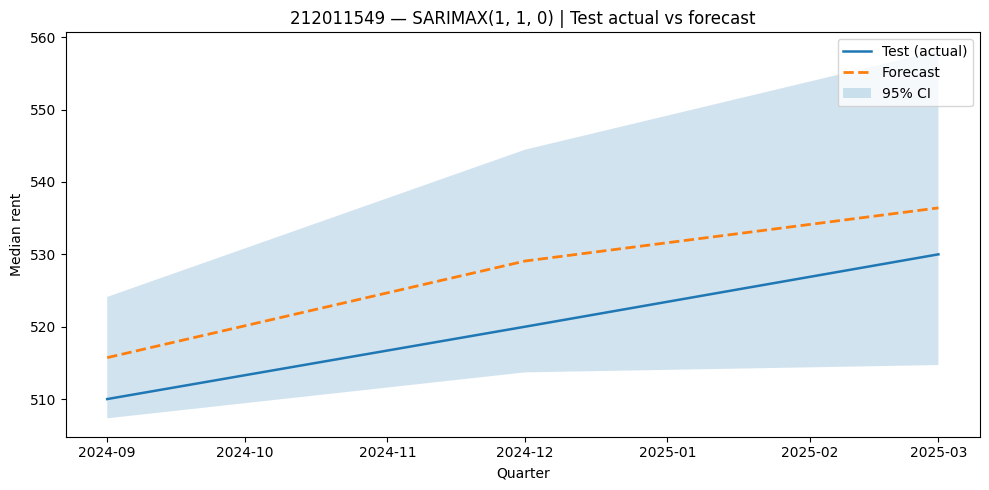

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


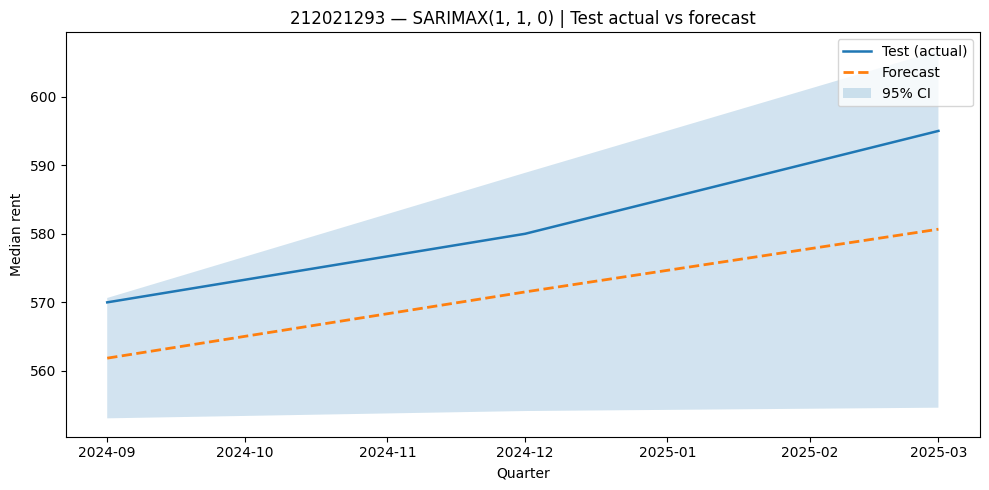

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


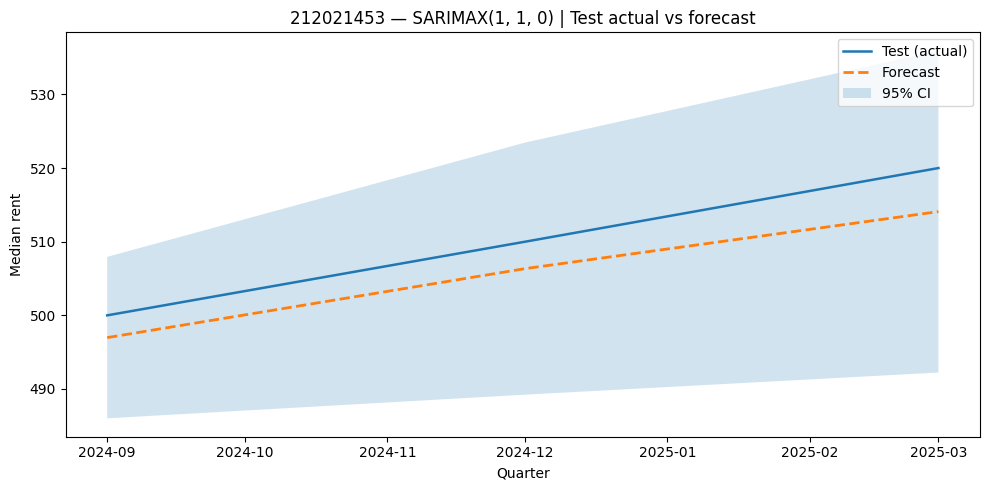

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


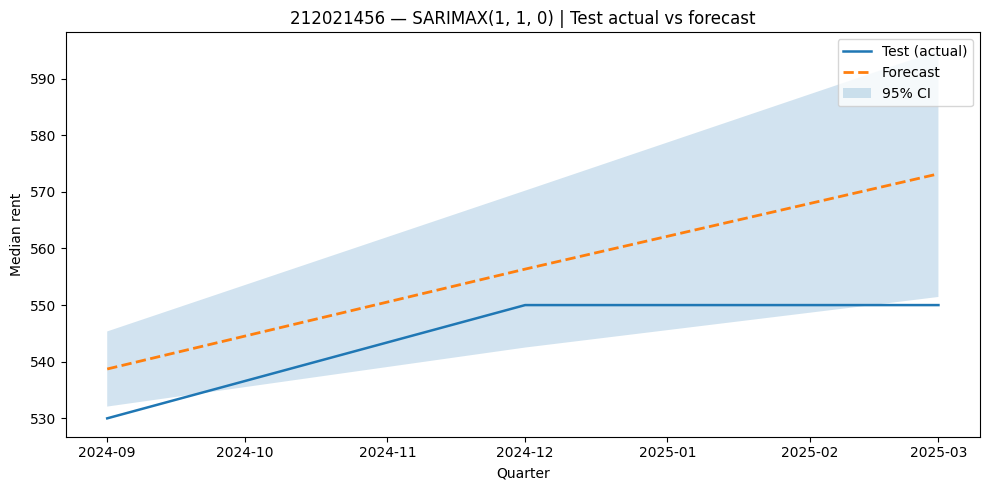

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


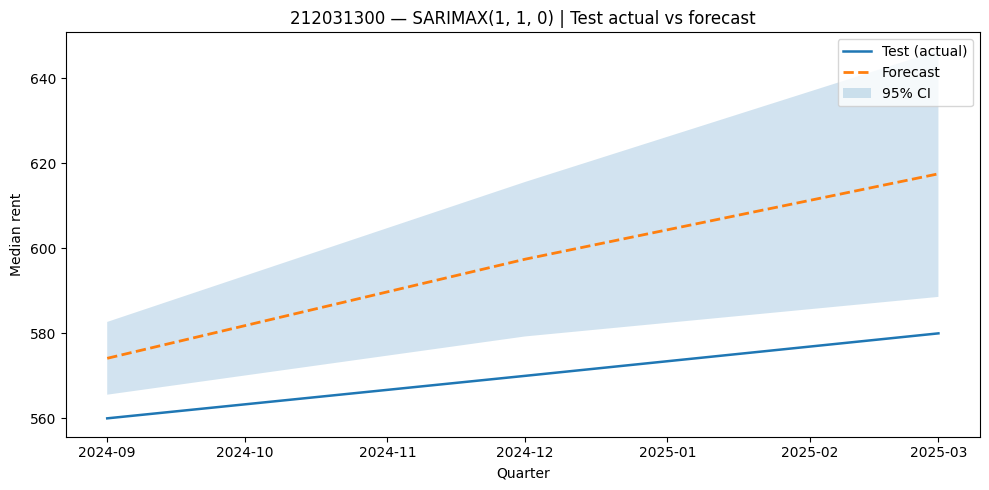

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


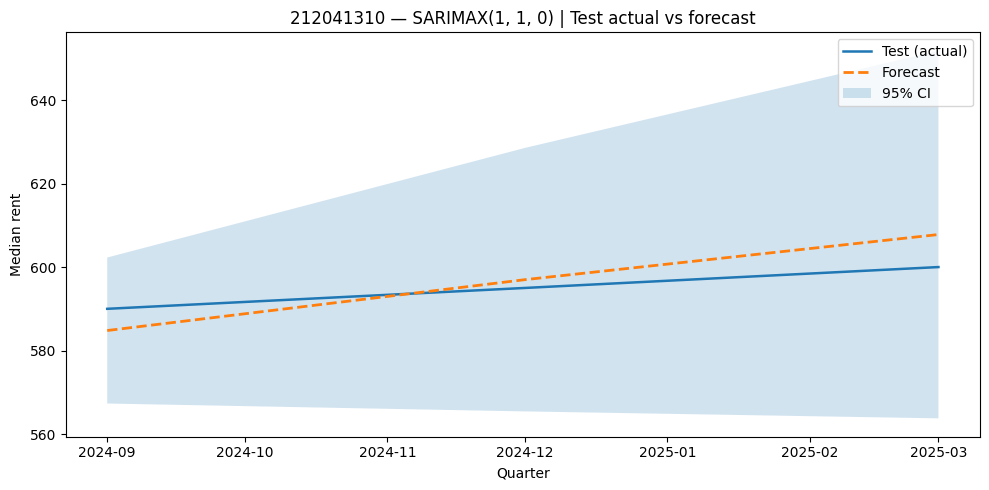

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


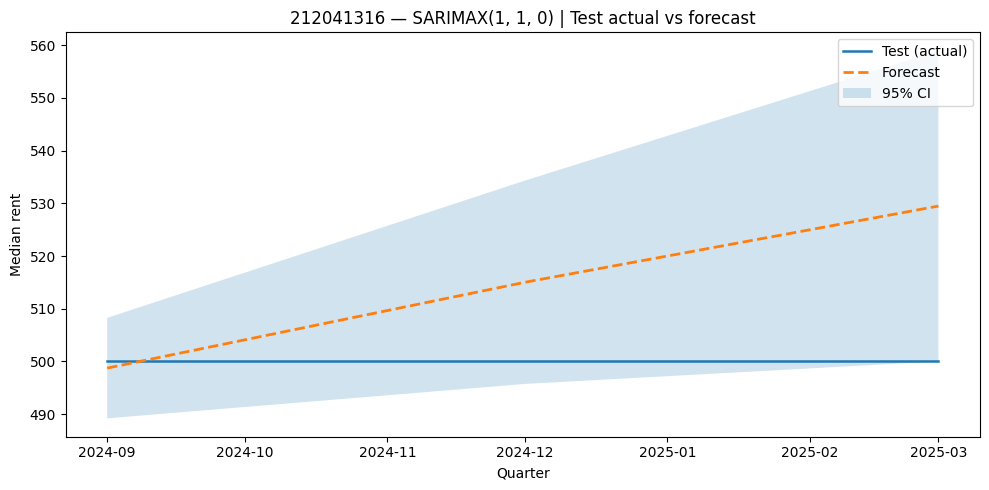

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


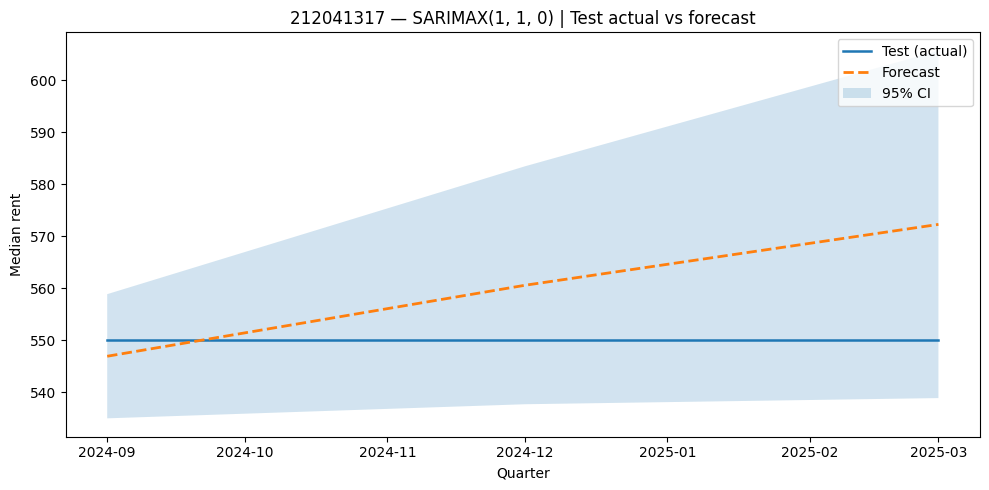

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


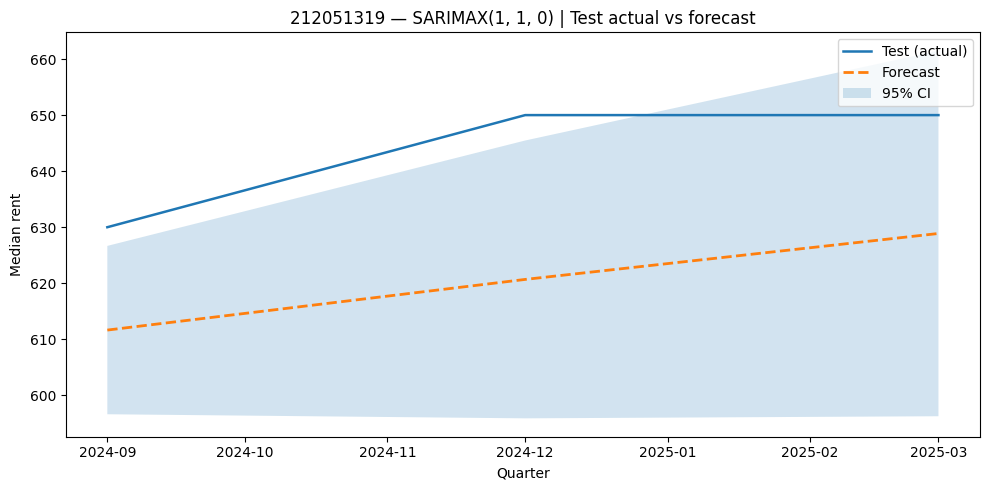

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


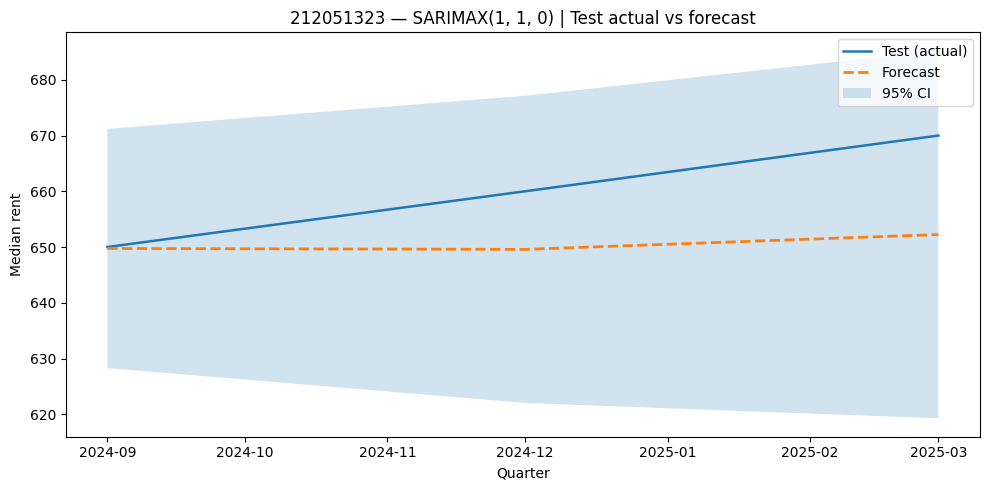

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


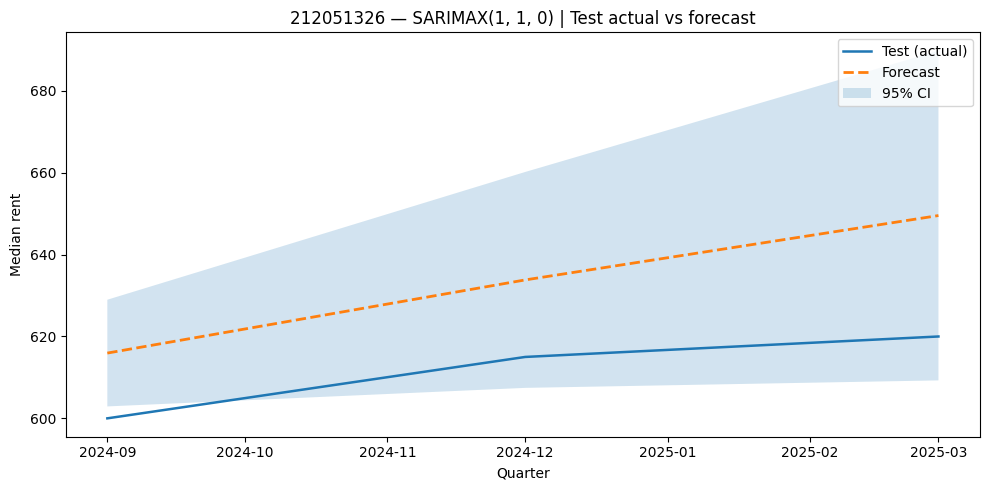

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


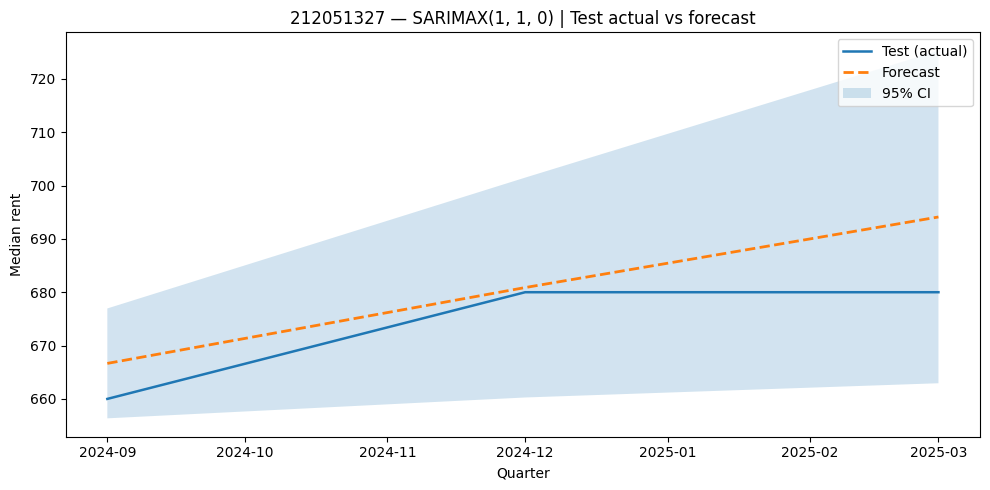

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


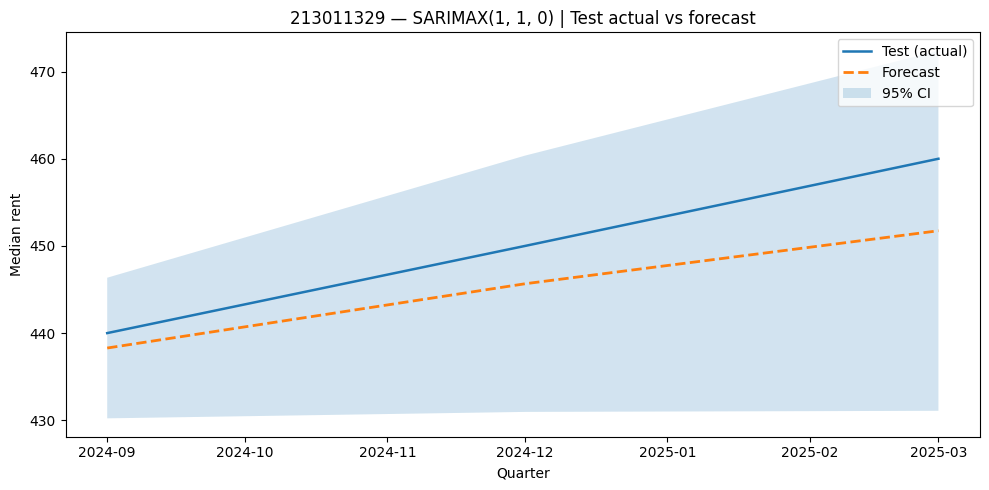

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


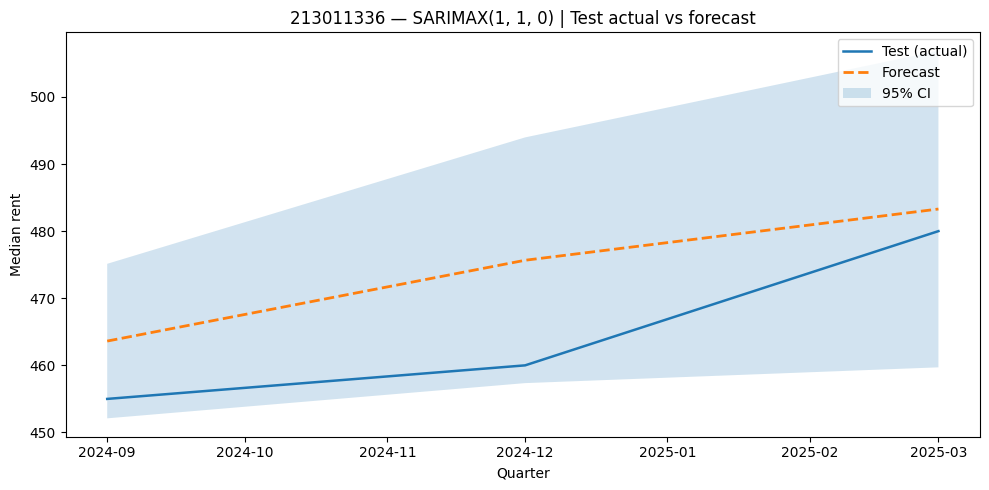

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


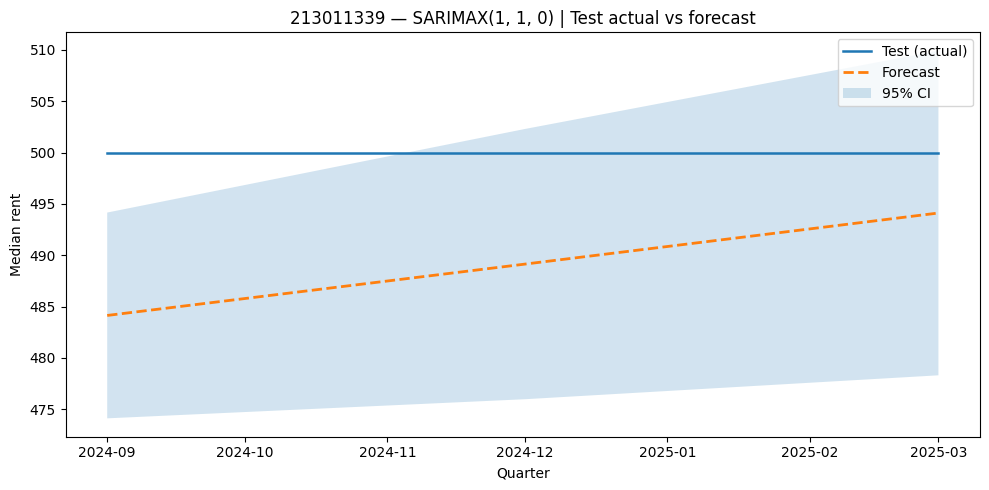

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


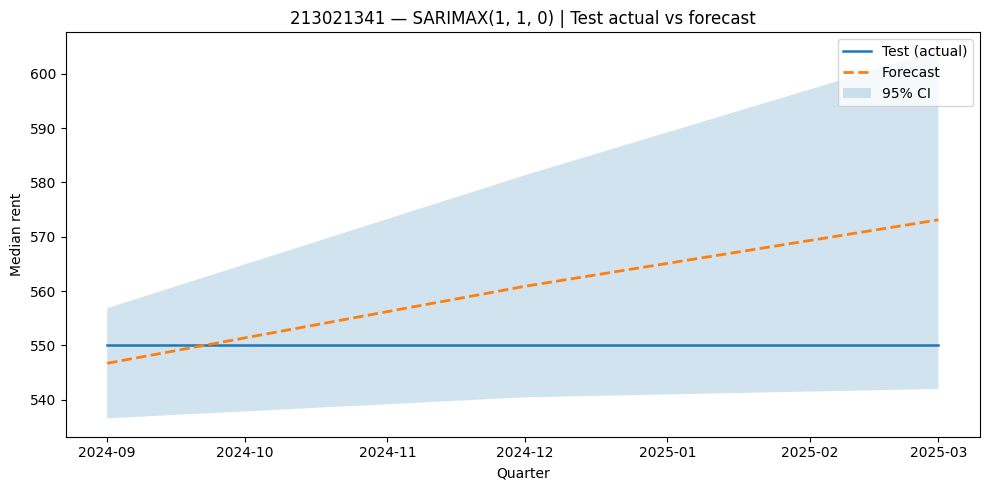

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


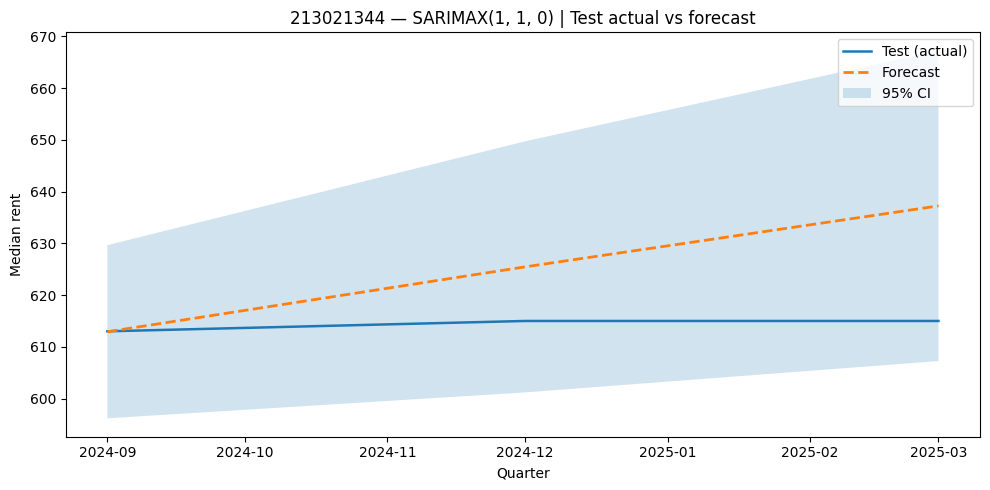

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


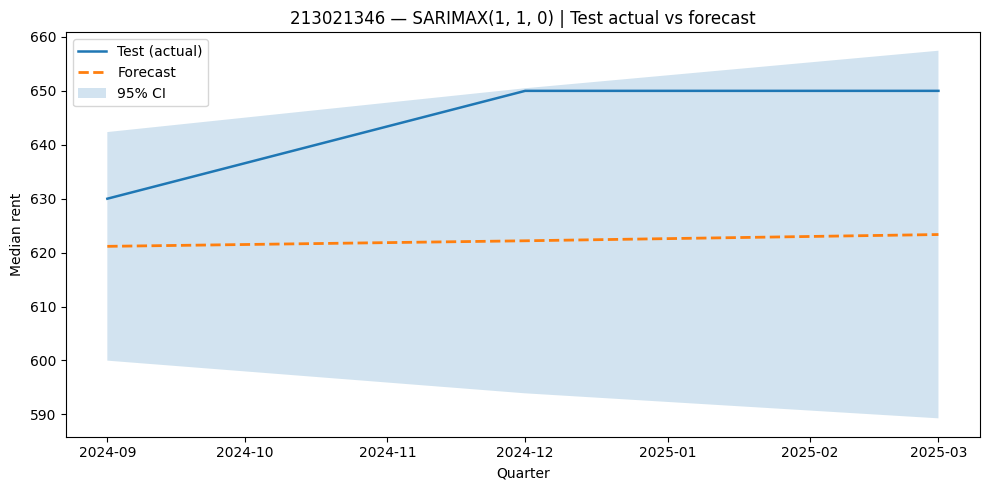

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


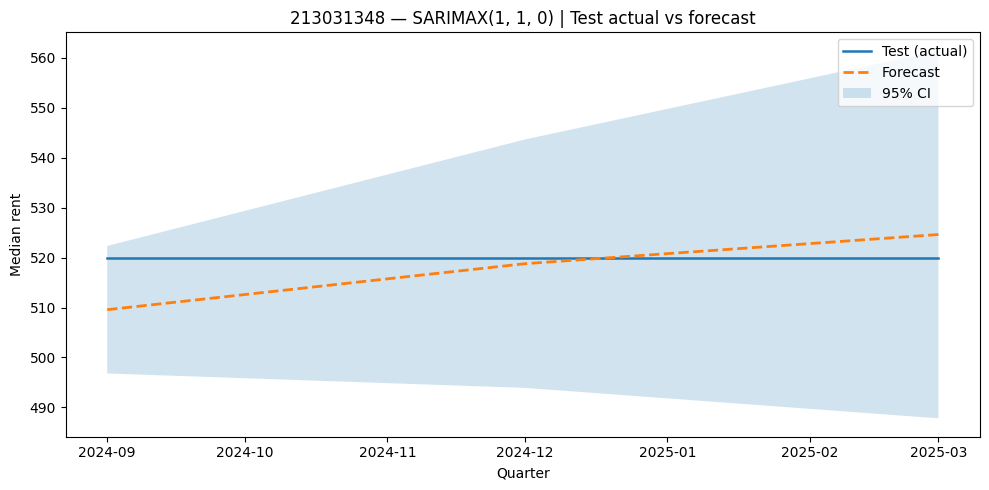

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


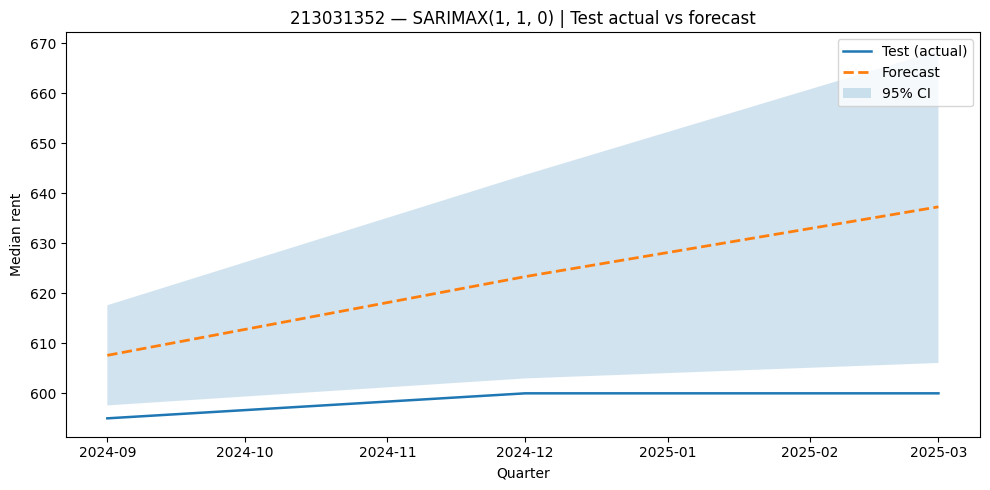

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


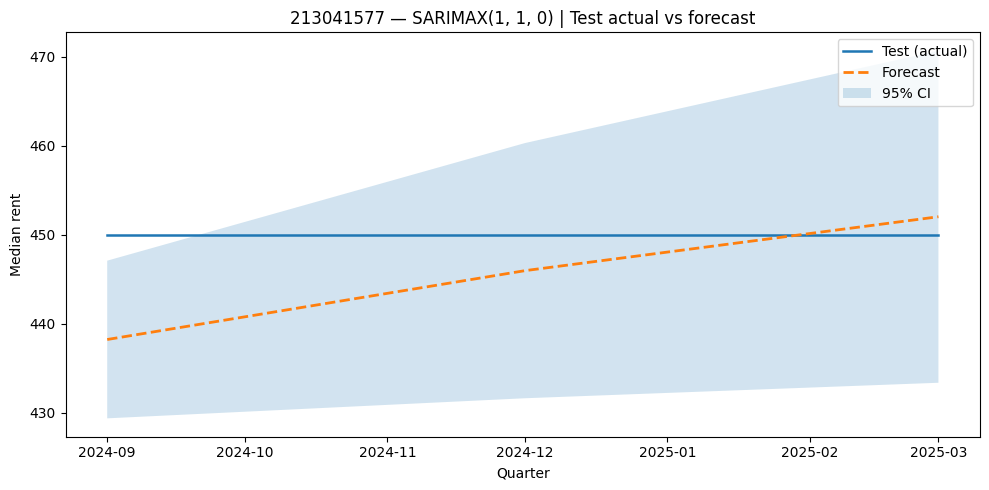

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


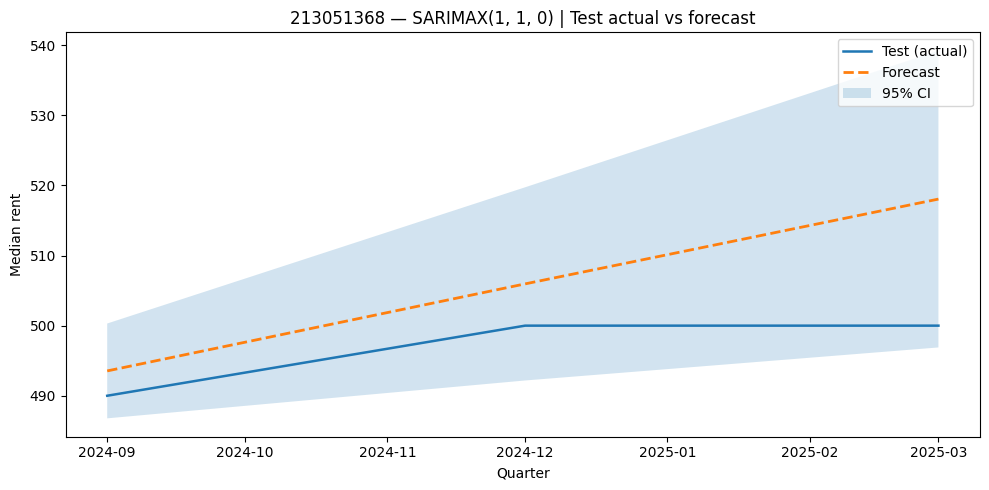

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


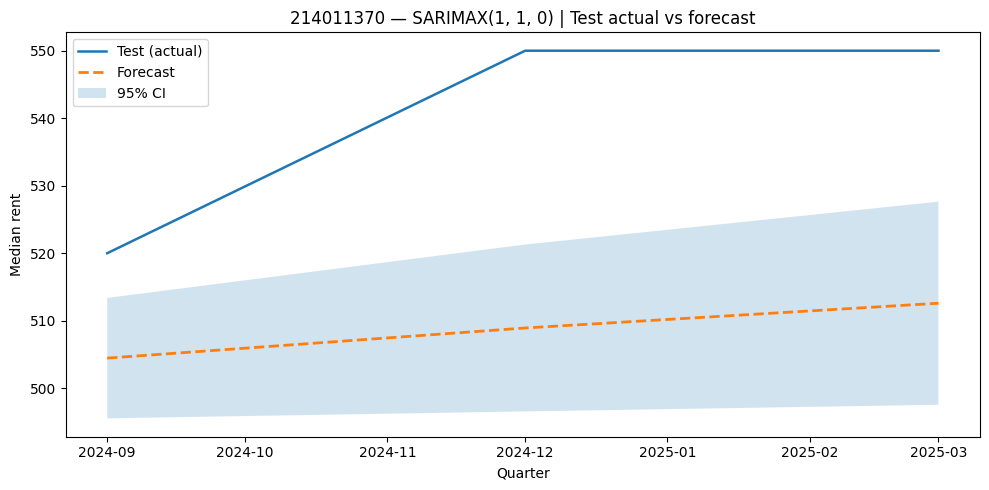

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


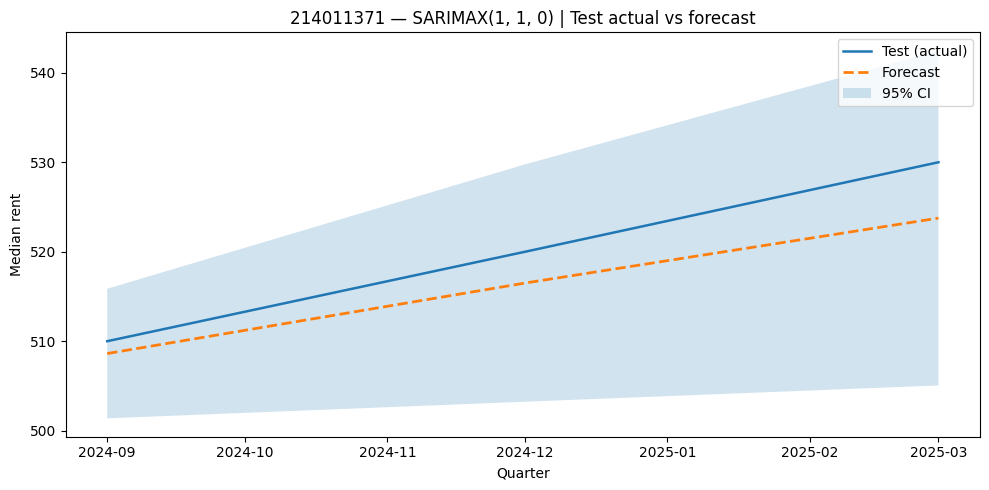

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


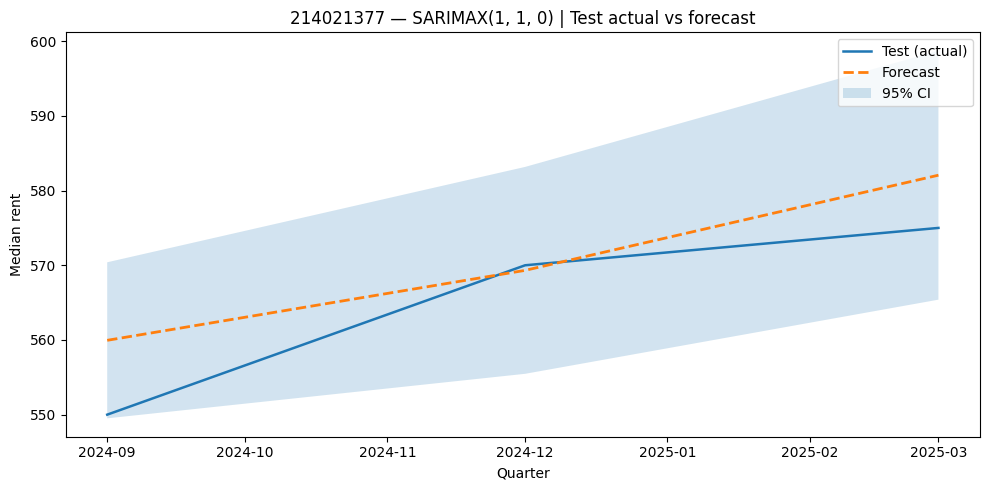

/home/eeamanda/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


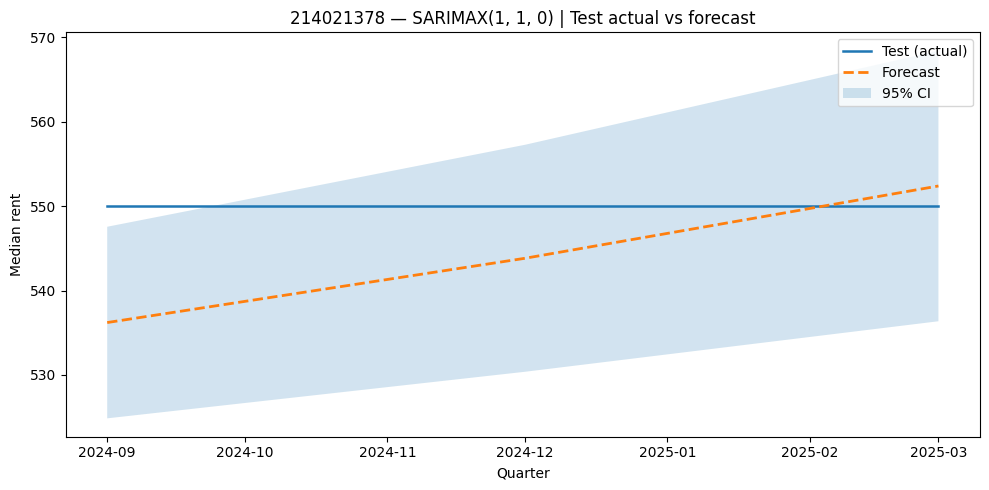

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


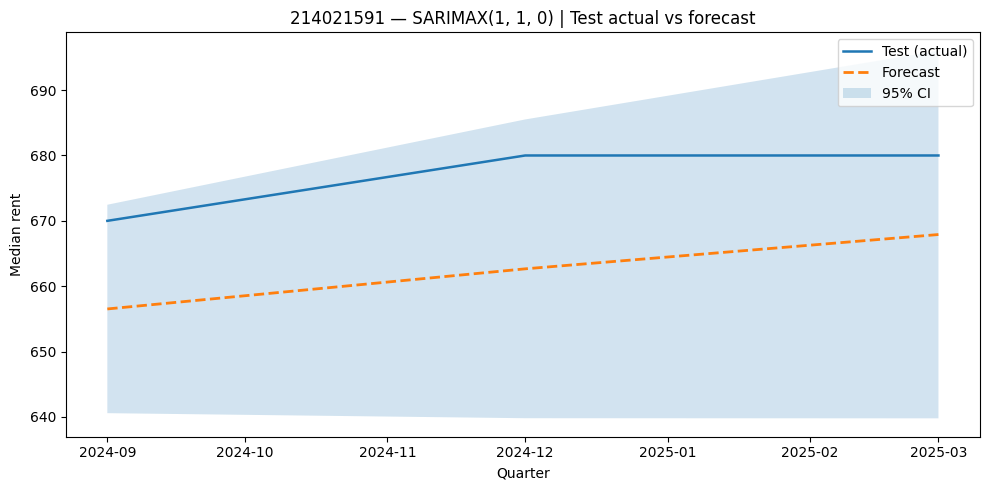

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


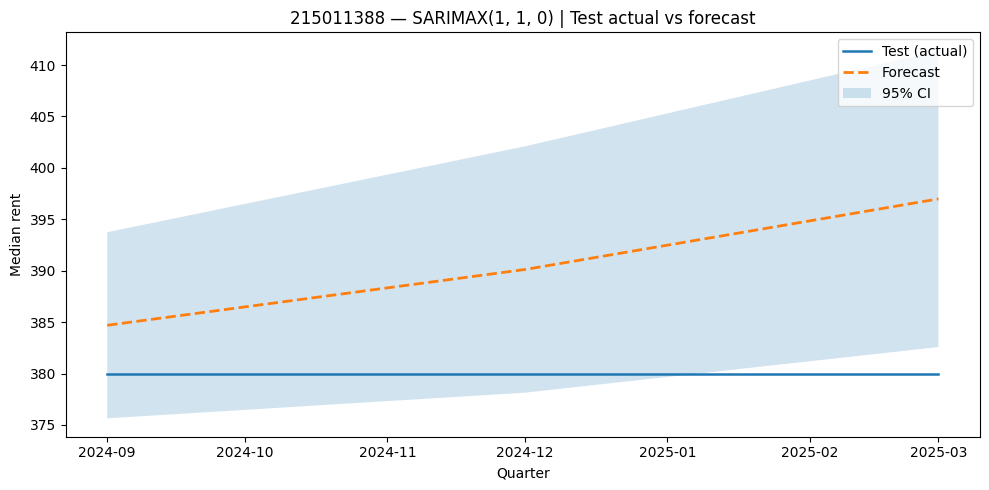

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


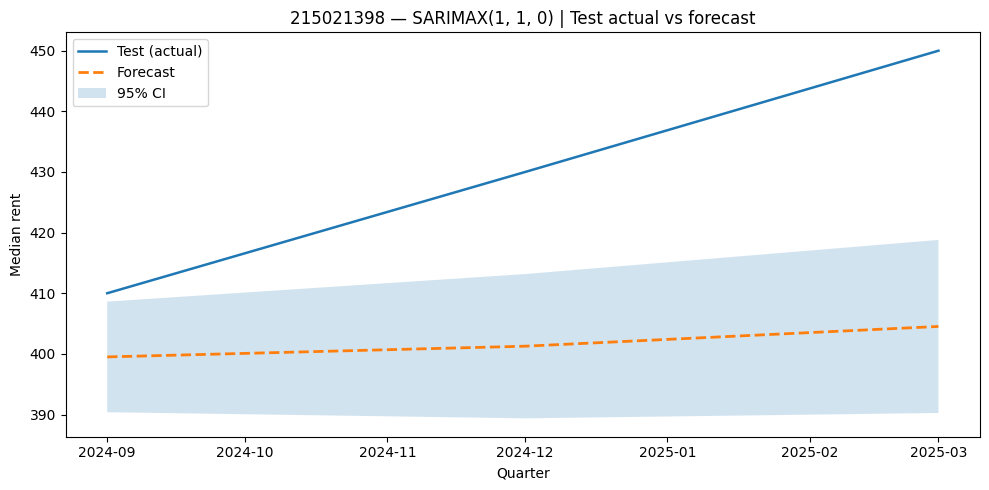

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


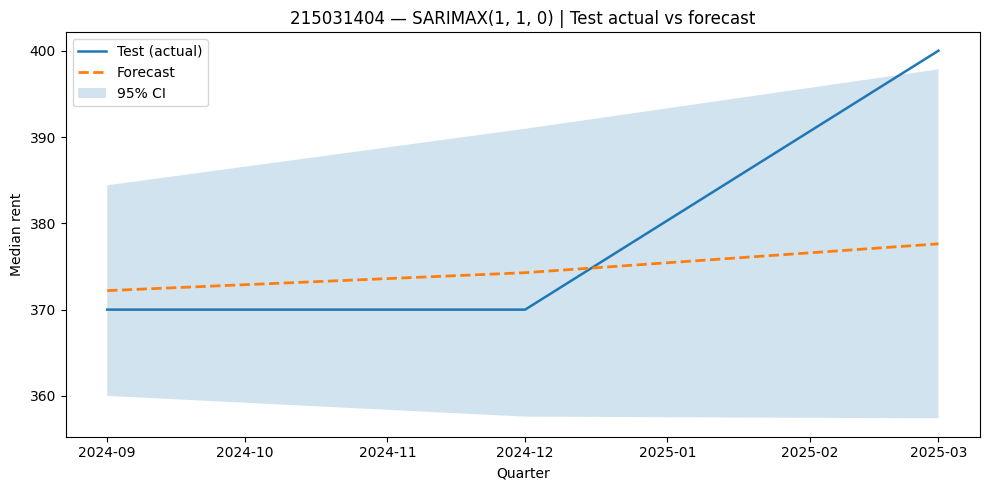

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


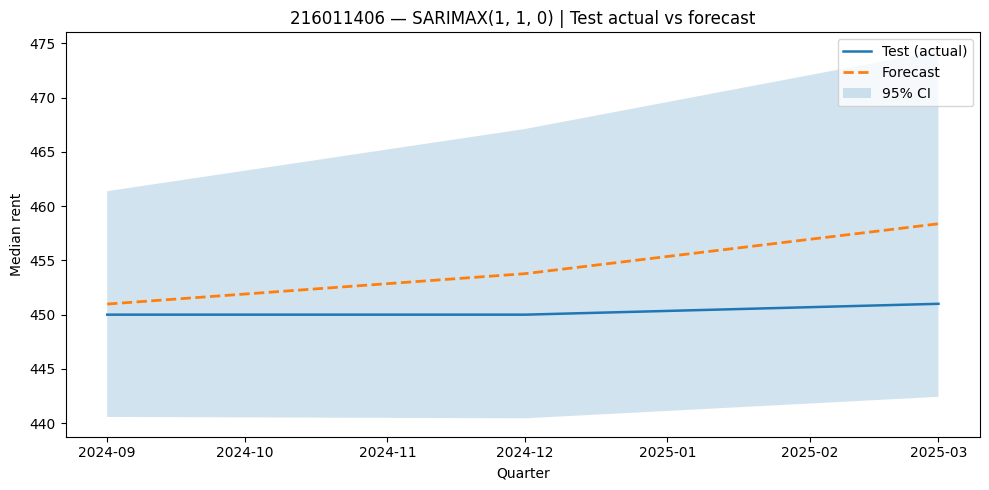

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


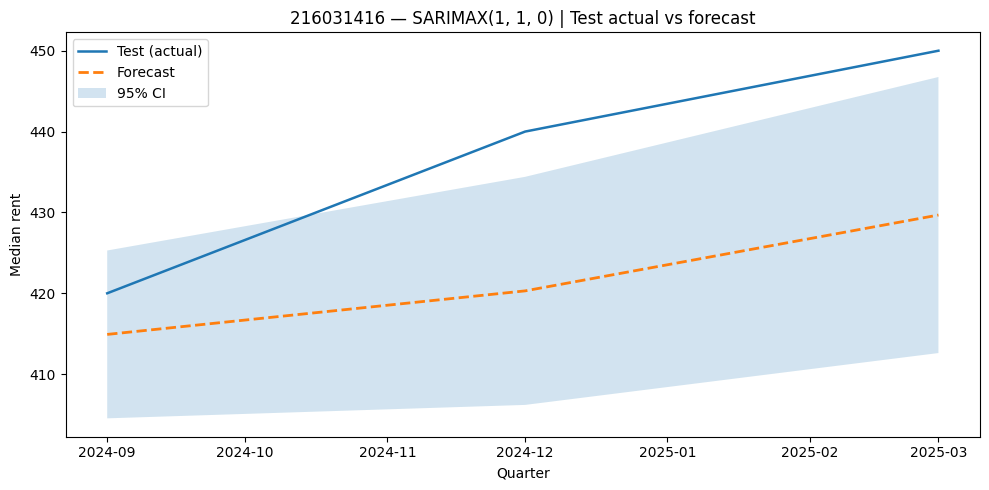

/home/eeamanda/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


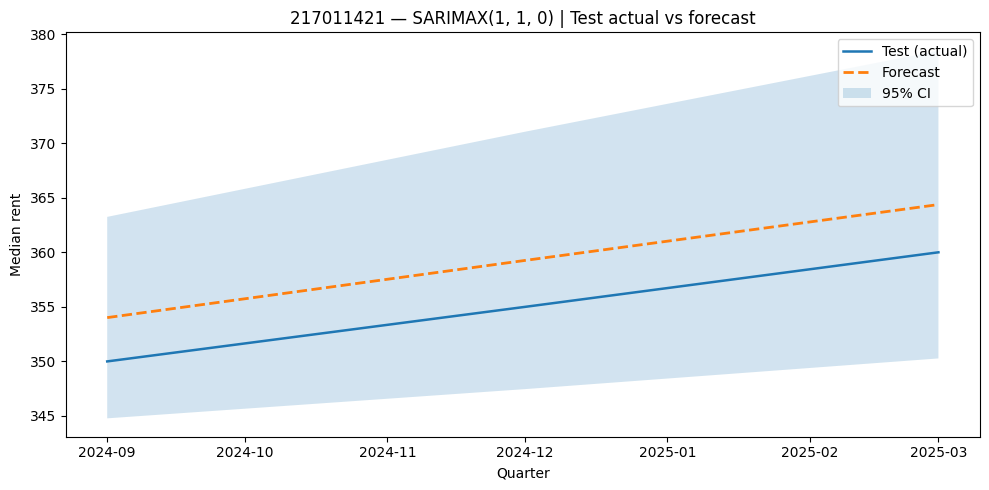

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


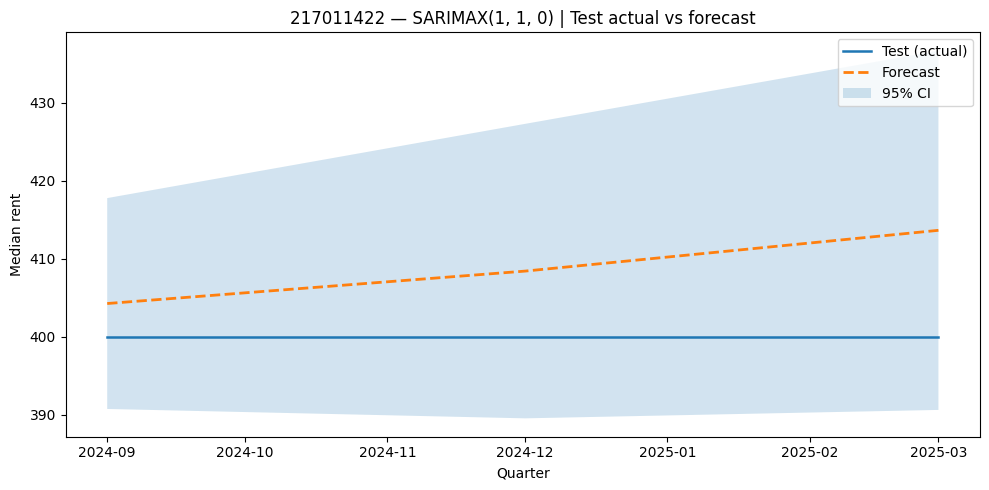

/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/eeamanda/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


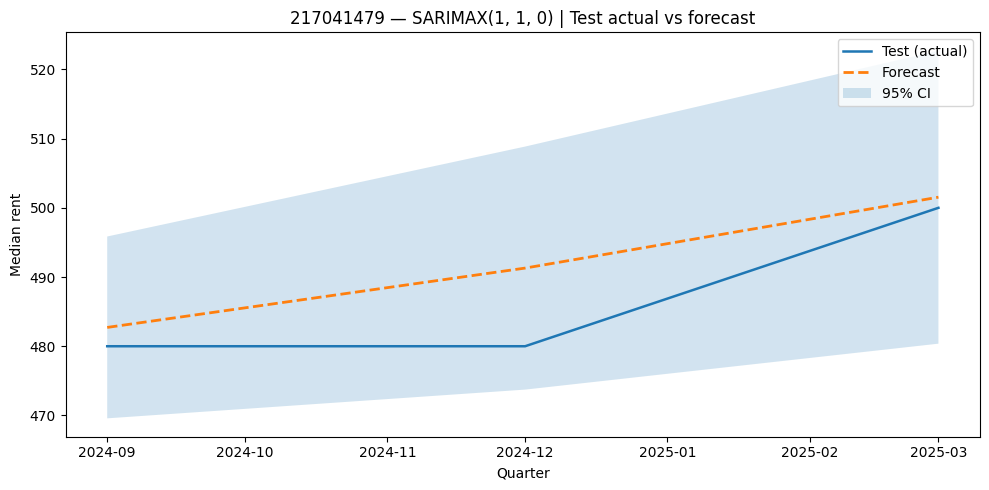


 Averages Across All SA2
Avg Train RMSE: 145.82
Avg Test  RMSE: 13.50
Avg Train R²: -21.188
Avg Test  R²: -10.650

Top 10 SA2 by Test RMSE:
     SA2_CODE21  Train_RMSE  Test_RMSE   Train_R2    Test_R2
52    206071517   75.220710  27.919092  -1.441081  -7.769102
107   212031300  445.502715  28.066467 -84.884369 -10.815899
93    211011256  204.120436  28.609646 -21.670608  -0.909437
131   215021398   57.929831  31.644109  -1.525551  -2.755061
30    206021499  202.042925  31.711721 -34.116275 -10.940237
125   214011370  145.084760  33.308675  -9.971066  -4.547339
75    209011199   62.587365  33.542308  -3.455699 -14.578120
92    211011251  189.833977  34.935845 -23.455311  -5.102566
34    206041118  291.459448  40.232838 -15.718054  -5.070055
62    208011169  290.682209  56.986680 -35.804735 -13.105857


In [ ]:
all_metrics = []   # to store all metrics
all_preds = []     # to store test predictions


# Loop over every SA2_CODE21
for sa2 in sorted(merged_df["SA2_CODE21"].unique()):
    cmp_df, metrics = compare_plot_suburb_test(
        merged_df,
        SA2_CODE21=sa2,
        split_date="2024-09-01",
        exog_cols=("ERP_quarterly","Income_quarterly_med"),
        order=(1,1,0)
    )

    # attach SA2_CODE21 name and metrics
    metrics["SA2_CODE21"] = sa2
    all_metrics.append(metrics)

    #Store predictions if not empty
    if not cmp_df.empty:
        all_preds.append(cmp_df)

# combine all SA2_CODE21 metrics into one DataFrame
metrics_df = pd.DataFrame(all_metrics)

# combine all predictions
preds_df_sarimax = pd.concat(all_preds, ignore_index=True) if all_preds else pd.DataFrame()

# Print overall averages
print("\n Averages Across All SA2")
print(f"Avg Train RMSE: {metrics_df['Train_RMSE'].mean():.2f}")
print(f"Avg Test  RMSE: {metrics_df['Test_RMSE'].mean():.2f}")
print(f"Avg Train R²: {metrics_df['Train_R2'].mean():.3f}")
print(f"Avg Test  R²: {metrics_df['Test_R2'].mean():.3f}")

# Show top 10 SA2 with best test RMSE
print("\nTop 10 SA2 by Test RMSE:")
print(metrics_df.sort_values("Test_RMSE", ascending=True).tail(10)[
    ["SA2_CODE21", "Train_RMSE", "Test_RMSE", "Train_R2", "Test_R2"]
])

In [ ]:
#RMSE of Brighton which is the worst is 56.986680
rmse = 56.986680
mean_price = merged_df["Median"].mean()  

relative_rmse = (rmse / mean_price) * 100
print(f"Relative RMSE Brighton: {relative_rmse:.2f}%")

#RMSE of Broadmeadows-Roxburgh Park which is the worst is 56.986680
rmse = 1.847763 
mean_price = merged_df["Median"].mean()  

relative_rmse = (rmse / mean_price) * 100
print(f"Relative RMSE Broadmeadows: {relative_rmse:.2f}%")


Relative RMSE Brighton: 12.93%
Relative RMSE Broadmeadows: 0.42%


In [101]:
preds_df_sarimax

SA2_CODE21       date  Actual   Predicted      Error   AbsError  PctError
0     201011002 2024-09-01     390  391.850070   1.850070   1.850070  0.004744
1     201011002 2024-12-01     395  396.536433   1.536433   1.536433  0.003890
2     201011002 2025-03-01     395  400.258114   5.258114   5.258114  0.013312
3     201011005 2024-09-01     400  395.922184  -4.077816   4.077816 -0.010195
4     201011005 2024-12-01     410  398.871576 -11.128424  11.128424 -0.027142
..          ...        ...     ...         ...        ...        ...       ...
409   217011422 2024-12-01     400  408.398588   8.398588   8.398588  0.020996
410   217011422 2025-03-01     400  413.623113  13.623113  13.623113  0.034058
411   217041479 2024-09-01     480  482.719600   2.719600   2.719600  0.005666
412   217041479 2024-12-01     480  491.293074  11.293074  11.293074  0.023527
413   217041479 2025-03-01     500  501.535501   1.535501   1.535501  0.003071

[414 rows x 7 columns]

In [102]:
preds_df_sarimax.to_csv("preds_price_Sarimax.csv",index=False)

# Retrain all and Predict future price

In [103]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from tqdm import tqdm

def forecast_future_medians(
    merged_df,
    prediction_df,
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    order=(1,1,0),
    start_future="2025-06-01",
    end_future="2030-12-01",
):
    """
    For each SA2_CODE21:
      1. Fit SARIMAX on full history (merged_df)
      2. Forecast medians for 2025-06 → 2030-12 using exogenous values from prediction_df
    Returns a single DataFrame with predicted medians.
    """

    start_future = pd.Timestamp(start_future)
    end_future   = pd.Timestamp(end_future)

    all_forecasts = []

    for SA2_CODE21 in tqdm(merged_df["SA2_CODE21"].unique(), desc="Forecasting future medians"):
        # Historical data for training
        g_hist = merged_df.loc[
            merged_df["SA2_CODE21"] == SA2_CODE21,
            ["date", "Median"] + list(exog_cols)
        ].copy()

        if g_hist.empty:
            continue

        g_hist["date"] = pd.to_datetime(g_hist["date"])
        g_hist = g_hist.set_index("date").asfreq("3MS").sort_index()

        y = g_hist["Median"].ffill().bfill()
        X = g_hist[list(exog_cols)].ffill().bfill()

        # Future exogenous data
        g_future = prediction_df.loc[prediction_df["SA2_CODE21"] == SA2_CODE21].copy()
        if g_future.empty:
            continue

        g_future["date"] = pd.to_datetime(g_future["date"])
        g_future = g_future.set_index("date").sort_index()

        # Restrict to requested forecast horizon
        g_future = g_future.loc[(g_future.index >= start_future) & (g_future.index <= end_future)]
        if g_future.empty:
            continue

        X_future = g_future[list(exog_cols)].ffill().bfill()

        # Fit SARIMAX model on full data 
        mdl = sm.tsa.SARIMAX(
            endog=y,
            exog=X,
            order=order,
            seasonal_order=(0,0,0,0),
            trend="c",
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        fit = mdl.fit(method="lbfgs", disp=False, maxiter=1000)

        # Forecast 
        fc = fit.get_forecast(steps=len(X_future), exog=X_future)
        y_pred = pd.Series(fc.predicted_mean.values, index=X_future.index)

        # Store results 
        df_out = g_future.reset_index()[["date"]].copy()
        df_out["SA2_CODE21"] = SA2_CODE21
        df_out["Predicted_Median"] = y_pred.values
        df_out["Model"] = f"SARIMAX{order}"
        all_forecasts.append(df_out)

    forecast_df = pd.concat(all_forecasts, ignore_index=True) if all_forecasts else pd.DataFrame()
    return forecast_df


In [104]:
# Remove duplicate combinations
merged_df = merged_df.drop_duplicates(subset=["SA2_CODE21", "date"])
prediction_df = prediction_df.drop_duplicates(subset=["SA2_CODE21", "date"])

print("Duplicates removed. Shapes now:")
print("merged_df:", merged_df.shape)
print("prediction_df:", prediction_df.shape)

Duplicates removed. Shapes now:
merged_df: (4554, 9)
prediction_df: (3174, 16)


In [105]:
rename_map = {
    "Predicted_Income": "Income_quarterly_med",
    "ERP": "ERP_quarterly",
    "CrimeRate": "CrimeRate_quarterly",
}

prediction_df = prediction_df.rename(columns=rename_map)
future_forecasts = forecast_future_medians(
    merged_df=merged_df,
    prediction_df=prediction_df,
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    order=(1,1,0),
    start_future="2025-06-01",
    end_future="2030-12-01"
)

print(f"Forecast complete: {future_forecasts.shape[0]} rows")
print(future_forecasts.head())


Forecasting future medians:  30%|███       | 42/138 [00:01<00:03, 25.92it/s]/home/eeamanda/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Forecasting future medians:  51%|█████▏    | 71/138 [00:03<00:02, 23.06it/s]/home/eeamanda/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Forecasting future medians:  54%|█████▎    | 74/138 [00:03<00:02, 23.34it/s]/home/eeamanda/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
Forecasting future medians:  74%|███████▍  | 102/138 [00:04<00:01, 25.86i

Forecast complete: 3174 rows
        date  SA2_CODE21  Predicted_Median             Model
0 2025-06-01   206051128        659.934407  SARIMAX(1, 1, 0)
1 2025-09-01   206051128        662.200712  SARIMAX(1, 1, 0)
2 2025-12-01   206051128        664.592966  SARIMAX(1, 1, 0)
3 2026-03-01   206051128        668.453875  SARIMAX(1, 1, 0)
4 2026-06-01   206051128        672.863868  SARIMAX(1, 1, 0)


In [ ]:
import pandas as pd

def compute_growth_2025_to_2030(merged_df, future_forecasts):
    """
    Computes total percentage growth and CAGR (2025-03 → 2030-12) for each suburb.
    Saves result as global variable growth_df.
    """

    global growth_df  #Making it a global variable

    # Ensure datetime
    merged_df["date"] = pd.to_datetime(merged_df["date"], errors="coerce")
    future_forecasts["date"] = pd.to_datetime(future_forecasts["date"], errors="coerce")

    # Define start and end
    base_date = pd.Timestamp("2025-03-01")
    end_date  = pd.Timestamp("2030-12-01")
    n_years = (end_date.year + (end_date.month - 1)/12) - (base_date.year + (base_date.month - 1)/12)

    # Last Actual date
    base_df = (
        merged_df.loc[merged_df["date"] == base_date, ["SA2_CODE21", "Median"]]
        .rename(columns={"Median": "Median_2025Q1"})
    )

    # Last Future date
    future_df = (
        future_forecasts.loc[future_forecasts["date"] == end_date, ["SA2_CODE21", "Predicted_Median"]]
        .rename(columns={"Predicted_Median": "Median_2030Q4"})
    )

    # Merge + compute growth
    growth_df = pd.merge(base_df, future_df, on="SA2_CODE21", how="inner")
    growth_df["Total_Growth_%"] = (
        (growth_df["Median_2030Q4"] - growth_df["Median_2025Q1"]) / growth_df["Median_2025Q1"] * 100
    )

    # CAGR
    growth_df["CAGR_%"] = (
        ((growth_df["Median_2030Q4"] / growth_df["Median_2025Q1"]) ** (1 / n_years) - 1) * 100
    )

    # Sort descending by CAGR
    growth_df = growth_df.sort_values("CAGR_%", ascending=False).reset_index(drop=True)

    print(f"Computed total growth and CAGR for {len(growth_df)} suburbs (2025-03 → 2030-12).")
    print(growth_df.head(10))

    return growth_df

In [107]:
growth_results = compute_growth_2025_to_2030(merged_df, future_forecasts)

Computed total growth and CAGR for 138 suburbs (2025-03 → 2030-12).
   SA2_CODE21  Median_2025Q1  Median_2030Q4  Total_Growth_%    CAGR_%
0   206041127            600    1025.966314       70.994386  9.778826
1   212011549            530     878.013175       65.662863  9.175733
2   211051282            530     842.778428       59.014798  8.400832
3   203021486            395     616.222043       56.005580  8.041247
4   210011228            630     962.597019       52.793178  7.651003
5   210041240            500     752.294850       50.458970  7.363168
6   206041508            670     982.835538       46.691871  6.890764
7   206061136            550     801.804511       45.782638  6.775245
8   209041431            520     755.157887       45.222671  6.703803
9   205041096            360     519.614117       44.337255  6.590375


/tmp/ipykernel_16577/1741928175.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["date"] = pd.to_datetime(merged_df["date"], errors="coerce")


In [108]:
#Save to CSV
growth_df.to_csv("growth_SARIMAX_SA2.csv",index=False)

In [122]:
future_forecasts

date  SA2_CODE21  Predicted_Median             Model
0    2025-06-01   206051128        659.934407  SARIMAX(1, 1, 0)
1    2025-09-01   206051128        662.200712  SARIMAX(1, 1, 0)
2    2025-12-01   206051128        664.592966  SARIMAX(1, 1, 0)
3    2026-03-01   206051128        668.453875  SARIMAX(1, 1, 0)
4    2026-06-01   206051128        672.863868  SARIMAX(1, 1, 0)
...         ...         ...               ...               ...
3169 2029-12-01   213031352        702.934568  SARIMAX(1, 1, 0)
3170 2030-03-01   213031352        708.460427  SARIMAX(1, 1, 0)
3171 2030-06-01   213031352        713.972451  SARIMAX(1, 1, 0)
3172 2030-09-01   213031352        719.484668  SARIMAX(1, 1, 0)
3173 2030-12-01   213031352        724.979594  SARIMAX(1, 1, 0)

[3174 rows x 4 columns]

In [110]:
merged_df.loc[merged_df['SA2_CODE21'] == 206041127, 'Suburb'].unique()

array(['North Melbourne-West Melbourne'], dtype=object)

In [ ]:
# Get top 10 by Total Growth 
top10_growth = growth_df.sort_values("Total_Growth_%", ascending=False).head(10)
top10_growth["SA2_CODE21"] = top10_growth["SA2_CODE21"].astype("object")

top10_growth = top10_growth.merge(
    properties_df[["SA2_CODE21", "SA2_NAME21"]],
    on="SA2_CODE21",
    how="left"
)

#Save to CSV - For summary NB
top10_growth.to_csv("Top10_growth.csv",index=False)

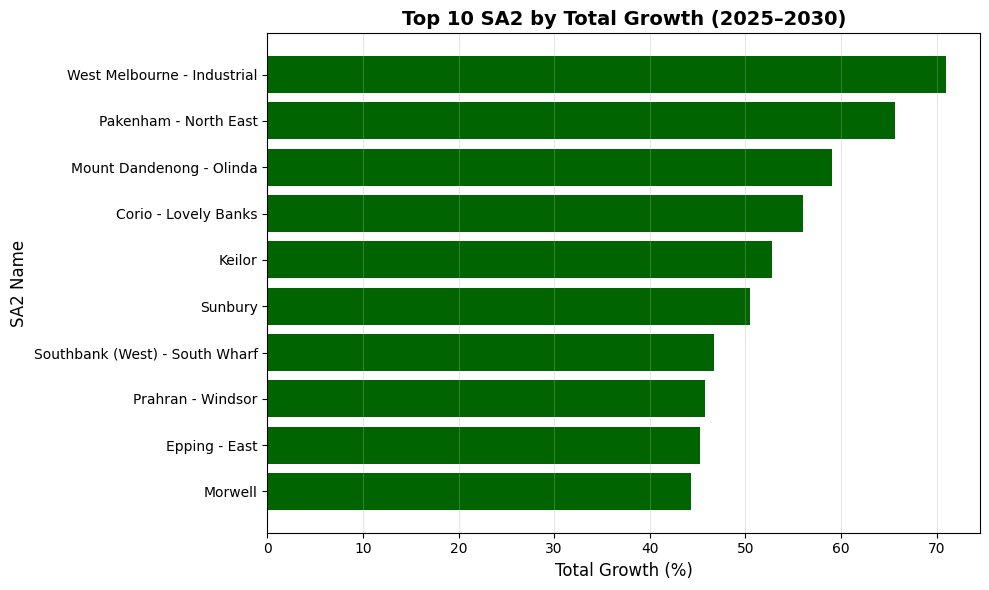

In [ ]:
# Plot horizontal bar chart using SA2 names 
plt.figure(figsize=(10, 6))
plt.barh(
    y=top10_growth["SA2_NAME21"],
    width=top10_growth["Total_Growth_%"],
    color='darkgreen'
)

# Flip y-axis so the largest bar is at the top
plt.gca().invert_yaxis()

plt.title("Top 10 SA2 by Total Growth (2025–2030)", fontsize=14, fontweight='bold')
plt.xlabel("Total Growth (%)", fontsize=12)
plt.ylabel("SA2 Name", fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


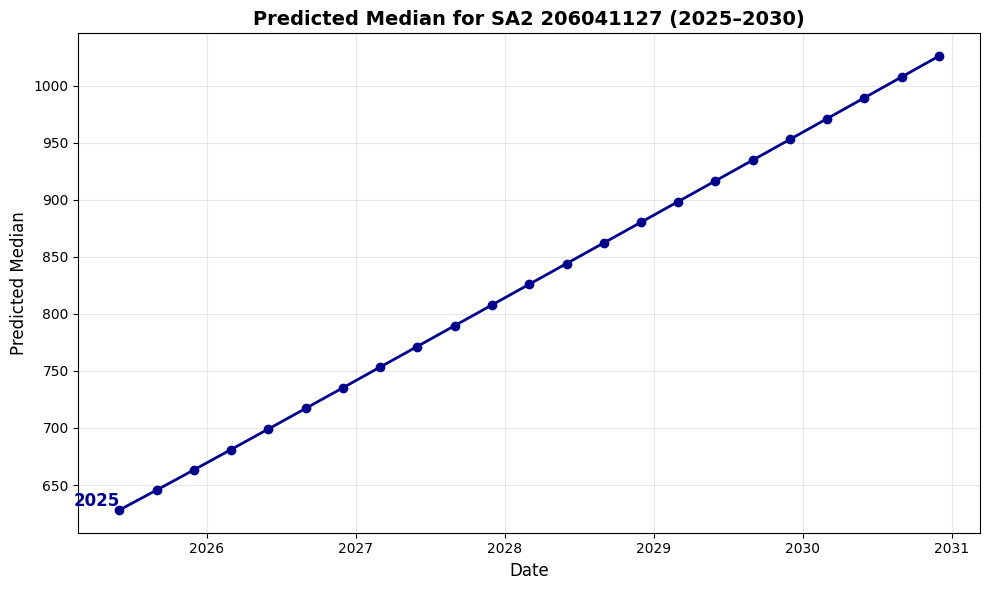

In [ ]:
# Plot line chart for the SA2 that has the highest growth
sa2_target = 206041127
sa2_data = future_forecasts[future_forecasts["SA2_CODE21"] == sa2_target].copy()

#  Convert 'date' to datetime
sa2_data["date"] = pd.to_datetime(sa2_data["date"])

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(
    sa2_data["date"],
    sa2_data["Predicted_Median"],
    marker='o',
    linestyle='-',
    color='darkblue',
    linewidth=2,
    markersize=6
)

start_value = sa2_data["Predicted_Median"].iloc[0]
start_date = sa2_data["date"].iloc[0]
plt.text(start_date, start_value, "2025", fontsize=12, fontweight='bold', color='darkblue', ha='right', va='bottom')

plt.title(f"Predicted Median for SA2 {sa2_target} (2025–2030)", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Predicted Median", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


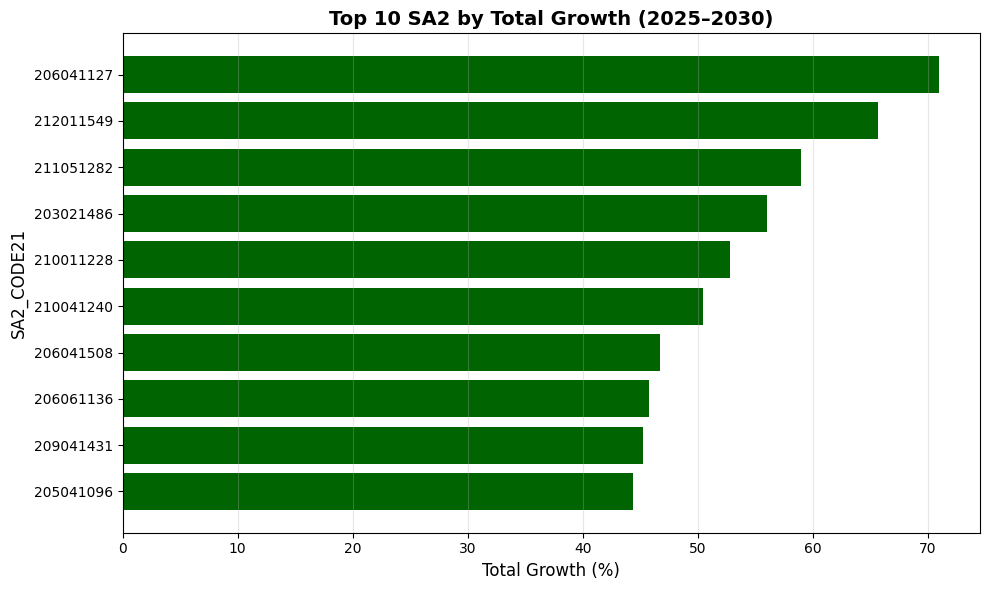

In [ ]:
# Plot horizontal bar chart using SA2 Codes 

# Get top 10 by Total Growth 
top10_growth = growth_df.sort_values("Total_Growth_%", ascending=False).head(10)
top10_growth["SA2_CODE21"] = top10_growth["SA2_CODE21"].astype("object")

# Plot horizontal bar chart 
plt.figure(figsize=(10, 6))
plt.barh(
    y=top10_growth["SA2_CODE21"].astype(str),
    width=top10_growth["Total_Growth_%"],
    color='darkgreen'
)

# Flip y-axis so the largest bar is at the top
plt.gca().invert_yaxis()

plt.title("Top 10 SA2 by Total Growth (2025–2030)", fontsize=14, fontweight='bold')
plt.xlabel("Total Growth (%)", fontsize=12)
plt.ylabel("SA2_CODE21", fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show() 
